# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'r_MIN', 'contr_b_MAX', 'contr_b_STD'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,contr_b_MAX,contr_b_STD
0,6.824,9.240,1912,784,-0.73,2.58,2.33,13,2713.600586,332.963753
1,8.189,9.622,2005,818,0.59,2.92,2.47,24,1793.493042,293.868420
2,8.380,9.589,2001,818,0.78,2.88,2.44,18,1761.097900,272.526176
3,8.137,9.449,2040,833,0.52,2.72,2.55,15,2518.435303,299.595643
4,7.696,9.401,1758,717,0.22,2.83,2.14,8,2525.819336,327.599176


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   r_MIN          103 non-null    int64  
 8   contr_b_MAX    103 non-null    float64
 9   contr_b_STD    103 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 8.2 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_3606/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,r_MIN,contr_b_MAX,contr_b_STD
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,11.378641,2712.352866,349.854034
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,9.139568,864.116297,93.673105
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,2.000000,832.155518,109.232976
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,5.000000,2123.614868,292.544440
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,8.000000,2601.248047,341.904211
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,15.000000,3045.944336,427.359073
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,56.000000,6252.923340,588.661708


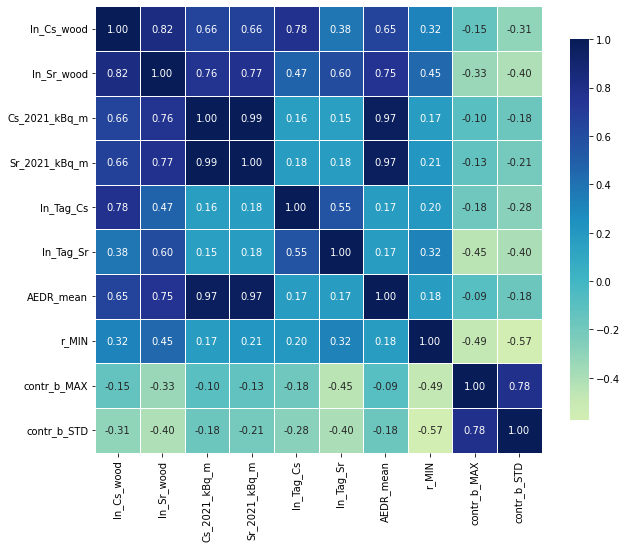

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Sr_2021_kBq_m', 'r_MIN', 'contr_b_MAX', 'contr_b_STD'])
y = pd.DataFrame(select, columns= ['ln_Sr_wood'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,Sr_2021_kBq_m,r_MIN,contr_b_MAX,contr_b_STD
0,784,13,2713.600586,332.963753
1,818,24,1793.493042,293.868420
2,818,18,1761.097900,272.526176
3,833,15,2518.435303,299.595643
4,717,8,2525.819336,327.599176


In [11]:
# Columns in "y" data collections
y.head()

,ln_Sr_wood
0,9.240
1,9.622
2,9.589
3,9.449
4,9.401


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.5140026380741296, 0.676256653080261, 0.5792869094942259]
    Mean: 0.590
    Std: 0.067

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.1939675  0.84048928 0.77756096]
    Mean: 0.937
    Std: 0.183

 --------------------
Mean absolute error (MAE): 

    Scores: [0.638914070892334, 0.6500065229079303, 0.7241302272572236]
    Mean: 0.671
    Std: 0.038

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.414 (std: 0.261)
Parameters: {'colsample_bytree': 0.5206490179446539, 'gamma': 0.15204082630308058, 'learning_rate': 0.025211624383763856, 'max_depth': 4, 'n_estimators': 156, 'subsample': 0.7951821878824858}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.54410629, 0.16561933, 0.39212971, ..., 0.39308195, 0.41488285,
       0.34738855]), 'std_fit_time': array([0.24847082, 0.01223869, 0.04176032, ..., 0.00627123, 0.00860398,
       0.00589323]), 'mean_score_time': array([0.0065465 , 0.0062531 , 0.00605917, ..., 0.00658021, 0.0066072 ,
       0.00662999]), 'std_score_time': array([8.02945396e-04, 1.83877992e-04, 9.32887755e-05, ...,
       3.34855818e-05, 3.77390629e-05, 7.79207069e-05]), 'param_colsample_bytree': masked_array(data=[0.4467800495478435, 0.5143336120733338,
                   0.29928727648357106, ..., 0.23186436406409805,
                   0.3869787645901532, 0.49859511183813776],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.17381199998497937, 0.07119859434321002,
                   0.2904542303366897, ..., 0.45877624334338774,
                   0.03775402823817009, 0.2987198345277912],
  

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.5206490179446539
Gamma: 0.15204082630308058
Learning_rate: 0.025211624383763856
Max_depth: 4
N_estimators: 156
Subsample: 0.7951821878824858


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:8.22080	validation_1-rmse:7.53419
[1]	validation_0-rmse:8.02640	validation_1-rmse:7.33954
[2]	validation_0-rmse:7.83267	validation_1-rmse:7.14557


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:7.64365	validation_1-rmse:6.95631
[4]	validation_0-rmse:7.45869	validation_1-rmse:6.78146
[5]	validation_0-rmse:7.27931	validation_1-rmse:6.60186
[6]	validation_0-rmse:7.10696	validation_1-rmse:6.42931
[7]	validation_0-rmse:6.93448	validation_1-rmse:6.25663
[8]	validation_0-rmse:6.76670	validation_1-rmse:6.09910
[9]	validation_0-rmse:6.60700	validation_1-rmse:5.93924
[10]	validation_0-rmse:6.45032	validation_1-rmse:5.78241
[11]	validation_0-rmse:6.29791	validation_1-rmse:5.62988
[12]	validation_0-rmse:6.15128	validation_1-rmse:5.48313
[13]	validation_0-rmse:6.01066	validation_1-rmse:5.34244
[14]	validation_0-rmse:5.87362	validation_1-rmse:5.21017
[15]	validation_0-rmse:5.73484	validation_1-rmse:5.08101
[16]	validation_0-rmse:5.59836	validation_1-rmse:4.95398
[17]	validation_0-rmse:5.47013	validation_1-rmse:4.82569
[18]	validation_0-rmse:5.34380	validation_1-rmse:4.70868
[19]	validation_0-rmse:5.21972	validation_1-rmse:4.59044
[20]	validation_0-rmse:5.10024	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:7.51429	validation_1-rmse:7.57867
[4]	validation_0-rmse:7.33193	validation_1-rmse:7.40157
[5]	validation_0-rmse:7.15740	validation_1-rmse:7.22716
[6]	validation_0-rmse:6.98864	validation_1-rmse:7.05852
[7]	validation_0-rmse:6.82287	validation_1-rmse:6.89287
[8]	validation_0-rmse:6.66147	validation_1-rmse:6.73159
[9]	validation_0-rmse:6.50336	validation_1-rmse:6.57360
[10]	validation_0-rmse:6.34820	validation_1-rmse:6.41235
[11]	validation_0-rmse:6.19972	validation_1-rmse:6.26398
[12]	validation_0-rmse:6.05173	validation_1-rmse:6.11610
[13]	validation_0-rmse:5.91081	validation_1-rmse:5.96984
[14]	validation_0-rmse:5.77039	validation_1-rmse:5.82952
[15]	validation_0-rmse:5.63466	validation_1-rmse:5.69812
[16]	validation_0-rmse:5.49939	validation_1-rmse:5.56556
[17]	validation_0-rmse:5.37273	validation_1-rmse:5.43894
[18]	validation_0-rmse:5.24567	validation_1-rmse:5.31313
[19]	validation_0-rmse:5.12384	validation_1-rmse:5.18648
[20]	validation_0-rmse:5.00327	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.20226	validation_1-rmse:5.61995
[19]	validation_0-rmse:5.08314	validation_1-rmse:5.49816
[20]	validation_0-rmse:4.96319	validation_1-rmse:5.37530
[21]	validation_0-rmse:4.84841	validation_1-rmse:5.26111
[22]	validation_0-rmse:4.73677	validation_1-rmse:5.14671
[23]	validation_0-rmse:4.62854	validation_1-rmse:5.03588
[24]	validation_0-rmse:4.52041	validation_1-rmse:4.91882
[25]	validation_0-rmse:4.41747	validation_1-rmse:4.81335
[26]	validation_0-rmse:4.31484	validation_1-rmse:4.71003
[27]	validation_0-rmse:4.21579	validation_1-rmse:4.60836
[28]	validation_0-rmse:4.11867	validation_1-rmse:4.50952
[29]	validation_0-rmse:4.02839	validation_1-rmse:4.41462
[30]	validation_0-rmse:3.93775	validation_1-rmse:4.32404
[31]	validation_0-rmse:3.84651	validation_1-rmse:4.22536
[32]	validation_0-rmse:3.76067	validation_1-rmse:4.13855
[33]	validation_0-rmse:3.67647	validation_1-rmse:4.05346
[34]	validation_0-rmse:3.59945	validation_1-rmse:3.97420
[35]	validation_0-rmse:3.52103	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.18146	validation_1-rmse:4.73478
[20]	validation_0-rmse:5.06285	validation_1-rmse:4.61735
[21]	validation_0-rmse:4.94389	validation_1-rmse:4.49025
[22]	validation_0-rmse:4.82905	validation_1-rmse:4.37808
[23]	validation_0-rmse:4.72150	validation_1-rmse:4.27004
[24]	validation_0-rmse:4.61156	validation_1-rmse:4.15551
[25]	validation_0-rmse:4.50541	validation_1-rmse:4.05162
[26]	validation_0-rmse:4.39965	validation_1-rmse:3.95053
[27]	validation_0-rmse:4.30122	validation_1-rmse:3.85460
[28]	validation_0-rmse:4.20513	validation_1-rmse:3.76349
[29]	validation_0-rmse:4.11027	validation_1-rmse:3.67143
[30]	validation_0-rmse:4.02151	validation_1-rmse:3.57903
[31]	validation_0-rmse:3.92767	validation_1-rmse:3.49028
[32]	validation_0-rmse:3.83817	validation_1-rmse:3.40639
[33]	validation_0-rmse:3.75162	validation_1-rmse:3.32495
[34]	validation_0-rmse:3.66621	validation_1-rmse:3.24205
[35]	validation_0-rmse:3.58384	validation_1-rmse:3.16144
[36]	validation_0-rmse:3.49993	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.14138	validation_1-rmse:5.91868
[19]	validation_0-rmse:5.02072	validation_1-rmse:5.80288
[20]	validation_0-rmse:4.90285	validation_1-rmse:5.68894
[21]	validation_0-rmse:4.78747	validation_1-rmse:5.57506
[22]	validation_0-rmse:4.67740	validation_1-rmse:5.46851
[23]	validation_0-rmse:4.57027	validation_1-rmse:5.36593
[24]	validation_0-rmse:4.46294	validation_1-rmse:5.25512
[25]	validation_0-rmse:4.35798	validation_1-rmse:5.15391
[26]	validation_0-rmse:4.25672	validation_1-rmse:5.04822
[27]	validation_0-rmse:4.16165	validation_1-rmse:4.95659
[28]	validation_0-rmse:4.06504	validation_1-rmse:4.85718
[29]	validation_0-rmse:3.97145	validation_1-rmse:4.76236
[30]	validation_0-rmse:3.87893	validation_1-rmse:4.67144
[31]	validation_0-rmse:3.78861	validation_1-rmse:4.57824
[32]	validation_0-rmse:3.70307	validation_1-rmse:4.49031
[33]	validation_0-rmse:3.61771	validation_1-rmse:4.40213
[34]	validation_0-rmse:3.53587	validation_1-rmse:4.32528
[35]	validation_0-rmse:3.45667	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.46912	validation_1-rmse:5.75286
[17]	validation_0-rmse:5.34289	validation_1-rmse:5.62652
[18]	validation_0-rmse:5.21907	validation_1-rmse:5.50025
[19]	validation_0-rmse:5.09793	validation_1-rmse:5.37195
[20]	validation_0-rmse:4.98025	validation_1-rmse:5.24743
[21]	validation_0-rmse:4.86403	validation_1-rmse:5.13103
[22]	validation_0-rmse:4.74722	validation_1-rmse:5.01401
[23]	validation_0-rmse:4.63798	validation_1-rmse:4.89745
[24]	validation_0-rmse:4.52941	validation_1-rmse:4.78655
[25]	validation_0-rmse:4.42514	validation_1-rmse:4.67592
[26]	validation_0-rmse:4.32609	validation_1-rmse:4.57462
[27]	validation_0-rmse:4.22621	validation_1-rmse:4.46820
[28]	validation_0-rmse:4.12684	validation_1-rmse:4.36623
[29]	validation_0-rmse:4.03531	validation_1-rmse:4.26812
[30]	validation_0-rmse:3.94700	validation_1-rmse:4.17948
[31]	validation_0-rmse:3.85652	validation_1-rmse:4.08521
[32]	validation_0-rmse:3.76750	validation_1-rmse:3.99232
[33]	validation_0-rmse:3.68122	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.23161	validation_1-rmse:6.92992
[11]	validation_0-rmse:6.08487	validation_1-rmse:6.78619
[12]	validation_0-rmse:5.93866	validation_1-rmse:6.64310
[13]	validation_0-rmse:5.79688	validation_1-rmse:6.50447
[14]	validation_0-rmse:5.65914	validation_1-rmse:6.36990
[15]	validation_0-rmse:5.52584	validation_1-rmse:6.22904
[16]	validation_0-rmse:5.39269	validation_1-rmse:6.08693
[17]	validation_0-rmse:5.26524	validation_1-rmse:5.96278
[18]	validation_0-rmse:5.14101	validation_1-rmse:5.82933
[19]	validation_0-rmse:5.02098	validation_1-rmse:5.71264
[20]	validation_0-rmse:4.90446	validation_1-rmse:5.59382
[21]	validation_0-rmse:4.78960	validation_1-rmse:5.48237
[22]	validation_0-rmse:4.67949	validation_1-rmse:5.37565
[23]	validation_0-rmse:4.57026	validation_1-rmse:5.26989
[24]	validation_0-rmse:4.46230	validation_1-rmse:5.15243
[25]	validation_0-rmse:4.35944	validation_1-rmse:5.04754
[26]	validation_0-rmse:4.25826	validation_1-rmse:4.93779
[27]	validation_0-rmse:4.16255	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.23702	validation_1-rmse:5.36083
[19]	validation_0-rmse:5.11576	validation_1-rmse:5.24136
[20]	validation_0-rmse:4.99575	validation_1-rmse:5.12306
[21]	validation_0-rmse:4.88158	validation_1-rmse:5.00966
[22]	validation_0-rmse:4.76812	validation_1-rmse:4.89605
[23]	validation_0-rmse:4.65539	validation_1-rmse:4.78332
[24]	validation_0-rmse:4.54758	validation_1-rmse:4.67187
[25]	validation_0-rmse:4.44780	validation_1-rmse:4.57291
[26]	validation_0-rmse:4.34331	validation_1-rmse:4.46325
[27]	validation_0-rmse:4.24341	validation_1-rmse:4.36497
[28]	validation_0-rmse:4.14748	validation_1-rmse:4.26623
[29]	validation_0-rmse:4.05313	validation_1-rmse:4.17520
[30]	validation_0-rmse:3.96417	validation_1-rmse:4.08920
[31]	validation_0-rmse:3.87160	validation_1-rmse:3.99333
[32]	validation_0-rmse:3.78211	validation_1-rmse:3.90050
[33]	validation_0-rmse:3.69625	validation_1-rmse:3.81302
[34]	validation_0-rmse:3.61782	validation_1-rmse:3.73553
[35]	validation_0-rmse:3.53913	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.64811	validation_1-rmse:6.69591
[9]	validation_0-rmse:6.49058	validation_1-rmse:6.53776
[10]	validation_0-rmse:6.33634	validation_1-rmse:6.38132
[11]	validation_0-rmse:6.18807	validation_1-rmse:6.23243
[12]	validation_0-rmse:6.04141	validation_1-rmse:6.08377
[13]	validation_0-rmse:5.90207	validation_1-rmse:5.94382
[14]	validation_0-rmse:5.76352	validation_1-rmse:5.80463
[15]	validation_0-rmse:5.62659	validation_1-rmse:5.66825
[16]	validation_0-rmse:5.49305	validation_1-rmse:5.53526
[17]	validation_0-rmse:5.36559	validation_1-rmse:5.40713
[18]	validation_0-rmse:5.23807	validation_1-rmse:5.28012
[19]	validation_0-rmse:5.11581	validation_1-rmse:5.15631
[20]	validation_0-rmse:4.99518	validation_1-rmse:5.03406
[21]	validation_0-rmse:4.88128	validation_1-rmse:4.91951
[22]	validation_0-rmse:4.76627	validation_1-rmse:4.80299
[23]	validation_0-rmse:4.65887	validation_1-rmse:4.69415
[24]	validation_0-rmse:4.55070	validation_1-rmse:4.58533
[25]	validation_0-rmse:4.44734	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.34514	validation_1-rmse:4.71358
[19]	validation_0-rmse:5.22010	validation_1-rmse:4.59584
[20]	validation_0-rmse:5.09941	validation_1-rmse:4.47275
[21]	validation_0-rmse:4.98272	validation_1-rmse:4.35971
[22]	validation_0-rmse:4.86680	validation_1-rmse:4.25152
[23]	validation_0-rmse:4.75512	validation_1-rmse:4.13738
[24]	validation_0-rmse:4.64293	validation_1-rmse:4.03112
[25]	validation_0-rmse:4.53521	validation_1-rmse:3.92953
[26]	validation_0-rmse:4.43176	validation_1-rmse:3.83400
[27]	validation_0-rmse:4.33202	validation_1-rmse:3.73133
[28]	validation_0-rmse:4.23461	validation_1-rmse:3.63831
[29]	validation_0-rmse:4.13888	validation_1-rmse:3.54750
[30]	validation_0-rmse:4.04808	validation_1-rmse:3.45703
[31]	validation_0-rmse:3.95447	validation_1-rmse:3.37660
[32]	validation_0-rmse:3.86299	validation_1-rmse:3.29282
[33]	validation_0-rmse:3.77623	validation_1-rmse:3.20840
[34]	validation_0-rmse:3.69257	validation_1-rmse:3.12169
[35]	validation_0-rmse:3.61209	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.18028	validation_1-rmse:5.62845
[19]	validation_0-rmse:5.05852	validation_1-rmse:5.50145
[20]	validation_0-rmse:4.93752	validation_1-rmse:5.37876
[21]	validation_0-rmse:4.82254	validation_1-rmse:5.26541
[22]	validation_0-rmse:4.71522	validation_1-rmse:5.15966
[23]	validation_0-rmse:4.60811	validation_1-rmse:5.05161
[24]	validation_0-rmse:4.50246	validation_1-rmse:4.94580
[25]	validation_0-rmse:4.39884	validation_1-rmse:4.84387
[26]	validation_0-rmse:4.29652	validation_1-rmse:4.74152
[27]	validation_0-rmse:4.19734	validation_1-rmse:4.63684
[28]	validation_0-rmse:4.09888	validation_1-rmse:4.53898
[29]	validation_0-rmse:4.00725	validation_1-rmse:4.44284
[30]	validation_0-rmse:3.91722	validation_1-rmse:4.35415
[31]	validation_0-rmse:3.82426	validation_1-rmse:4.25944
[32]	validation_0-rmse:3.73756	validation_1-rmse:4.17206
[33]	validation_0-rmse:3.65249	validation_1-rmse:4.08693
[34]	validation_0-rmse:3.57143	validation_1-rmse:4.00147
[35]	validation_0-rmse:3.49036	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.64520	validation_1-rmse:6.40859
[15]	validation_0-rmse:5.51225	validation_1-rmse:6.26738
[16]	validation_0-rmse:5.38132	validation_1-rmse:6.12806
[17]	validation_0-rmse:5.25255	validation_1-rmse:6.00205
[18]	validation_0-rmse:5.13008	validation_1-rmse:5.87266
[19]	validation_0-rmse:5.00820	validation_1-rmse:5.75359
[20]	validation_0-rmse:4.88917	validation_1-rmse:5.63740
[21]	validation_0-rmse:4.77944	validation_1-rmse:5.52525
[22]	validation_0-rmse:4.66930	validation_1-rmse:5.41506
[23]	validation_0-rmse:4.56164	validation_1-rmse:5.30659
[24]	validation_0-rmse:4.45442	validation_1-rmse:5.19318
[25]	validation_0-rmse:4.35118	validation_1-rmse:5.09286
[26]	validation_0-rmse:4.25059	validation_1-rmse:4.98645
[27]	validation_0-rmse:4.15315	validation_1-rmse:4.88816
[28]	validation_0-rmse:4.05586	validation_1-rmse:4.78541
[29]	validation_0-rmse:3.96572	validation_1-rmse:4.69585
[30]	validation_0-rmse:3.87770	validation_1-rmse:4.61075
[31]	validation_0-rmse:3.78806	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.09355	validation_1-rmse:5.36056
[20]	validation_0-rmse:4.97645	validation_1-rmse:5.24154
[21]	validation_0-rmse:4.86152	validation_1-rmse:5.12464
[22]	validation_0-rmse:4.74795	validation_1-rmse:5.01381
[23]	validation_0-rmse:4.63961	validation_1-rmse:4.90654
[24]	validation_0-rmse:4.53137	validation_1-rmse:4.79162
[25]	validation_0-rmse:4.42808	validation_1-rmse:4.69032
[26]	validation_0-rmse:4.32352	validation_1-rmse:4.58255
[27]	validation_0-rmse:4.22514	validation_1-rmse:4.48675
[28]	validation_0-rmse:4.12677	validation_1-rmse:4.38361
[29]	validation_0-rmse:4.03437	validation_1-rmse:4.28827
[30]	validation_0-rmse:3.94498	validation_1-rmse:4.19800
[31]	validation_0-rmse:3.85408	validation_1-rmse:4.10243
[32]	validation_0-rmse:3.76592	validation_1-rmse:4.00983
[33]	validation_0-rmse:3.67856	validation_1-rmse:3.91734
[34]	validation_0-rmse:3.59519	validation_1-rmse:3.83578
[35]	validation_0-rmse:3.51649	validation_1-rmse:3.75837
[36]	validation_0-rmse:3.43609	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.46490	validation_1-rmse:4.84578
[18]	validation_0-rmse:5.33883	validation_1-rmse:4.72370
[19]	validation_0-rmse:5.21473	validation_1-rmse:4.60178
[20]	validation_0-rmse:5.09268	validation_1-rmse:4.47706
[21]	validation_0-rmse:4.97447	validation_1-rmse:4.35114
[22]	validation_0-rmse:4.86349	validation_1-rmse:4.24146
[23]	validation_0-rmse:4.75568	validation_1-rmse:4.13058
[24]	validation_0-rmse:4.64377	validation_1-rmse:4.03256
[25]	validation_0-rmse:4.53629	validation_1-rmse:3.92639
[26]	validation_0-rmse:4.42934	validation_1-rmse:3.83196
[27]	validation_0-rmse:4.32955	validation_1-rmse:3.73428
[28]	validation_0-rmse:4.22885	validation_1-rmse:3.64704
[29]	validation_0-rmse:4.13449	validation_1-rmse:3.54985
[30]	validation_0-rmse:4.04171	validation_1-rmse:3.45026
[31]	validation_0-rmse:3.94814	validation_1-rmse:3.37052
[32]	validation_0-rmse:3.85682	validation_1-rmse:3.28392
[33]	validation_0-rmse:3.76700	validation_1-rmse:3.19943
[34]	validation_0-rmse:3.68571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.27167	validation_1-rmse:5.14354
[19]	validation_0-rmse:5.14809	validation_1-rmse:5.01452
[20]	validation_0-rmse:5.03258	validation_1-rmse:4.89855
[21]	validation_0-rmse:4.91541	validation_1-rmse:4.78089
[22]	validation_0-rmse:4.80246	validation_1-rmse:4.66747
[23]	validation_0-rmse:4.69344	validation_1-rmse:4.55797
[24]	validation_0-rmse:4.58360	validation_1-rmse:4.45299
[25]	validation_0-rmse:4.47982	validation_1-rmse:4.34384
[26]	validation_0-rmse:4.37636	validation_1-rmse:4.23805
[27]	validation_0-rmse:4.27555	validation_1-rmse:4.13198
[28]	validation_0-rmse:4.17750	validation_1-rmse:4.03919
[29]	validation_0-rmse:4.08623	validation_1-rmse:3.94613
[30]	validation_0-rmse:3.99657	validation_1-rmse:3.85362
[31]	validation_0-rmse:3.90274	validation_1-rmse:3.76411
[32]	validation_0-rmse:3.81184	validation_1-rmse:3.67658
[33]	validation_0-rmse:3.72550	validation_1-rmse:3.58808
[34]	validation_0-rmse:3.63991	validation_1-rmse:3.49636
[35]	validation_0-rmse:3.55988	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.15070	validation_1-rmse:4.90398
[20]	validation_0-rmse:5.03013	validation_1-rmse:4.77944
[21]	validation_0-rmse:4.91440	validation_1-rmse:4.66310
[22]	validation_0-rmse:4.79741	validation_1-rmse:4.54324
[23]	validation_0-rmse:4.68779	validation_1-rmse:4.43063
[24]	validation_0-rmse:4.57750	validation_1-rmse:4.31819
[25]	validation_0-rmse:4.47121	validation_1-rmse:4.20874
[26]	validation_0-rmse:4.36595	validation_1-rmse:4.10497
[27]	validation_0-rmse:4.26670	validation_1-rmse:4.00522
[28]	validation_0-rmse:4.16894	validation_1-rmse:3.90872
[29]	validation_0-rmse:4.07590	validation_1-rmse:3.81358
[30]	validation_0-rmse:3.98544	validation_1-rmse:3.72725
[31]	validation_0-rmse:3.89390	validation_1-rmse:3.63752
[32]	validation_0-rmse:3.80496	validation_1-rmse:3.55339
[33]	validation_0-rmse:3.71885	validation_1-rmse:3.47142
[34]	validation_0-rmse:3.63686	validation_1-rmse:3.38722
[35]	validation_0-rmse:3.55647	validation_1-rmse:3.30697
[36]	validation_0-rmse:3.47515	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.13511	validation_1-rmse:5.03447
[20]	validation_0-rmse:5.01929	validation_1-rmse:4.91982
[21]	validation_0-rmse:4.90200	validation_1-rmse:4.80272
[22]	validation_0-rmse:4.79247	validation_1-rmse:4.69783
[23]	validation_0-rmse:4.68078	validation_1-rmse:4.58749
[24]	validation_0-rmse:4.57481	validation_1-rmse:4.48035
[25]	validation_0-rmse:4.47032	validation_1-rmse:4.37739
[26]	validation_0-rmse:4.37074	validation_1-rmse:4.27637
[27]	validation_0-rmse:4.26890	validation_1-rmse:4.17859
[28]	validation_0-rmse:4.17081	validation_1-rmse:4.07659
[29]	validation_0-rmse:4.07848	validation_1-rmse:3.98479
[30]	validation_0-rmse:3.98579	validation_1-rmse:3.89160
[31]	validation_0-rmse:3.89458	validation_1-rmse:3.79659
[32]	validation_0-rmse:3.80483	validation_1-rmse:3.70925
[33]	validation_0-rmse:3.71891	validation_1-rmse:3.62217
[34]	validation_0-rmse:3.63515	validation_1-rmse:3.54251
[35]	validation_0-rmse:3.55219	validation_1-rmse:3.46375
[36]	validation_0-rmse:3.47285	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.65514	validation_1-rmse:5.54057
[16]	validation_0-rmse:5.52161	validation_1-rmse:5.40984
[17]	validation_0-rmse:5.39198	validation_1-rmse:5.28087
[18]	validation_0-rmse:5.26632	validation_1-rmse:5.15903
[19]	validation_0-rmse:5.14341	validation_1-rmse:5.02639
[20]	validation_0-rmse:5.02710	validation_1-rmse:4.90047
[21]	validation_0-rmse:4.91045	validation_1-rmse:4.78451
[22]	validation_0-rmse:4.79816	validation_1-rmse:4.66305
[23]	validation_0-rmse:4.68813	validation_1-rmse:4.54409
[24]	validation_0-rmse:4.57719	validation_1-rmse:4.43349
[25]	validation_0-rmse:4.47337	validation_1-rmse:4.32138
[26]	validation_0-rmse:4.36852	validation_1-rmse:4.21882
[27]	validation_0-rmse:4.27305	validation_1-rmse:4.12845
[28]	validation_0-rmse:4.17448	validation_1-rmse:4.03071
[29]	validation_0-rmse:4.08001	validation_1-rmse:3.93694
[30]	validation_0-rmse:3.98853	validation_1-rmse:3.84578
[31]	validation_0-rmse:3.89677	validation_1-rmse:3.75431
[32]	validation_0-rmse:3.80706	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.08987	validation_1-rmse:5.81656
[13]	validation_0-rmse:5.94653	validation_1-rmse:5.67543
[14]	validation_0-rmse:5.80834	validation_1-rmse:5.53698
[15]	validation_0-rmse:5.67125	validation_1-rmse:5.39466
[16]	validation_0-rmse:5.53689	validation_1-rmse:5.26242
[17]	validation_0-rmse:5.40644	validation_1-rmse:5.13173
[18]	validation_0-rmse:5.27770	validation_1-rmse:4.99661
[19]	validation_0-rmse:5.15495	validation_1-rmse:4.87608
[20]	validation_0-rmse:5.03311	validation_1-rmse:4.75663
[21]	validation_0-rmse:4.91929	validation_1-rmse:4.64260
[22]	validation_0-rmse:4.80360	validation_1-rmse:4.52480
[23]	validation_0-rmse:4.69243	validation_1-rmse:4.41552
[24]	validation_0-rmse:4.58494	validation_1-rmse:4.30386
[25]	validation_0-rmse:4.47938	validation_1-rmse:4.20035
[26]	validation_0-rmse:4.37699	validation_1-rmse:4.10008
[27]	validation_0-rmse:4.27810	validation_1-rmse:4.00106
[28]	validation_0-rmse:4.18028	validation_1-rmse:3.90549
[29]	validation_0-rmse:4.08915	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.12262	validation_1-rmse:5.20779
[20]	validation_0-rmse:5.00364	validation_1-rmse:5.08888
[21]	validation_0-rmse:4.89093	validation_1-rmse:4.97623
[22]	validation_0-rmse:4.78003	validation_1-rmse:4.86186
[23]	validation_0-rmse:4.67426	validation_1-rmse:4.75612
[24]	validation_0-rmse:4.56745	validation_1-rmse:4.64891
[25]	validation_0-rmse:4.46459	validation_1-rmse:4.54607
[26]	validation_0-rmse:4.36363	validation_1-rmse:4.44568
[27]	validation_0-rmse:4.26470	validation_1-rmse:4.34386
[28]	validation_0-rmse:4.16464	validation_1-rmse:4.24440
[29]	validation_0-rmse:4.07273	validation_1-rmse:4.14793
[30]	validation_0-rmse:3.98196	validation_1-rmse:4.05633
[31]	validation_0-rmse:3.89310	validation_1-rmse:3.96723
[32]	validation_0-rmse:3.80334	validation_1-rmse:3.87611
[33]	validation_0-rmse:3.71469	validation_1-rmse:3.78797
[34]	validation_0-rmse:3.63380	validation_1-rmse:3.70459
[35]	validation_0-rmse:3.55472	validation_1-rmse:3.62220
[36]	validation_0-rmse:3.47374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.36880	validation_1-rmse:5.38831
[18]	validation_0-rmse:5.24375	validation_1-rmse:5.26653
[19]	validation_0-rmse:5.12223	validation_1-rmse:5.13760
[20]	validation_0-rmse:5.00541	validation_1-rmse:5.02074
[21]	validation_0-rmse:4.88983	validation_1-rmse:4.90513
[22]	validation_0-rmse:4.77552	validation_1-rmse:4.78401
[23]	validation_0-rmse:4.66690	validation_1-rmse:4.67547
[24]	validation_0-rmse:4.55875	validation_1-rmse:4.56742
[25]	validation_0-rmse:4.45683	validation_1-rmse:4.46543
[26]	validation_0-rmse:4.35241	validation_1-rmse:4.36141
[27]	validation_0-rmse:4.25390	validation_1-rmse:4.26284
[28]	validation_0-rmse:4.15517	validation_1-rmse:4.16611
[29]	validation_0-rmse:4.05705	validation_1-rmse:4.06102
[30]	validation_0-rmse:3.96971	validation_1-rmse:3.97361
[31]	validation_0-rmse:3.87783	validation_1-rmse:3.88220
[32]	validation_0-rmse:3.78991	validation_1-rmse:3.79700
[33]	validation_0-rmse:3.70445	validation_1-rmse:3.71429
[34]	validation_0-rmse:3.62269	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.31113	validation_1-rmse:5.75939
[18]	validation_0-rmse:5.18655	validation_1-rmse:5.63262
[19]	validation_0-rmse:5.06452	validation_1-rmse:5.50688
[20]	validation_0-rmse:4.94871	validation_1-rmse:5.39164
[21]	validation_0-rmse:4.83181	validation_1-rmse:5.27532
[22]	validation_0-rmse:4.71487	validation_1-rmse:5.15898
[23]	validation_0-rmse:4.60650	validation_1-rmse:5.04727
[24]	validation_0-rmse:4.49792	validation_1-rmse:4.93777
[25]	validation_0-rmse:4.39233	validation_1-rmse:4.83275
[26]	validation_0-rmse:4.28886	validation_1-rmse:4.72638
[27]	validation_0-rmse:4.19279	validation_1-rmse:4.63407
[28]	validation_0-rmse:4.09557	validation_1-rmse:4.53444
[29]	validation_0-rmse:4.00269	validation_1-rmse:4.43826
[30]	validation_0-rmse:3.90969	validation_1-rmse:4.34957
[31]	validation_0-rmse:3.82024	validation_1-rmse:4.25731
[32]	validation_0-rmse:3.73129	validation_1-rmse:4.17069
[33]	validation_0-rmse:3.64619	validation_1-rmse:4.08469
[34]	validation_0-rmse:3.56203	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.57943	validation_1-rmse:5.07339
[17]	validation_0-rmse:5.45126	validation_1-rmse:4.94436
[18]	validation_0-rmse:5.32071	validation_1-rmse:4.81911
[19]	validation_0-rmse:5.19779	validation_1-rmse:4.69421
[20]	validation_0-rmse:5.07570	validation_1-rmse:4.57043
[21]	validation_0-rmse:4.96081	validation_1-rmse:4.45485
[22]	validation_0-rmse:4.84409	validation_1-rmse:4.33614
[23]	validation_0-rmse:4.73082	validation_1-rmse:4.22128
[24]	validation_0-rmse:4.61946	validation_1-rmse:4.11450
[25]	validation_0-rmse:4.51254	validation_1-rmse:4.00616
[26]	validation_0-rmse:4.41102	validation_1-rmse:3.90911
[27]	validation_0-rmse:4.31101	validation_1-rmse:3.80982
[28]	validation_0-rmse:4.21150	validation_1-rmse:3.71400
[29]	validation_0-rmse:4.11311	validation_1-rmse:3.61444
[30]	validation_0-rmse:4.02227	validation_1-rmse:3.52346
[31]	validation_0-rmse:3.92999	validation_1-rmse:3.43586
[32]	validation_0-rmse:3.84097	validation_1-rmse:3.35081
[33]	validation_0-rmse:3.75279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.30223	validation_1-rmse:4.96795
[19]	validation_0-rmse:5.17951	validation_1-rmse:4.84651
[20]	validation_0-rmse:5.06130	validation_1-rmse:4.72731
[21]	validation_0-rmse:4.94608	validation_1-rmse:4.60974
[22]	validation_0-rmse:4.83819	validation_1-rmse:4.50091
[23]	validation_0-rmse:4.72466	validation_1-rmse:4.38860
[24]	validation_0-rmse:4.61434	validation_1-rmse:4.27784
[25]	validation_0-rmse:4.50949	validation_1-rmse:4.17402
[26]	validation_0-rmse:4.40760	validation_1-rmse:4.07154
[27]	validation_0-rmse:4.30219	validation_1-rmse:3.96694
[28]	validation_0-rmse:4.20239	validation_1-rmse:3.86651
[29]	validation_0-rmse:4.10991	validation_1-rmse:3.77200
[30]	validation_0-rmse:4.01576	validation_1-rmse:3.68003
[31]	validation_0-rmse:3.92213	validation_1-rmse:3.58584
[32]	validation_0-rmse:3.83253	validation_1-rmse:3.49708
[33]	validation_0-rmse:3.74527	validation_1-rmse:3.40923
[34]	validation_0-rmse:3.66280	validation_1-rmse:3.32754
[35]	validation_0-rmse:3.58260	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.53467	validation_1-rmse:5.40572
[17]	validation_0-rmse:5.40660	validation_1-rmse:5.27669
[18]	validation_0-rmse:5.28080	validation_1-rmse:5.14644
[19]	validation_0-rmse:5.15781	validation_1-rmse:5.02662
[20]	validation_0-rmse:5.03884	validation_1-rmse:4.90664
[21]	validation_0-rmse:4.92108	validation_1-rmse:4.78782
[22]	validation_0-rmse:4.80803	validation_1-rmse:4.67372
[23]	validation_0-rmse:4.69804	validation_1-rmse:4.56666
[24]	validation_0-rmse:4.58975	validation_1-rmse:4.45464
[25]	validation_0-rmse:4.48633	validation_1-rmse:4.35028
[26]	validation_0-rmse:4.38538	validation_1-rmse:4.24608
[27]	validation_0-rmse:4.28647	validation_1-rmse:4.14612
[28]	validation_0-rmse:4.18835	validation_1-rmse:4.04469
[29]	validation_0-rmse:4.09082	validation_1-rmse:3.95010
[30]	validation_0-rmse:3.99954	validation_1-rmse:3.86034
[31]	validation_0-rmse:3.90757	validation_1-rmse:3.75830
[32]	validation_0-rmse:3.81708	validation_1-rmse:3.66456
[33]	validation_0-rmse:3.73108	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.10319	validation_1-rmse:5.36559
[20]	validation_0-rmse:4.98560	validation_1-rmse:5.24463
[21]	validation_0-rmse:4.87318	validation_1-rmse:5.13176
[22]	validation_0-rmse:4.75863	validation_1-rmse:5.01640
[23]	validation_0-rmse:4.65137	validation_1-rmse:4.90627
[24]	validation_0-rmse:4.54356	validation_1-rmse:4.79589
[25]	validation_0-rmse:4.43821	validation_1-rmse:4.68977
[26]	validation_0-rmse:4.33464	validation_1-rmse:4.58400
[27]	validation_0-rmse:4.23472	validation_1-rmse:4.48327
[28]	validation_0-rmse:4.13730	validation_1-rmse:4.38172
[29]	validation_0-rmse:4.04593	validation_1-rmse:4.28738
[30]	validation_0-rmse:3.95770	validation_1-rmse:4.19794
[31]	validation_0-rmse:3.87099	validation_1-rmse:4.10935
[32]	validation_0-rmse:3.78425	validation_1-rmse:4.02052
[33]	validation_0-rmse:3.69722	validation_1-rmse:3.92951
[34]	validation_0-rmse:3.61228	validation_1-rmse:3.84377
[35]	validation_0-rmse:3.53344	validation_1-rmse:3.76652
[36]	validation_0-rmse:3.45394	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.07012	validation_1-rmse:5.99707
[13]	validation_0-rmse:5.92779	validation_1-rmse:5.85612
[14]	validation_0-rmse:5.78973	validation_1-rmse:5.71554
[15]	validation_0-rmse:5.65210	validation_1-rmse:5.57810
[16]	validation_0-rmse:5.51892	validation_1-rmse:5.44534
[17]	validation_0-rmse:5.39047	validation_1-rmse:5.31427
[18]	validation_0-rmse:5.26273	validation_1-rmse:5.18671
[19]	validation_0-rmse:5.14112	validation_1-rmse:5.06612
[20]	validation_0-rmse:5.02208	validation_1-rmse:4.94725
[21]	validation_0-rmse:4.90895	validation_1-rmse:4.83143
[22]	validation_0-rmse:4.79900	validation_1-rmse:4.72208
[23]	validation_0-rmse:4.68820	validation_1-rmse:4.61152
[24]	validation_0-rmse:4.57975	validation_1-rmse:4.50463
[25]	validation_0-rmse:4.47376	validation_1-rmse:4.39897
[26]	validation_0-rmse:4.37355	validation_1-rmse:4.29844
[27]	validation_0-rmse:4.28044	validation_1-rmse:4.20130
[28]	validation_0-rmse:4.18127	validation_1-rmse:4.10354
[29]	validation_0-rmse:4.08670	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:5.08820	validation_1-rmse:4.57307
[21]	validation_0-rmse:4.97085	validation_1-rmse:4.45107
[22]	validation_0-rmse:4.85701	validation_1-rmse:4.34259
[23]	validation_0-rmse:4.74286	validation_1-rmse:4.23362
[24]	validation_0-rmse:4.63226	validation_1-rmse:4.12569
[25]	validation_0-rmse:4.52647	validation_1-rmse:4.02534
[26]	validation_0-rmse:4.42292	validation_1-rmse:3.92480
[27]	validation_0-rmse:4.32137	validation_1-rmse:3.82844
[28]	validation_0-rmse:4.22129	validation_1-rmse:3.73240
[29]	validation_0-rmse:4.12648	validation_1-rmse:3.63587
[30]	validation_0-rmse:4.03458	validation_1-rmse:3.54334
[31]	validation_0-rmse:3.94083	validation_1-rmse:3.45258
[32]	validation_0-rmse:3.84834	validation_1-rmse:3.36695
[33]	validation_0-rmse:3.75869	validation_1-rmse:3.27987
[34]	validation_0-rmse:3.67144	validation_1-rmse:3.19715
[35]	validation_0-rmse:3.58860	validation_1-rmse:3.11858
[36]	validation_0-rmse:3.50696	validation_1-rmse:3.04089
[37]	validation_0-rmse:3.42671	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:5.01366	validation_1-rmse:4.93638
[21]	validation_0-rmse:4.89856	validation_1-rmse:4.82491
[22]	validation_0-rmse:4.78817	validation_1-rmse:4.71255
[23]	validation_0-rmse:4.67598	validation_1-rmse:4.59819
[24]	validation_0-rmse:4.56703	validation_1-rmse:4.48938
[25]	validation_0-rmse:4.46605	validation_1-rmse:4.39137
[26]	validation_0-rmse:4.36239	validation_1-rmse:4.29467
[27]	validation_0-rmse:4.26538	validation_1-rmse:4.19861
[28]	validation_0-rmse:4.17222	validation_1-rmse:4.10532
[29]	validation_0-rmse:4.07662	validation_1-rmse:4.00860
[30]	validation_0-rmse:3.98494	validation_1-rmse:3.91971
[31]	validation_0-rmse:3.89591	validation_1-rmse:3.83433
[32]	validation_0-rmse:3.80899	validation_1-rmse:3.74726
[33]	validation_0-rmse:3.72122	validation_1-rmse:3.65940
[34]	validation_0-rmse:3.63736	validation_1-rmse:3.57578
[35]	validation_0-rmse:3.55927	validation_1-rmse:3.49714
[36]	validation_0-rmse:3.47635	validation_1-rmse:3.41916
[37]	validation_0-rmse:3.39791	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.14872	validation_1-rmse:4.99053
[20]	validation_0-rmse:5.02690	validation_1-rmse:4.86714
[21]	validation_0-rmse:4.90888	validation_1-rmse:4.75185
[22]	validation_0-rmse:4.79430	validation_1-rmse:4.63569
[23]	validation_0-rmse:4.68186	validation_1-rmse:4.52165
[24]	validation_0-rmse:4.57200	validation_1-rmse:4.41286
[25]	validation_0-rmse:4.46754	validation_1-rmse:4.30681
[26]	validation_0-rmse:4.36789	validation_1-rmse:4.20430
[27]	validation_0-rmse:4.26719	validation_1-rmse:4.10199
[28]	validation_0-rmse:4.17072	validation_1-rmse:4.00202
[29]	validation_0-rmse:4.07786	validation_1-rmse:3.90230
[30]	validation_0-rmse:3.98724	validation_1-rmse:3.81193
[31]	validation_0-rmse:3.89789	validation_1-rmse:3.71954
[32]	validation_0-rmse:3.80739	validation_1-rmse:3.63238
[33]	validation_0-rmse:3.71956	validation_1-rmse:3.54700
[34]	validation_0-rmse:3.63757	validation_1-rmse:3.45844
[35]	validation_0-rmse:3.55667	validation_1-rmse:3.37595
[36]	validation_0-rmse:3.47543	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:4.98076	validation_1-rmse:5.17556
[21]	validation_0-rmse:4.86357	validation_1-rmse:5.05951
[22]	validation_0-rmse:4.74986	validation_1-rmse:4.94856
[23]	validation_0-rmse:4.64164	validation_1-rmse:4.84324
[24]	validation_0-rmse:4.53124	validation_1-rmse:4.73526
[25]	validation_0-rmse:4.42843	validation_1-rmse:4.63552
[26]	validation_0-rmse:4.32693	validation_1-rmse:4.53645
[27]	validation_0-rmse:4.22736	validation_1-rmse:4.43827
[28]	validation_0-rmse:4.12731	validation_1-rmse:4.34098
[29]	validation_0-rmse:4.03423	validation_1-rmse:4.25128
[30]	validation_0-rmse:3.94172	validation_1-rmse:4.15558
[31]	validation_0-rmse:3.85227	validation_1-rmse:4.06862
[32]	validation_0-rmse:3.76242	validation_1-rmse:3.98156
[33]	validation_0-rmse:3.67704	validation_1-rmse:3.89891
[34]	validation_0-rmse:3.59193	validation_1-rmse:3.81735
[35]	validation_0-rmse:3.51092	validation_1-rmse:3.74011
[36]	validation_0-rmse:3.42971	validation_1-rmse:3.65738
[37]	validation_0-rmse:3.34900	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:5.01396	validation_1-rmse:4.93254
[21]	validation_0-rmse:4.89793	validation_1-rmse:4.81863
[22]	validation_0-rmse:4.78266	validation_1-rmse:4.70153
[23]	validation_0-rmse:4.67163	validation_1-rmse:4.59276
[24]	validation_0-rmse:4.56267	validation_1-rmse:4.48856
[25]	validation_0-rmse:4.46276	validation_1-rmse:4.39879
[26]	validation_0-rmse:4.35979	validation_1-rmse:4.30022
[27]	validation_0-rmse:4.25620	validation_1-rmse:4.19963
[28]	validation_0-rmse:4.15706	validation_1-rmse:4.10633
[29]	validation_0-rmse:4.06257	validation_1-rmse:4.01050
[30]	validation_0-rmse:3.97373	validation_1-rmse:3.92418
[31]	validation_0-rmse:3.87995	validation_1-rmse:3.83451
[32]	validation_0-rmse:3.79055	validation_1-rmse:3.75133
[33]	validation_0-rmse:3.70100	validation_1-rmse:3.67032
[34]	validation_0-rmse:3.62100	validation_1-rmse:3.59273
[35]	validation_0-rmse:3.54110	validation_1-rmse:3.51570
[36]	validation_0-rmse:3.45935	validation_1-rmse:3.43770
[37]	validation_0-rmse:3.38270	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.15827	validation_1-rmse:4.96833
[20]	validation_0-rmse:5.03739	validation_1-rmse:4.84636
[21]	validation_0-rmse:4.91996	validation_1-rmse:4.73882
[22]	validation_0-rmse:4.80883	validation_1-rmse:4.62668
[23]	validation_0-rmse:4.69517	validation_1-rmse:4.51216
[24]	validation_0-rmse:4.58491	validation_1-rmse:4.40186
[25]	validation_0-rmse:4.47832	validation_1-rmse:4.29452
[26]	validation_0-rmse:4.37441	validation_1-rmse:4.19228
[27]	validation_0-rmse:4.27653	validation_1-rmse:4.09416
[28]	validation_0-rmse:4.17799	validation_1-rmse:3.99821
[29]	validation_0-rmse:4.08059	validation_1-rmse:3.90030
[30]	validation_0-rmse:3.98494	validation_1-rmse:3.80451
[31]	validation_0-rmse:3.89115	validation_1-rmse:3.71241
[32]	validation_0-rmse:3.80315	validation_1-rmse:3.62945
[33]	validation_0-rmse:3.71672	validation_1-rmse:3.54545
[34]	validation_0-rmse:3.63259	validation_1-rmse:3.46114
[35]	validation_0-rmse:3.55067	validation_1-rmse:3.37868
[36]	validation_0-rmse:3.47263	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:4.86570	validation_1-rmse:5.06974
[22]	validation_0-rmse:4.75294	validation_1-rmse:4.95070
[23]	validation_0-rmse:4.64747	validation_1-rmse:4.83966
[24]	validation_0-rmse:4.53973	validation_1-rmse:4.72790
[25]	validation_0-rmse:4.43792	validation_1-rmse:4.62571
[26]	validation_0-rmse:4.33745	validation_1-rmse:4.51725
[27]	validation_0-rmse:4.24187	validation_1-rmse:4.41693
[28]	validation_0-rmse:4.14492	validation_1-rmse:4.31790
[29]	validation_0-rmse:4.05279	validation_1-rmse:4.22500
[30]	validation_0-rmse:3.96245	validation_1-rmse:4.13436
[31]	validation_0-rmse:3.87325	validation_1-rmse:4.03914
[32]	validation_0-rmse:3.78387	validation_1-rmse:3.94619
[33]	validation_0-rmse:3.69539	validation_1-rmse:3.85324
[34]	validation_0-rmse:3.61570	validation_1-rmse:3.76790
[35]	validation_0-rmse:3.53692	validation_1-rmse:3.68507
[36]	validation_0-rmse:3.45814	validation_1-rmse:3.60240
[37]	validation_0-rmse:3.37920	validation_1-rmse:3.52000
[38]	validation_0-rmse:3.30288	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.57324	validation_1-rmse:5.08008
[17]	validation_0-rmse:5.44592	validation_1-rmse:4.94511
[18]	validation_0-rmse:5.31787	validation_1-rmse:4.82209
[19]	validation_0-rmse:5.19540	validation_1-rmse:4.69952
[20]	validation_0-rmse:5.08106	validation_1-rmse:4.58088
[21]	validation_0-rmse:4.96130	validation_1-rmse:4.46104
[22]	validation_0-rmse:4.84515	validation_1-rmse:4.34250
[23]	validation_0-rmse:4.73321	validation_1-rmse:4.22900
[24]	validation_0-rmse:4.62171	validation_1-rmse:4.11843
[25]	validation_0-rmse:4.51619	validation_1-rmse:4.00622
[26]	validation_0-rmse:4.40948	validation_1-rmse:3.90013
[27]	validation_0-rmse:4.30961	validation_1-rmse:3.79908
[28]	validation_0-rmse:4.20878	validation_1-rmse:3.70328
[29]	validation_0-rmse:4.11644	validation_1-rmse:3.60787
[30]	validation_0-rmse:4.02306	validation_1-rmse:3.51427
[31]	validation_0-rmse:3.92690	validation_1-rmse:3.41877
[32]	validation_0-rmse:3.83685	validation_1-rmse:3.33360
[33]	validation_0-rmse:3.75053	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:4.99546	validation_1-rmse:5.10832
[21]	validation_0-rmse:4.87910	validation_1-rmse:4.99098
[22]	validation_0-rmse:4.76646	validation_1-rmse:4.87968
[23]	validation_0-rmse:4.65704	validation_1-rmse:4.77423
[24]	validation_0-rmse:4.54883	validation_1-rmse:4.66471
[25]	validation_0-rmse:4.44477	validation_1-rmse:4.56199
[26]	validation_0-rmse:4.34249	validation_1-rmse:4.45143
[27]	validation_0-rmse:4.24141	validation_1-rmse:4.35190
[28]	validation_0-rmse:4.14018	validation_1-rmse:4.25146
[29]	validation_0-rmse:4.04646	validation_1-rmse:4.15909
[30]	validation_0-rmse:3.95484	validation_1-rmse:4.06859
[31]	validation_0-rmse:3.86464	validation_1-rmse:3.97010
[32]	validation_0-rmse:3.77696	validation_1-rmse:3.87866
[33]	validation_0-rmse:3.68920	validation_1-rmse:3.78795
[34]	validation_0-rmse:3.60651	validation_1-rmse:3.70446
[35]	validation_0-rmse:3.52326	validation_1-rmse:3.62039
[36]	validation_0-rmse:3.44665	validation_1-rmse:3.54790
[37]	validation_0-rmse:3.36732	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.16874	validation_1-rmse:4.97421
[20]	validation_0-rmse:5.05269	validation_1-rmse:4.85116
[21]	validation_0-rmse:4.93607	validation_1-rmse:4.72544
[22]	validation_0-rmse:4.82245	validation_1-rmse:4.60502
[23]	validation_0-rmse:4.71365	validation_1-rmse:4.48957
[24]	validation_0-rmse:4.60411	validation_1-rmse:4.37353
[25]	validation_0-rmse:4.50137	validation_1-rmse:4.26480
[26]	validation_0-rmse:4.39782	validation_1-rmse:4.15365
[27]	validation_0-rmse:4.29811	validation_1-rmse:4.04506
[28]	validation_0-rmse:4.20034	validation_1-rmse:3.95051
[29]	validation_0-rmse:4.10509	validation_1-rmse:3.85184
[30]	validation_0-rmse:4.01290	validation_1-rmse:3.75190
[31]	validation_0-rmse:3.91925	validation_1-rmse:3.66167
[32]	validation_0-rmse:3.82926	validation_1-rmse:3.57536
[33]	validation_0-rmse:3.74173	validation_1-rmse:3.49124
[34]	validation_0-rmse:3.66092	validation_1-rmse:3.40539
[35]	validation_0-rmse:3.57863	validation_1-rmse:3.31666
[36]	validation_0-rmse:3.49643	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:5.05703	validation_1-rmse:4.59223
[21]	validation_0-rmse:4.94408	validation_1-rmse:4.47945
[22]	validation_0-rmse:4.83208	validation_1-rmse:4.36766
[23]	validation_0-rmse:4.71888	validation_1-rmse:4.25528
[24]	validation_0-rmse:4.60843	validation_1-rmse:4.15744
[25]	validation_0-rmse:4.50208	validation_1-rmse:4.05424
[26]	validation_0-rmse:4.39684	validation_1-rmse:3.95958
[27]	validation_0-rmse:4.29656	validation_1-rmse:3.86010
[28]	validation_0-rmse:4.20066	validation_1-rmse:3.76442
[29]	validation_0-rmse:4.10817	validation_1-rmse:3.67489
[30]	validation_0-rmse:4.01656	validation_1-rmse:3.58334
[31]	validation_0-rmse:3.92538	validation_1-rmse:3.49239
[32]	validation_0-rmse:3.83392	validation_1-rmse:3.41567
[33]	validation_0-rmse:3.74637	validation_1-rmse:3.34063
[34]	validation_0-rmse:3.66207	validation_1-rmse:3.25715
[35]	validation_0-rmse:3.57883	validation_1-rmse:3.17472
[36]	validation_0-rmse:3.49882	validation_1-rmse:3.10781
[37]	validation_0-rmse:3.41916	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.28803	validation_1-rmse:5.10333
[19]	validation_0-rmse:5.16623	validation_1-rmse:4.98744
[20]	validation_0-rmse:5.04600	validation_1-rmse:4.87389
[21]	validation_0-rmse:4.92702	validation_1-rmse:4.75594
[22]	validation_0-rmse:4.81556	validation_1-rmse:4.65074
[23]	validation_0-rmse:4.70347	validation_1-rmse:4.54553
[24]	validation_0-rmse:4.59145	validation_1-rmse:4.44187
[25]	validation_0-rmse:4.48697	validation_1-rmse:4.34371
[26]	validation_0-rmse:4.38402	validation_1-rmse:4.24902
[27]	validation_0-rmse:4.28684	validation_1-rmse:4.15286
[28]	validation_0-rmse:4.18904	validation_1-rmse:4.06149
[29]	validation_0-rmse:4.09454	validation_1-rmse:3.97326
[30]	validation_0-rmse:4.00249	validation_1-rmse:3.88235
[31]	validation_0-rmse:3.90807	validation_1-rmse:3.78521
[32]	validation_0-rmse:3.81903	validation_1-rmse:3.69853
[33]	validation_0-rmse:3.73308	validation_1-rmse:3.61490
[34]	validation_0-rmse:3.65127	validation_1-rmse:3.53429
[35]	validation_0-rmse:3.57105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.69027	validation_1-rmse:6.49712
[9]	validation_0-rmse:6.53233	validation_1-rmse:6.33880
[10]	validation_0-rmse:6.37643	validation_1-rmse:6.18252
[11]	validation_0-rmse:6.22353	validation_1-rmse:6.02923
[12]	validation_0-rmse:6.07627	validation_1-rmse:5.88158
[13]	validation_0-rmse:5.93430	validation_1-rmse:5.73647
[14]	validation_0-rmse:5.79665	validation_1-rmse:5.59843
[15]	validation_0-rmse:5.65926	validation_1-rmse:5.46205
[16]	validation_0-rmse:5.52420	validation_1-rmse:5.32809
[17]	validation_0-rmse:5.39885	validation_1-rmse:5.20237
[18]	validation_0-rmse:5.27345	validation_1-rmse:5.07575
[19]	validation_0-rmse:5.15178	validation_1-rmse:4.95334
[20]	validation_0-rmse:5.03109	validation_1-rmse:4.82937
[21]	validation_0-rmse:4.91364	validation_1-rmse:4.71154
[22]	validation_0-rmse:4.79829	validation_1-rmse:4.59303
[23]	validation_0-rmse:4.68795	validation_1-rmse:4.47979
[24]	validation_0-rmse:4.57802	validation_1-rmse:4.36996
[25]	validation_0-rmse:4.47355	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.49171	validation_1-rmse:5.61206
[17]	validation_0-rmse:5.36270	validation_1-rmse:5.48927
[18]	validation_0-rmse:5.24147	validation_1-rmse:5.36710
[19]	validation_0-rmse:5.11993	validation_1-rmse:5.24523
[20]	validation_0-rmse:5.00036	validation_1-rmse:5.12413
[21]	validation_0-rmse:4.88589	validation_1-rmse:5.00968
[22]	validation_0-rmse:4.77386	validation_1-rmse:4.90423
[23]	validation_0-rmse:4.66714	validation_1-rmse:4.79633
[24]	validation_0-rmse:4.55696	validation_1-rmse:4.68082
[25]	validation_0-rmse:4.45292	validation_1-rmse:4.58266
[26]	validation_0-rmse:4.34891	validation_1-rmse:4.47282
[27]	validation_0-rmse:4.25432	validation_1-rmse:4.37834
[28]	validation_0-rmse:4.15753	validation_1-rmse:4.28140
[29]	validation_0-rmse:4.06349	validation_1-rmse:4.19255
[30]	validation_0-rmse:3.97033	validation_1-rmse:4.09911
[31]	validation_0-rmse:3.87841	validation_1-rmse:4.00153
[32]	validation_0-rmse:3.79052	validation_1-rmse:3.90826
[33]	validation_0-rmse:3.70288	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.79441	validation_1-rmse:5.65083
[15]	validation_0-rmse:5.65841	validation_1-rmse:5.51898
[16]	validation_0-rmse:5.52317	validation_1-rmse:5.38813
[17]	validation_0-rmse:5.39434	validation_1-rmse:5.25997
[18]	validation_0-rmse:5.26819	validation_1-rmse:5.13788
[19]	validation_0-rmse:5.14636	validation_1-rmse:5.01152
[20]	validation_0-rmse:5.02871	validation_1-rmse:4.89003
[21]	validation_0-rmse:4.91250	validation_1-rmse:4.77783
[22]	validation_0-rmse:4.80316	validation_1-rmse:4.66921
[23]	validation_0-rmse:4.69448	validation_1-rmse:4.56130
[24]	validation_0-rmse:4.58578	validation_1-rmse:4.45664
[25]	validation_0-rmse:4.48469	validation_1-rmse:4.35633
[26]	validation_0-rmse:4.38258	validation_1-rmse:4.25779
[27]	validation_0-rmse:4.28340	validation_1-rmse:4.15539
[28]	validation_0-rmse:4.18360	validation_1-rmse:4.05986
[29]	validation_0-rmse:4.08946	validation_1-rmse:3.96250
[30]	validation_0-rmse:3.99723	validation_1-rmse:3.87114
[31]	validation_0-rmse:3.90563	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.49431	validation_1-rmse:5.65937
[17]	validation_0-rmse:5.36483	validation_1-rmse:5.53343
[18]	validation_0-rmse:5.23753	validation_1-rmse:5.41537
[19]	validation_0-rmse:5.11500	validation_1-rmse:5.29723
[20]	validation_0-rmse:4.99471	validation_1-rmse:5.18134
[21]	validation_0-rmse:4.87479	validation_1-rmse:5.06533
[22]	validation_0-rmse:4.76405	validation_1-rmse:4.95838
[23]	validation_0-rmse:4.65396	validation_1-rmse:4.85296
[24]	validation_0-rmse:4.54452	validation_1-rmse:4.75405
[25]	validation_0-rmse:4.44139	validation_1-rmse:4.65536
[26]	validation_0-rmse:4.34042	validation_1-rmse:4.56343
[27]	validation_0-rmse:4.23825	validation_1-rmse:4.46632
[28]	validation_0-rmse:4.13767	validation_1-rmse:4.37654
[29]	validation_0-rmse:4.04508	validation_1-rmse:4.28644
[30]	validation_0-rmse:3.95356	validation_1-rmse:4.19881
[31]	validation_0-rmse:3.86067	validation_1-rmse:4.11507
[32]	validation_0-rmse:3.76894	validation_1-rmse:4.03241
[33]	validation_0-rmse:3.68133	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.53979	validation_1-rmse:5.38213
[17]	validation_0-rmse:5.41009	validation_1-rmse:5.25201
[18]	validation_0-rmse:5.28357	validation_1-rmse:5.12929
[19]	validation_0-rmse:5.16118	validation_1-rmse:5.01916
[20]	validation_0-rmse:5.03964	validation_1-rmse:4.90794
[21]	validation_0-rmse:4.92189	validation_1-rmse:4.78981
[22]	validation_0-rmse:4.80613	validation_1-rmse:4.68406
[23]	validation_0-rmse:4.69618	validation_1-rmse:4.58354
[24]	validation_0-rmse:4.58618	validation_1-rmse:4.46970
[25]	validation_0-rmse:4.48213	validation_1-rmse:4.37440
[26]	validation_0-rmse:4.37645	validation_1-rmse:4.27062
[27]	validation_0-rmse:4.27811	validation_1-rmse:4.18109
[28]	validation_0-rmse:4.17703	validation_1-rmse:4.08410
[29]	validation_0-rmse:4.07908	validation_1-rmse:3.99671
[30]	validation_0-rmse:3.98745	validation_1-rmse:3.90482
[31]	validation_0-rmse:3.89325	validation_1-rmse:3.81506
[32]	validation_0-rmse:3.80378	validation_1-rmse:3.72196
[33]	validation_0-rmse:3.71657	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.16764	validation_1-rmse:4.90521
[20]	validation_0-rmse:5.04855	validation_1-rmse:4.79234
[21]	validation_0-rmse:4.93179	validation_1-rmse:4.67812
[22]	validation_0-rmse:4.81766	validation_1-rmse:4.57045
[23]	validation_0-rmse:4.70488	validation_1-rmse:4.46420
[24]	validation_0-rmse:4.59456	validation_1-rmse:4.36092
[25]	validation_0-rmse:4.49131	validation_1-rmse:4.26331
[26]	validation_0-rmse:4.38561	validation_1-rmse:4.16128
[27]	validation_0-rmse:4.28640	validation_1-rmse:4.06791
[28]	validation_0-rmse:4.18863	validation_1-rmse:3.97672
[29]	validation_0-rmse:4.09225	validation_1-rmse:3.88313
[30]	validation_0-rmse:4.00090	validation_1-rmse:3.79458
[31]	validation_0-rmse:3.90776	validation_1-rmse:3.70297
[32]	validation_0-rmse:3.81774	validation_1-rmse:3.61874
[33]	validation_0-rmse:3.73108	validation_1-rmse:3.53354
[34]	validation_0-rmse:3.64865	validation_1-rmse:3.45636
[35]	validation_0-rmse:3.57114	validation_1-rmse:3.38401
[36]	validation_0-rmse:3.49351	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:5.03405	validation_1-rmse:5.70264
[20]	validation_0-rmse:4.91814	validation_1-rmse:5.59121
[21]	validation_0-rmse:4.80066	validation_1-rmse:5.47473
[22]	validation_0-rmse:4.69191	validation_1-rmse:5.37036
[23]	validation_0-rmse:4.58237	validation_1-rmse:5.26563
[24]	validation_0-rmse:4.47604	validation_1-rmse:5.14928
[25]	validation_0-rmse:4.37274	validation_1-rmse:5.05084
[26]	validation_0-rmse:4.27341	validation_1-rmse:4.94171
[27]	validation_0-rmse:4.17378	validation_1-rmse:4.84643
[28]	validation_0-rmse:4.07689	validation_1-rmse:4.74209
[29]	validation_0-rmse:3.98094	validation_1-rmse:4.65054
[30]	validation_0-rmse:3.88834	validation_1-rmse:4.55894
[31]	validation_0-rmse:3.79959	validation_1-rmse:4.46199
[32]	validation_0-rmse:3.71376	validation_1-rmse:4.36469
[33]	validation_0-rmse:3.62910	validation_1-rmse:4.27096
[34]	validation_0-rmse:3.54867	validation_1-rmse:4.19406
[35]	validation_0-rmse:3.46635	validation_1-rmse:4.11597
[36]	validation_0-rmse:3.38724	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.34363	validation_1-rmse:5.55479
[18]	validation_0-rmse:5.21648	validation_1-rmse:5.42592
[19]	validation_0-rmse:5.09601	validation_1-rmse:5.30911
[20]	validation_0-rmse:4.97701	validation_1-rmse:5.19316
[21]	validation_0-rmse:4.85908	validation_1-rmse:5.07974
[22]	validation_0-rmse:4.74589	validation_1-rmse:4.96613
[23]	validation_0-rmse:4.63390	validation_1-rmse:4.85807
[24]	validation_0-rmse:4.52774	validation_1-rmse:4.75037
[25]	validation_0-rmse:4.42111	validation_1-rmse:4.64685
[26]	validation_0-rmse:4.31516	validation_1-rmse:4.53220
[27]	validation_0-rmse:4.21478	validation_1-rmse:4.43485
[28]	validation_0-rmse:4.11545	validation_1-rmse:4.33240
[29]	validation_0-rmse:4.01895	validation_1-rmse:4.23912
[30]	validation_0-rmse:3.92725	validation_1-rmse:4.15058
[31]	validation_0-rmse:3.83615	validation_1-rmse:4.05187
[32]	validation_0-rmse:3.74870	validation_1-rmse:3.96297
[33]	validation_0-rmse:3.66174	validation_1-rmse:3.86884
[34]	validation_0-rmse:3.57797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.36095	validation_1-rmse:5.44984
[18]	validation_0-rmse:5.23491	validation_1-rmse:5.32846
[19]	validation_0-rmse:5.11544	validation_1-rmse:5.20188
[20]	validation_0-rmse:4.99717	validation_1-rmse:5.07617
[21]	validation_0-rmse:4.88526	validation_1-rmse:4.96359
[22]	validation_0-rmse:4.77544	validation_1-rmse:4.85246
[23]	validation_0-rmse:4.66500	validation_1-rmse:4.73503
[24]	validation_0-rmse:4.55537	validation_1-rmse:4.63005
[25]	validation_0-rmse:4.45244	validation_1-rmse:4.52642
[26]	validation_0-rmse:4.35131	validation_1-rmse:4.42532
[27]	validation_0-rmse:4.25332	validation_1-rmse:4.32031
[28]	validation_0-rmse:4.15393	validation_1-rmse:4.22286
[29]	validation_0-rmse:4.05830	validation_1-rmse:4.12645
[30]	validation_0-rmse:3.96778	validation_1-rmse:4.03604
[31]	validation_0-rmse:3.87732	validation_1-rmse:3.95170
[32]	validation_0-rmse:3.78929	validation_1-rmse:3.86751
[33]	validation_0-rmse:3.70560	validation_1-rmse:3.78541
[34]	validation_0-rmse:3.62285	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.25149	validation_1-rmse:5.26875
[19]	validation_0-rmse:5.12917	validation_1-rmse:5.14506
[20]	validation_0-rmse:5.00750	validation_1-rmse:5.02183
[21]	validation_0-rmse:4.89372	validation_1-rmse:4.90690
[22]	validation_0-rmse:4.78212	validation_1-rmse:4.79425
[23]	validation_0-rmse:4.66979	validation_1-rmse:4.68040
[24]	validation_0-rmse:4.56067	validation_1-rmse:4.57282
[25]	validation_0-rmse:4.45939	validation_1-rmse:4.47045
[26]	validation_0-rmse:4.35643	validation_1-rmse:4.36887
[27]	validation_0-rmse:4.25619	validation_1-rmse:4.26702
[28]	validation_0-rmse:4.15948	validation_1-rmse:4.17164
[29]	validation_0-rmse:4.06615	validation_1-rmse:4.07762
[30]	validation_0-rmse:3.97661	validation_1-rmse:3.98739
[31]	validation_0-rmse:3.88571	validation_1-rmse:3.90650
[32]	validation_0-rmse:3.79704	validation_1-rmse:3.81797
[33]	validation_0-rmse:3.71114	validation_1-rmse:3.73223
[34]	validation_0-rmse:3.63226	validation_1-rmse:3.65223
[35]	validation_0-rmse:3.55507	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.16808	validation_1-rmse:5.76482
[19]	validation_0-rmse:5.04761	validation_1-rmse:5.64283
[20]	validation_0-rmse:4.92996	validation_1-rmse:5.52375
[21]	validation_0-rmse:4.82078	validation_1-rmse:5.41260
[22]	validation_0-rmse:4.70940	validation_1-rmse:5.29958
[23]	validation_0-rmse:4.60262	validation_1-rmse:5.19143
[24]	validation_0-rmse:4.49565	validation_1-rmse:5.08123
[25]	validation_0-rmse:4.39618	validation_1-rmse:4.98034
[26]	validation_0-rmse:4.29551	validation_1-rmse:4.87200
[27]	validation_0-rmse:4.20131	validation_1-rmse:4.77638
[28]	validation_0-rmse:4.11051	validation_1-rmse:4.67932
[29]	validation_0-rmse:4.02046	validation_1-rmse:4.58787
[30]	validation_0-rmse:3.93338	validation_1-rmse:4.49849
[31]	validation_0-rmse:3.84502	validation_1-rmse:4.40315
[32]	validation_0-rmse:3.75810	validation_1-rmse:4.31160
[33]	validation_0-rmse:3.67337	validation_1-rmse:4.21986
[34]	validation_0-rmse:3.59461	validation_1-rmse:4.13946
[35]	validation_0-rmse:3.51785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.18769	validation_1-rmse:5.58369
[19]	validation_0-rmse:5.06650	validation_1-rmse:5.46003
[20]	validation_0-rmse:4.94818	validation_1-rmse:5.33932
[21]	validation_0-rmse:4.83546	validation_1-rmse:5.22605
[22]	validation_0-rmse:4.72576	validation_1-rmse:5.11121
[23]	validation_0-rmse:4.61711	validation_1-rmse:5.00006
[24]	validation_0-rmse:4.51276	validation_1-rmse:4.89186
[25]	validation_0-rmse:4.40863	validation_1-rmse:4.78553
[26]	validation_0-rmse:4.30549	validation_1-rmse:4.67784
[27]	validation_0-rmse:4.21011	validation_1-rmse:4.58031
[28]	validation_0-rmse:4.11195	validation_1-rmse:4.47822
[29]	validation_0-rmse:4.02244	validation_1-rmse:4.38443
[30]	validation_0-rmse:3.93211	validation_1-rmse:4.29014
[31]	validation_0-rmse:3.84301	validation_1-rmse:4.19740
[32]	validation_0-rmse:3.75429	validation_1-rmse:4.10486
[33]	validation_0-rmse:3.66772	validation_1-rmse:4.01532
[34]	validation_0-rmse:3.58452	validation_1-rmse:3.92991
[35]	validation_0-rmse:3.50611	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.27679	validation_1-rmse:5.10936
[19]	validation_0-rmse:5.15389	validation_1-rmse:4.99299
[20]	validation_0-rmse:5.03727	validation_1-rmse:4.87581
[21]	validation_0-rmse:4.92043	validation_1-rmse:4.75839
[22]	validation_0-rmse:4.80715	validation_1-rmse:4.65154
[23]	validation_0-rmse:4.69589	validation_1-rmse:4.54616
[24]	validation_0-rmse:4.58574	validation_1-rmse:4.43159
[25]	validation_0-rmse:4.48133	validation_1-rmse:4.32846
[26]	validation_0-rmse:4.37950	validation_1-rmse:4.22938
[27]	validation_0-rmse:4.27469	validation_1-rmse:4.13191
[28]	validation_0-rmse:4.17337	validation_1-rmse:4.03403
[29]	validation_0-rmse:4.07985	validation_1-rmse:3.93994
[30]	validation_0-rmse:3.98863	validation_1-rmse:3.84975
[31]	validation_0-rmse:3.89662	validation_1-rmse:3.75638
[32]	validation_0-rmse:3.80631	validation_1-rmse:3.66800
[33]	validation_0-rmse:3.71659	validation_1-rmse:3.58026
[34]	validation_0-rmse:3.63292	validation_1-rmse:3.49461
[35]	validation_0-rmse:3.55056	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.20356	validation_1-rmse:5.56426
[19]	validation_0-rmse:5.08234	validation_1-rmse:5.44562
[20]	validation_0-rmse:4.96272	validation_1-rmse:5.32861
[21]	validation_0-rmse:4.84616	validation_1-rmse:5.21416
[22]	validation_0-rmse:4.73335	validation_1-rmse:5.10639
[23]	validation_0-rmse:4.62402	validation_1-rmse:4.99921
[24]	validation_0-rmse:4.51442	validation_1-rmse:4.89391
[25]	validation_0-rmse:4.41037	validation_1-rmse:4.79480
[26]	validation_0-rmse:4.31190	validation_1-rmse:4.69989
[27]	validation_0-rmse:4.21017	validation_1-rmse:4.60240
[28]	validation_0-rmse:4.11372	validation_1-rmse:4.51001
[29]	validation_0-rmse:4.02256	validation_1-rmse:4.42121
[30]	validation_0-rmse:3.93191	validation_1-rmse:4.33576
[31]	validation_0-rmse:3.84594	validation_1-rmse:4.25344
[32]	validation_0-rmse:3.75751	validation_1-rmse:4.16891
[33]	validation_0-rmse:3.67158	validation_1-rmse:4.07688
[34]	validation_0-rmse:3.58739	validation_1-rmse:3.99495
[35]	validation_0-rmse:3.50685	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.34408	validation_1-rmse:5.53962
[18]	validation_0-rmse:5.22104	validation_1-rmse:5.41652
[19]	validation_0-rmse:5.09882	validation_1-rmse:5.29520
[20]	validation_0-rmse:4.97982	validation_1-rmse:5.17692
[21]	validation_0-rmse:4.86486	validation_1-rmse:5.06505
[22]	validation_0-rmse:4.75258	validation_1-rmse:4.95390
[23]	validation_0-rmse:4.64593	validation_1-rmse:4.85038
[24]	validation_0-rmse:4.53601	validation_1-rmse:4.74089
[25]	validation_0-rmse:4.43162	validation_1-rmse:4.63781
[26]	validation_0-rmse:4.32869	validation_1-rmse:4.53530
[27]	validation_0-rmse:4.23270	validation_1-rmse:4.44261
[28]	validation_0-rmse:4.13364	validation_1-rmse:4.34199
[29]	validation_0-rmse:4.03662	validation_1-rmse:4.24650
[30]	validation_0-rmse:3.94290	validation_1-rmse:4.15649
[31]	validation_0-rmse:3.85024	validation_1-rmse:4.06313
[32]	validation_0-rmse:3.76297	validation_1-rmse:3.97698
[33]	validation_0-rmse:3.67561	validation_1-rmse:3.89015
[34]	validation_0-rmse:3.59317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.89820	validation_1-rmse:5.99764
[14]	validation_0-rmse:5.76443	validation_1-rmse:5.86117
[15]	validation_0-rmse:5.62880	validation_1-rmse:5.72308
[16]	validation_0-rmse:5.49799	validation_1-rmse:5.59012
[17]	validation_0-rmse:5.36987	validation_1-rmse:5.46087
[18]	validation_0-rmse:5.24685	validation_1-rmse:5.33560
[19]	validation_0-rmse:5.12543	validation_1-rmse:5.21138
[20]	validation_0-rmse:5.00822	validation_1-rmse:5.09148
[21]	validation_0-rmse:4.88998	validation_1-rmse:4.97203
[22]	validation_0-rmse:4.77656	validation_1-rmse:4.85586
[23]	validation_0-rmse:4.66959	validation_1-rmse:4.74770
[24]	validation_0-rmse:4.56029	validation_1-rmse:4.63667
[25]	validation_0-rmse:4.45669	validation_1-rmse:4.53048
[26]	validation_0-rmse:4.35569	validation_1-rmse:4.42751
[27]	validation_0-rmse:4.25779	validation_1-rmse:4.32728
[28]	validation_0-rmse:4.16130	validation_1-rmse:4.22923
[29]	validation_0-rmse:4.07242	validation_1-rmse:4.14125
[30]	validation_0-rmse:3.98159	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.79435	validation_1-rmse:6.51418
[14]	validation_0-rmse:5.65806	validation_1-rmse:6.37959
[15]	validation_0-rmse:5.52388	validation_1-rmse:6.24062
[16]	validation_0-rmse:5.39149	validation_1-rmse:6.10426
[17]	validation_0-rmse:5.26677	validation_1-rmse:5.98054
[18]	validation_0-rmse:5.14389	validation_1-rmse:5.85365
[19]	validation_0-rmse:5.02234	validation_1-rmse:5.73394
[20]	validation_0-rmse:4.90733	validation_1-rmse:5.61534
[21]	validation_0-rmse:4.79387	validation_1-rmse:5.50367
[22]	validation_0-rmse:4.68436	validation_1-rmse:5.39595
[23]	validation_0-rmse:4.58146	validation_1-rmse:5.29497
[24]	validation_0-rmse:4.47370	validation_1-rmse:5.18348
[25]	validation_0-rmse:4.37020	validation_1-rmse:5.08181
[26]	validation_0-rmse:4.26666	validation_1-rmse:4.97511
[27]	validation_0-rmse:4.17238	validation_1-rmse:4.87590
[28]	validation_0-rmse:4.07437	validation_1-rmse:4.77307
[29]	validation_0-rmse:3.98146	validation_1-rmse:4.67682
[30]	validation_0-rmse:3.88928	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:5.43352	validation_1-rmse:5.03166
[18]	validation_0-rmse:5.30863	validation_1-rmse:4.90537
[19]	validation_0-rmse:5.18312	validation_1-rmse:4.78547
[20]	validation_0-rmse:5.06548	validation_1-rmse:4.66876
[21]	validation_0-rmse:4.95002	validation_1-rmse:4.55428
[22]	validation_0-rmse:4.83875	validation_1-rmse:4.44809
[23]	validation_0-rmse:4.72527	validation_1-rmse:4.33998
[24]	validation_0-rmse:4.61505	validation_1-rmse:4.22850
[25]	validation_0-rmse:4.51125	validation_1-rmse:4.12996
[26]	validation_0-rmse:4.40728	validation_1-rmse:4.02459
[27]	validation_0-rmse:4.30381	validation_1-rmse:3.92635
[28]	validation_0-rmse:4.20295	validation_1-rmse:3.82324
[29]	validation_0-rmse:4.10619	validation_1-rmse:3.72687
[30]	validation_0-rmse:4.01382	validation_1-rmse:3.63872
[31]	validation_0-rmse:3.92137	validation_1-rmse:3.54298
[32]	validation_0-rmse:3.83161	validation_1-rmse:3.45123
[33]	validation_0-rmse:3.74636	validation_1-rmse:3.36399
[34]	validation_0-rmse:3.66577	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.46990	validation_1-rmse:5.67861
[17]	validation_0-rmse:5.34190	validation_1-rmse:5.55318
[18]	validation_0-rmse:5.21708	validation_1-rmse:5.42848
[19]	validation_0-rmse:5.09690	validation_1-rmse:5.31046
[20]	validation_0-rmse:4.97801	validation_1-rmse:5.19428
[21]	validation_0-rmse:4.86386	validation_1-rmse:5.08285
[22]	validation_0-rmse:4.75067	validation_1-rmse:4.97247
[23]	validation_0-rmse:4.64226	validation_1-rmse:4.86687
[24]	validation_0-rmse:4.53419	validation_1-rmse:4.75907
[25]	validation_0-rmse:4.42972	validation_1-rmse:4.65753
[26]	validation_0-rmse:4.32788	validation_1-rmse:4.55616
[27]	validation_0-rmse:4.23219	validation_1-rmse:4.46247
[28]	validation_0-rmse:4.13382	validation_1-rmse:4.36412
[29]	validation_0-rmse:4.03930	validation_1-rmse:4.26890
[30]	validation_0-rmse:3.94644	validation_1-rmse:4.17356
[31]	validation_0-rmse:3.85733	validation_1-rmse:4.08499
[32]	validation_0-rmse:3.76983	validation_1-rmse:3.99864
[33]	validation_0-rmse:3.68136	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.25664	validation_1-rmse:5.20717
[19]	validation_0-rmse:5.13125	validation_1-rmse:5.08599
[20]	validation_0-rmse:5.01208	validation_1-rmse:4.97058
[21]	validation_0-rmse:4.89699	validation_1-rmse:4.85968
[22]	validation_0-rmse:4.78254	validation_1-rmse:4.74962
[23]	validation_0-rmse:4.67292	validation_1-rmse:4.64343
[24]	validation_0-rmse:4.56374	validation_1-rmse:4.53921
[25]	validation_0-rmse:4.45654	validation_1-rmse:4.43569
[26]	validation_0-rmse:4.35244	validation_1-rmse:4.33469
[27]	validation_0-rmse:4.25271	validation_1-rmse:4.23969
[28]	validation_0-rmse:4.15282	validation_1-rmse:4.14318
[29]	validation_0-rmse:4.05741	validation_1-rmse:4.05159
[30]	validation_0-rmse:3.96499	validation_1-rmse:3.96378
[31]	validation_0-rmse:3.87362	validation_1-rmse:3.87882
[32]	validation_0-rmse:3.78527	validation_1-rmse:3.79665
[33]	validation_0-rmse:3.69788	validation_1-rmse:3.71499
[34]	validation_0-rmse:3.61622	validation_1-rmse:3.63758
[35]	validation_0-rmse:3.53310	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.55611	validation_1-rmse:5.18324
[17]	validation_0-rmse:5.42557	validation_1-rmse:5.05380
[18]	validation_0-rmse:5.29489	validation_1-rmse:4.92690
[19]	validation_0-rmse:5.16917	validation_1-rmse:4.80234
[20]	validation_0-rmse:5.04795	validation_1-rmse:4.68410
[21]	validation_0-rmse:4.93237	validation_1-rmse:4.56710
[22]	validation_0-rmse:4.81862	validation_1-rmse:4.45630
[23]	validation_0-rmse:4.70649	validation_1-rmse:4.34495
[24]	validation_0-rmse:4.59485	validation_1-rmse:4.23944
[25]	validation_0-rmse:4.48832	validation_1-rmse:4.13603
[26]	validation_0-rmse:4.38253	validation_1-rmse:4.03520
[27]	validation_0-rmse:4.28359	validation_1-rmse:3.93778
[28]	validation_0-rmse:4.18540	validation_1-rmse:3.84206
[29]	validation_0-rmse:4.08720	validation_1-rmse:3.74689
[30]	validation_0-rmse:3.99399	validation_1-rmse:3.65299
[31]	validation_0-rmse:3.90091	validation_1-rmse:3.56541
[32]	validation_0-rmse:3.81080	validation_1-rmse:3.47840
[33]	validation_0-rmse:3.72397	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.34994	validation_1-rmse:4.79529
[19]	validation_0-rmse:5.22705	validation_1-rmse:4.67311
[20]	validation_0-rmse:5.10557	validation_1-rmse:4.55036
[21]	validation_0-rmse:4.99260	validation_1-rmse:4.43616
[22]	validation_0-rmse:4.87702	validation_1-rmse:4.31927
[23]	validation_0-rmse:4.76377	validation_1-rmse:4.20660
[24]	validation_0-rmse:4.65095	validation_1-rmse:4.09818
[25]	validation_0-rmse:4.54553	validation_1-rmse:3.99292
[26]	validation_0-rmse:4.44348	validation_1-rmse:3.89763
[27]	validation_0-rmse:4.34298	validation_1-rmse:3.79751
[28]	validation_0-rmse:4.24476	validation_1-rmse:3.70545
[29]	validation_0-rmse:4.15059	validation_1-rmse:3.61155
[30]	validation_0-rmse:4.05912	validation_1-rmse:3.52069
[31]	validation_0-rmse:3.96530	validation_1-rmse:3.43113
[32]	validation_0-rmse:3.87523	validation_1-rmse:3.34847
[33]	validation_0-rmse:3.78658	validation_1-rmse:3.26629
[34]	validation_0-rmse:3.70508	validation_1-rmse:3.18492
[35]	validation_0-rmse:3.62380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.45757	validation_1-rmse:5.79958
[17]	validation_0-rmse:5.32798	validation_1-rmse:5.67055
[18]	validation_0-rmse:5.20020	validation_1-rmse:5.54687
[19]	validation_0-rmse:5.08034	validation_1-rmse:5.42642
[20]	validation_0-rmse:4.96199	validation_1-rmse:5.30870
[21]	validation_0-rmse:4.85019	validation_1-rmse:5.19750
[22]	validation_0-rmse:4.73694	validation_1-rmse:5.08532
[23]	validation_0-rmse:4.62553	validation_1-rmse:4.97498
[24]	validation_0-rmse:4.51574	validation_1-rmse:4.86915
[25]	validation_0-rmse:4.40992	validation_1-rmse:4.76441
[26]	validation_0-rmse:4.30596	validation_1-rmse:4.66435
[27]	validation_0-rmse:4.20813	validation_1-rmse:4.56654
[28]	validation_0-rmse:4.11133	validation_1-rmse:4.47339
[29]	validation_0-rmse:4.01661	validation_1-rmse:4.37994
[30]	validation_0-rmse:3.92769	validation_1-rmse:4.29138
[31]	validation_0-rmse:3.83730	validation_1-rmse:4.20468
[32]	validation_0-rmse:3.75008	validation_1-rmse:4.12141
[33]	validation_0-rmse:3.66240	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.29450	validation_1-rmse:6.66136
[11]	validation_0-rmse:6.14803	validation_1-rmse:6.51487
[12]	validation_0-rmse:6.00283	validation_1-rmse:6.37284
[13]	validation_0-rmse:5.86031	validation_1-rmse:6.23365
[14]	validation_0-rmse:5.72301	validation_1-rmse:6.09969
[15]	validation_0-rmse:5.58801	validation_1-rmse:5.96839
[16]	validation_0-rmse:5.45529	validation_1-rmse:5.83988
[17]	validation_0-rmse:5.33033	validation_1-rmse:5.71493
[18]	validation_0-rmse:5.20319	validation_1-rmse:5.59213
[19]	validation_0-rmse:5.08113	validation_1-rmse:5.47312
[20]	validation_0-rmse:4.96100	validation_1-rmse:5.35644
[21]	validation_0-rmse:4.84710	validation_1-rmse:5.24256
[22]	validation_0-rmse:4.73197	validation_1-rmse:5.13063
[23]	validation_0-rmse:4.62144	validation_1-rmse:5.02012
[24]	validation_0-rmse:4.51425	validation_1-rmse:4.91282
[25]	validation_0-rmse:4.41004	validation_1-rmse:4.81171
[26]	validation_0-rmse:4.30670	validation_1-rmse:4.71119
[27]	validation_0-rmse:4.20675	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.29073	validation_1-rmse:5.04476
[19]	validation_0-rmse:5.16542	validation_1-rmse:4.92484
[20]	validation_0-rmse:5.04464	validation_1-rmse:4.81272
[21]	validation_0-rmse:4.92941	validation_1-rmse:4.70581
[22]	validation_0-rmse:4.81292	validation_1-rmse:4.59934
[23]	validation_0-rmse:4.70077	validation_1-rmse:4.49252
[24]	validation_0-rmse:4.59081	validation_1-rmse:4.38819
[25]	validation_0-rmse:4.48511	validation_1-rmse:4.29203
[26]	validation_0-rmse:4.37998	validation_1-rmse:4.18428
[27]	validation_0-rmse:4.28022	validation_1-rmse:4.08970
[28]	validation_0-rmse:4.18437	validation_1-rmse:3.99899
[29]	validation_0-rmse:4.08709	validation_1-rmse:3.90639
[30]	validation_0-rmse:3.99471	validation_1-rmse:3.81528
[31]	validation_0-rmse:3.90182	validation_1-rmse:3.71988
[32]	validation_0-rmse:3.81147	validation_1-rmse:3.62878
[33]	validation_0-rmse:3.72189	validation_1-rmse:3.54059
[34]	validation_0-rmse:3.63851	validation_1-rmse:3.46294
[35]	validation_0-rmse:3.55566	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.91135	validation_1-rmse:7.83393
[2]	validation_0-rmse:7.71977	validation_1-rmse:7.64231
[3]	validation_0-rmse:7.53912	validation_1-rmse:7.45952
[4]	validation_0-rmse:7.35802	validation_1-rmse:7.27845
[5]	validation_0-rmse:7.18091	validation_1-rmse:7.09908
[6]	validation_0-rmse:7.01042	validation_1-rmse:6.92632
[7]	validation_0-rmse:6.84606	validation_1-rmse:6.75966
[8]	validation_0-rmse:6.68430	validation_1-rmse:6.59577
[9]	validation_0-rmse:6.52446	validation_1-rmse:6.43680
[10]	validation_0-rmse:6.37201	validation_1-rmse:6.28195
[11]	validation_0-rmse:6.22124	validation_1-rmse:6.12616
[12]	validation_0-rmse:6.07470	validation_1-rmse:5.97999
[13]	validation_0-rmse:5.93159	validation_1-rmse:5.83432
[14]	validation_0-rmse:5.79068	validation_1-rmse:5.69388
[15]	validation_0-rmse:5.65152	validation_1-rmse:5.56069
[16]	validation_0-rmse:5.51866	validation_1-rmse:5.42738
[17]	validation_0-rmse:5.38891	validation_1-rmse:5.29501
[18]	validation_0-rmse:5.26195	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.92214	validation_1-rmse:5.86468
[14]	validation_0-rmse:5.78446	validation_1-rmse:5.72856
[15]	validation_0-rmse:5.64723	validation_1-rmse:5.58553
[16]	validation_0-rmse:5.51424	validation_1-rmse:5.45381
[17]	validation_0-rmse:5.38655	validation_1-rmse:5.32997
[18]	validation_0-rmse:5.26433	validation_1-rmse:5.20278
[19]	validation_0-rmse:5.14174	validation_1-rmse:5.08147
[20]	validation_0-rmse:5.02338	validation_1-rmse:4.96399
[21]	validation_0-rmse:4.90636	validation_1-rmse:4.84535
[22]	validation_0-rmse:4.79316	validation_1-rmse:4.73322
[23]	validation_0-rmse:4.68258	validation_1-rmse:4.62373
[24]	validation_0-rmse:4.57675	validation_1-rmse:4.51317
[25]	validation_0-rmse:4.47103	validation_1-rmse:4.40825
[26]	validation_0-rmse:4.36718	validation_1-rmse:4.30567
[27]	validation_0-rmse:4.26890	validation_1-rmse:4.20545
[28]	validation_0-rmse:4.17196	validation_1-rmse:4.11463
[29]	validation_0-rmse:4.07834	validation_1-rmse:4.02159
[30]	validation_0-rmse:3.98565	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:5.24852	validation_1-rmse:5.30370
[19]	validation_0-rmse:5.12512	validation_1-rmse:5.18707
[20]	validation_0-rmse:5.00305	validation_1-rmse:5.07219
[21]	validation_0-rmse:4.88694	validation_1-rmse:4.95838
[22]	validation_0-rmse:4.77268	validation_1-rmse:4.85666
[23]	validation_0-rmse:4.66091	validation_1-rmse:4.75116
[24]	validation_0-rmse:4.55048	validation_1-rmse:4.64469
[25]	validation_0-rmse:4.44287	validation_1-rmse:4.54439
[26]	validation_0-rmse:4.33856	validation_1-rmse:4.44210
[27]	validation_0-rmse:4.23816	validation_1-rmse:4.35228
[28]	validation_0-rmse:4.13916	validation_1-rmse:4.25721
[29]	validation_0-rmse:4.04454	validation_1-rmse:4.16529
[30]	validation_0-rmse:3.95658	validation_1-rmse:4.08139
[31]	validation_0-rmse:3.86607	validation_1-rmse:3.99492
[32]	validation_0-rmse:3.77742	validation_1-rmse:3.91038
[33]	validation_0-rmse:3.69063	validation_1-rmse:3.82723
[34]	validation_0-rmse:3.60753	validation_1-rmse:3.75065
[35]	validation_0-rmse:3.52457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.52197	validation_1-rmse:5.43866
[17]	validation_0-rmse:5.39346	validation_1-rmse:5.30881
[18]	validation_0-rmse:5.26738	validation_1-rmse:5.18353
[19]	validation_0-rmse:5.14470	validation_1-rmse:5.06415
[20]	validation_0-rmse:5.02242	validation_1-rmse:4.94119
[21]	validation_0-rmse:4.90752	validation_1-rmse:4.82968
[22]	validation_0-rmse:4.79511	validation_1-rmse:4.71590
[23]	validation_0-rmse:4.68457	validation_1-rmse:4.60873
[24]	validation_0-rmse:4.57573	validation_1-rmse:4.49954
[25]	validation_0-rmse:4.47037	validation_1-rmse:4.39275
[26]	validation_0-rmse:4.36640	validation_1-rmse:4.29300
[27]	validation_0-rmse:4.26450	validation_1-rmse:4.19539
[28]	validation_0-rmse:4.16604	validation_1-rmse:4.10073
[29]	validation_0-rmse:4.06987	validation_1-rmse:4.00767
[30]	validation_0-rmse:3.97997	validation_1-rmse:3.92551
[31]	validation_0-rmse:3.88781	validation_1-rmse:3.83675
[32]	validation_0-rmse:3.79962	validation_1-rmse:3.74813
[33]	validation_0-rmse:3.71430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.04914	validation_1-rmse:6.08694
[13]	validation_0-rmse:5.91031	validation_1-rmse:5.94858
[14]	validation_0-rmse:5.77277	validation_1-rmse:5.81154
[15]	validation_0-rmse:5.63347	validation_1-rmse:5.67067
[16]	validation_0-rmse:5.49971	validation_1-rmse:5.53545
[17]	validation_0-rmse:5.36861	validation_1-rmse:5.40489
[18]	validation_0-rmse:5.23995	validation_1-rmse:5.27499
[19]	validation_0-rmse:5.11637	validation_1-rmse:5.15388
[20]	validation_0-rmse:4.99617	validation_1-rmse:5.03630
[21]	validation_0-rmse:4.88297	validation_1-rmse:4.92594
[22]	validation_0-rmse:4.77141	validation_1-rmse:4.81989
[23]	validation_0-rmse:4.65980	validation_1-rmse:4.71073
[24]	validation_0-rmse:4.55373	validation_1-rmse:4.60377
[25]	validation_0-rmse:4.44921	validation_1-rmse:4.50172
[26]	validation_0-rmse:4.34662	validation_1-rmse:4.39798
[27]	validation_0-rmse:4.25176	validation_1-rmse:4.30713
[28]	validation_0-rmse:4.15371	validation_1-rmse:4.20766
[29]	validation_0-rmse:4.06178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.67250	validation_1-rmse:5.44951
[16]	validation_0-rmse:5.53837	validation_1-rmse:5.32307
[17]	validation_0-rmse:5.40964	validation_1-rmse:5.19570
[18]	validation_0-rmse:5.28404	validation_1-rmse:5.07378
[19]	validation_0-rmse:5.15988	validation_1-rmse:4.94556
[20]	validation_0-rmse:5.04020	validation_1-rmse:4.82732
[21]	validation_0-rmse:4.92389	validation_1-rmse:4.71249
[22]	validation_0-rmse:4.80902	validation_1-rmse:4.59322
[23]	validation_0-rmse:4.69716	validation_1-rmse:4.47738
[24]	validation_0-rmse:4.58778	validation_1-rmse:4.37556
[25]	validation_0-rmse:4.48101	validation_1-rmse:4.26413
[26]	validation_0-rmse:4.37771	validation_1-rmse:4.16674
[27]	validation_0-rmse:4.27946	validation_1-rmse:4.07014
[28]	validation_0-rmse:4.18019	validation_1-rmse:3.97633
[29]	validation_0-rmse:4.08743	validation_1-rmse:3.87980
[30]	validation_0-rmse:3.99436	validation_1-rmse:3.78855
[31]	validation_0-rmse:3.90325	validation_1-rmse:3.70319
[32]	validation_0-rmse:3.81324	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:7.81248	validation_1-rmse:7.25565
[3]	validation_0-rmse:7.62911	validation_1-rmse:7.06968
[4]	validation_0-rmse:7.44823	validation_1-rmse:6.89529
[5]	validation_0-rmse:7.26465	validation_1-rmse:6.70891
[6]	validation_0-rmse:7.09094	validation_1-rmse:6.53241
[7]	validation_0-rmse:6.92602	validation_1-rmse:6.36471
[8]	validation_0-rmse:6.76136	validation_1-rmse:6.20701
[9]	validation_0-rmse:6.59884	validation_1-rmse:6.04154
[10]	validation_0-rmse:6.44517	validation_1-rmse:5.89230
[11]	validation_0-rmse:6.29551	validation_1-rmse:5.73971
[12]	validation_0-rmse:6.14409	validation_1-rmse:5.59215
[13]	validation_0-rmse:6.00024	validation_1-rmse:5.45212
[14]	validation_0-rmse:5.86277	validation_1-rmse:5.31164
[15]	validation_0-rmse:5.72358	validation_1-rmse:5.17913
[16]	validation_0-rmse:5.58642	validation_1-rmse:5.04815
[17]	validation_0-rmse:5.45966	validation_1-rmse:4.91832
[18]	validation_0-rmse:5.33160	validation_1-rmse:4.79606
[19]	validation_0-rmse:5.20914	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:7.44263	validation_1-rmse:7.84317
[4]	validation_0-rmse:7.26749	validation_1-rmse:7.66807
[5]	validation_0-rmse:7.09441	validation_1-rmse:7.49503
[6]	validation_0-rmse:6.92699	validation_1-rmse:7.32764
[7]	validation_0-rmse:6.76193	validation_1-rmse:7.16260
[8]	validation_0-rmse:6.59994	validation_1-rmse:7.00265
[9]	validation_0-rmse:6.44191	validation_1-rmse:6.84534
[10]	validation_0-rmse:6.29117	validation_1-rmse:6.69465
[11]	validation_0-rmse:6.14264	validation_1-rmse:6.54616
[12]	validation_0-rmse:5.99720	validation_1-rmse:6.39659
[13]	validation_0-rmse:5.85690	validation_1-rmse:6.25632
[14]	validation_0-rmse:5.72360	validation_1-rmse:6.12304
[15]	validation_0-rmse:5.58546	validation_1-rmse:5.98710
[16]	validation_0-rmse:5.45321	validation_1-rmse:5.85702
[17]	validation_0-rmse:5.32546	validation_1-rmse:5.72655
[18]	validation_0-rmse:5.20132	validation_1-rmse:5.60454
[19]	validation_0-rmse:5.07960	validation_1-rmse:5.47901
[20]	validation_0-rmse:4.96105	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.76061	validation_1-rmse:5.81899
[15]	validation_0-rmse:5.62498	validation_1-rmse:5.68111
[16]	validation_0-rmse:5.49213	validation_1-rmse:5.54601
[17]	validation_0-rmse:5.36641	validation_1-rmse:5.41952
[18]	validation_0-rmse:5.23849	validation_1-rmse:5.29205
[19]	validation_0-rmse:5.11709	validation_1-rmse:5.16988
[20]	validation_0-rmse:4.99903	validation_1-rmse:5.05102
[21]	validation_0-rmse:4.88439	validation_1-rmse:4.93558
[22]	validation_0-rmse:4.77108	validation_1-rmse:4.82143
[23]	validation_0-rmse:4.66090	validation_1-rmse:4.70884
[24]	validation_0-rmse:4.55030	validation_1-rmse:4.59838
[25]	validation_0-rmse:4.44524	validation_1-rmse:4.49079
[26]	validation_0-rmse:4.34117	validation_1-rmse:4.38455
[27]	validation_0-rmse:4.24263	validation_1-rmse:4.28369
[28]	validation_0-rmse:4.14268	validation_1-rmse:4.18419
[29]	validation_0-rmse:4.05009	validation_1-rmse:4.08924
[30]	validation_0-rmse:3.95869	validation_1-rmse:3.99600
[31]	validation_0-rmse:3.86898	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.57567	validation_1-rmse:5.03230
[17]	validation_0-rmse:5.44650	validation_1-rmse:4.90172
[18]	validation_0-rmse:5.32137	validation_1-rmse:4.77671
[19]	validation_0-rmse:5.19771	validation_1-rmse:4.65091
[20]	validation_0-rmse:5.07727	validation_1-rmse:4.52899
[21]	validation_0-rmse:4.95937	validation_1-rmse:4.41997
[22]	validation_0-rmse:4.84548	validation_1-rmse:4.30372
[23]	validation_0-rmse:4.73179	validation_1-rmse:4.18764
[24]	validation_0-rmse:4.62211	validation_1-rmse:4.08604
[25]	validation_0-rmse:4.51394	validation_1-rmse:3.97562
[26]	validation_0-rmse:4.40918	validation_1-rmse:3.87116
[27]	validation_0-rmse:4.31268	validation_1-rmse:3.77656
[28]	validation_0-rmse:4.21276	validation_1-rmse:3.68500
[29]	validation_0-rmse:4.11727	validation_1-rmse:3.58791
[30]	validation_0-rmse:4.02567	validation_1-rmse:3.49471
[31]	validation_0-rmse:3.93452	validation_1-rmse:3.40270
[32]	validation_0-rmse:3.84512	validation_1-rmse:3.32076
[33]	validation_0-rmse:3.75751	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.62452	validation_1-rmse:5.68786
[16]	validation_0-rmse:5.49021	validation_1-rmse:5.55279
[17]	validation_0-rmse:5.36309	validation_1-rmse:5.42556
[18]	validation_0-rmse:5.23833	validation_1-rmse:5.30002
[19]	validation_0-rmse:5.11520	validation_1-rmse:5.17955
[20]	validation_0-rmse:4.99760	validation_1-rmse:5.06415
[21]	validation_0-rmse:4.88204	validation_1-rmse:4.94850
[22]	validation_0-rmse:4.76718	validation_1-rmse:4.83718
[23]	validation_0-rmse:4.65836	validation_1-rmse:4.73071
[24]	validation_0-rmse:4.54804	validation_1-rmse:4.61965
[25]	validation_0-rmse:4.44481	validation_1-rmse:4.51905
[26]	validation_0-rmse:4.34173	validation_1-rmse:4.41699
[27]	validation_0-rmse:4.24569	validation_1-rmse:4.32518
[28]	validation_0-rmse:4.14862	validation_1-rmse:4.22790
[29]	validation_0-rmse:4.05781	validation_1-rmse:4.14009
[30]	validation_0-rmse:3.96418	validation_1-rmse:4.04739
[31]	validation_0-rmse:3.87250	validation_1-rmse:3.95548
[32]	validation_0-rmse:3.78351	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.61340	validation_1-rmse:4.86960
[17]	validation_0-rmse:5.48359	validation_1-rmse:4.73778
[18]	validation_0-rmse:5.35581	validation_1-rmse:4.61556
[19]	validation_0-rmse:5.23316	validation_1-rmse:4.49428
[20]	validation_0-rmse:5.11390	validation_1-rmse:4.37985
[21]	validation_0-rmse:4.99318	validation_1-rmse:4.25701
[22]	validation_0-rmse:4.87431	validation_1-rmse:4.14258
[23]	validation_0-rmse:4.76561	validation_1-rmse:4.03811
[24]	validation_0-rmse:4.65311	validation_1-rmse:3.93141
[25]	validation_0-rmse:4.54643	validation_1-rmse:3.82895
[26]	validation_0-rmse:4.44093	validation_1-rmse:3.72716
[27]	validation_0-rmse:4.33848	validation_1-rmse:3.62923
[28]	validation_0-rmse:4.23707	validation_1-rmse:3.53332
[29]	validation_0-rmse:4.14144	validation_1-rmse:3.44120
[30]	validation_0-rmse:4.04704	validation_1-rmse:3.34921
[31]	validation_0-rmse:3.95446	validation_1-rmse:3.26000
[32]	validation_0-rmse:3.86321	validation_1-rmse:3.17425
[33]	validation_0-rmse:3.77448	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.66156	validation_1-rmse:5.48709
[16]	validation_0-rmse:5.53001	validation_1-rmse:5.36083
[17]	validation_0-rmse:5.39603	validation_1-rmse:5.22813
[18]	validation_0-rmse:5.27085	validation_1-rmse:5.10837
[19]	validation_0-rmse:5.14756	validation_1-rmse:4.98639
[20]	validation_0-rmse:5.02910	validation_1-rmse:4.86925
[21]	validation_0-rmse:4.91607	validation_1-rmse:4.75755
[22]	validation_0-rmse:4.80520	validation_1-rmse:4.65240
[23]	validation_0-rmse:4.69401	validation_1-rmse:4.54726
[24]	validation_0-rmse:4.58394	validation_1-rmse:4.44423
[25]	validation_0-rmse:4.47859	validation_1-rmse:4.34387
[26]	validation_0-rmse:4.37728	validation_1-rmse:4.24858
[27]	validation_0-rmse:4.27942	validation_1-rmse:4.15621
[28]	validation_0-rmse:4.17980	validation_1-rmse:4.06435
[29]	validation_0-rmse:4.08711	validation_1-rmse:3.97342
[30]	validation_0-rmse:3.99653	validation_1-rmse:3.88451
[31]	validation_0-rmse:3.90733	validation_1-rmse:3.80021
[32]	validation_0-rmse:3.81581	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.56000	validation_1-rmse:5.23074
[17]	validation_0-rmse:5.43154	validation_1-rmse:5.10090
[18]	validation_0-rmse:5.30485	validation_1-rmse:4.97816
[19]	validation_0-rmse:5.18369	validation_1-rmse:4.85559
[20]	validation_0-rmse:5.06409	validation_1-rmse:4.73730
[21]	validation_0-rmse:4.94801	validation_1-rmse:4.62458
[22]	validation_0-rmse:4.83314	validation_1-rmse:4.51098
[23]	validation_0-rmse:4.72160	validation_1-rmse:4.40067
[24]	validation_0-rmse:4.61148	validation_1-rmse:4.29505
[25]	validation_0-rmse:4.50456	validation_1-rmse:4.18914
[26]	validation_0-rmse:4.40075	validation_1-rmse:4.09417
[27]	validation_0-rmse:4.29834	validation_1-rmse:3.99303
[28]	validation_0-rmse:4.20014	validation_1-rmse:3.90300
[29]	validation_0-rmse:4.10783	validation_1-rmse:3.81218
[30]	validation_0-rmse:4.01567	validation_1-rmse:3.72472
[31]	validation_0-rmse:3.92324	validation_1-rmse:3.64104
[32]	validation_0-rmse:3.83333	validation_1-rmse:3.55961
[33]	validation_0-rmse:3.74508	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.58073	validation_1-rmse:5.93776
[16]	validation_0-rmse:5.44969	validation_1-rmse:5.80344
[17]	validation_0-rmse:5.32401	validation_1-rmse:5.67842
[18]	validation_0-rmse:5.19637	validation_1-rmse:5.54744
[19]	validation_0-rmse:5.07716	validation_1-rmse:5.43026
[20]	validation_0-rmse:4.95794	validation_1-rmse:5.31310
[21]	validation_0-rmse:4.84425	validation_1-rmse:5.20006
[22]	validation_0-rmse:4.72917	validation_1-rmse:5.08380
[23]	validation_0-rmse:4.62027	validation_1-rmse:4.97677
[24]	validation_0-rmse:4.51209	validation_1-rmse:4.87034
[25]	validation_0-rmse:4.40841	validation_1-rmse:4.76869
[26]	validation_0-rmse:4.30624	validation_1-rmse:4.66400
[27]	validation_0-rmse:4.20724	validation_1-rmse:4.56691
[28]	validation_0-rmse:4.11051	validation_1-rmse:4.46699
[29]	validation_0-rmse:4.01815	validation_1-rmse:4.37306
[30]	validation_0-rmse:3.93012	validation_1-rmse:4.28349
[31]	validation_0-rmse:3.83782	validation_1-rmse:4.18938
[32]	validation_0-rmse:3.74739	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.52491	validation_1-rmse:6.29977
[16]	validation_0-rmse:5.39360	validation_1-rmse:6.16530
[17]	validation_0-rmse:5.26742	validation_1-rmse:6.04101
[18]	validation_0-rmse:5.14501	validation_1-rmse:5.91607
[19]	validation_0-rmse:5.02664	validation_1-rmse:5.79958
[20]	validation_0-rmse:4.90935	validation_1-rmse:5.68422
[21]	validation_0-rmse:4.79227	validation_1-rmse:5.56912
[22]	validation_0-rmse:4.68051	validation_1-rmse:5.45930
[23]	validation_0-rmse:4.57276	validation_1-rmse:5.34125
[24]	validation_0-rmse:4.46402	validation_1-rmse:5.22990
[25]	validation_0-rmse:4.36171	validation_1-rmse:5.12471
[26]	validation_0-rmse:4.26000	validation_1-rmse:5.02030
[27]	validation_0-rmse:4.15992	validation_1-rmse:4.90730
[28]	validation_0-rmse:4.06457	validation_1-rmse:4.80919
[29]	validation_0-rmse:3.97410	validation_1-rmse:4.72020
[30]	validation_0-rmse:3.88293	validation_1-rmse:4.63057
[31]	validation_0-rmse:3.79550	validation_1-rmse:4.53947
[32]	validation_0-rmse:3.70833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.59967	validation_1-rmse:5.89047
[16]	validation_0-rmse:5.46818	validation_1-rmse:5.75938
[17]	validation_0-rmse:5.34069	validation_1-rmse:5.63146
[18]	validation_0-rmse:5.21404	validation_1-rmse:5.50521
[19]	validation_0-rmse:5.09097	validation_1-rmse:5.37721
[20]	validation_0-rmse:4.97491	validation_1-rmse:5.25606
[21]	validation_0-rmse:4.85920	validation_1-rmse:5.13595
[22]	validation_0-rmse:4.74848	validation_1-rmse:5.02473
[23]	validation_0-rmse:4.63995	validation_1-rmse:4.91182
[24]	validation_0-rmse:4.53191	validation_1-rmse:4.79981
[25]	validation_0-rmse:4.42949	validation_1-rmse:4.69114
[26]	validation_0-rmse:4.32796	validation_1-rmse:4.58554
[27]	validation_0-rmse:4.22628	validation_1-rmse:4.48561
[28]	validation_0-rmse:4.12875	validation_1-rmse:4.38425
[29]	validation_0-rmse:4.03722	validation_1-rmse:4.28750
[30]	validation_0-rmse:3.94560	validation_1-rmse:4.19481
[31]	validation_0-rmse:3.85360	validation_1-rmse:4.09912
[32]	validation_0-rmse:3.76403	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.59143	validation_1-rmse:4.89452
[17]	validation_0-rmse:5.45839	validation_1-rmse:4.76061
[18]	validation_0-rmse:5.32984	validation_1-rmse:4.63229
[19]	validation_0-rmse:5.20638	validation_1-rmse:4.51026
[20]	validation_0-rmse:5.08588	validation_1-rmse:4.39112
[21]	validation_0-rmse:4.97275	validation_1-rmse:4.27719
[22]	validation_0-rmse:4.86046	validation_1-rmse:4.16628
[23]	validation_0-rmse:4.75012	validation_1-rmse:4.05734
[24]	validation_0-rmse:4.63730	validation_1-rmse:3.95313
[25]	validation_0-rmse:4.52774	validation_1-rmse:3.84492
[26]	validation_0-rmse:4.42289	validation_1-rmse:3.74873
[27]	validation_0-rmse:4.32352	validation_1-rmse:3.64752
[28]	validation_0-rmse:4.22160	validation_1-rmse:3.55418
[29]	validation_0-rmse:4.12386	validation_1-rmse:3.45824
[30]	validation_0-rmse:4.02753	validation_1-rmse:3.36138
[31]	validation_0-rmse:3.93659	validation_1-rmse:3.27999
[32]	validation_0-rmse:3.84818	validation_1-rmse:3.19131
[33]	validation_0-rmse:3.75903	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.58933	validation_1-rmse:5.90166
[16]	validation_0-rmse:5.45520	validation_1-rmse:5.75583
[17]	validation_0-rmse:5.32833	validation_1-rmse:5.62806
[18]	validation_0-rmse:5.20338	validation_1-rmse:5.49314
[19]	validation_0-rmse:5.08217	validation_1-rmse:5.37124
[20]	validation_0-rmse:4.96592	validation_1-rmse:5.25406
[21]	validation_0-rmse:4.85373	validation_1-rmse:5.14090
[22]	validation_0-rmse:4.74139	validation_1-rmse:5.02787
[23]	validation_0-rmse:4.63230	validation_1-rmse:4.91804
[24]	validation_0-rmse:4.52347	validation_1-rmse:4.79849
[25]	validation_0-rmse:4.41948	validation_1-rmse:4.69372
[26]	validation_0-rmse:4.31804	validation_1-rmse:4.57424
[27]	validation_0-rmse:4.21792	validation_1-rmse:4.47337
[28]	validation_0-rmse:4.12057	validation_1-rmse:4.36788
[29]	validation_0-rmse:4.02996	validation_1-rmse:4.27346
[30]	validation_0-rmse:3.93853	validation_1-rmse:4.18074
[31]	validation_0-rmse:3.84984	validation_1-rmse:4.08246
[32]	validation_0-rmse:3.76229	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.55684	validation_1-rmse:6.28346
[10]	validation_0-rmse:6.40181	validation_1-rmse:6.13369
[11]	validation_0-rmse:6.25183	validation_1-rmse:5.98241
[12]	validation_0-rmse:6.10556	validation_1-rmse:5.84067
[13]	validation_0-rmse:5.95987	validation_1-rmse:5.69951
[14]	validation_0-rmse:5.81879	validation_1-rmse:5.55710
[15]	validation_0-rmse:5.68125	validation_1-rmse:5.42227
[16]	validation_0-rmse:5.54953	validation_1-rmse:5.29420
[17]	validation_0-rmse:5.41949	validation_1-rmse:5.16274
[18]	validation_0-rmse:5.29443	validation_1-rmse:5.03982
[19]	validation_0-rmse:5.17432	validation_1-rmse:4.92582
[20]	validation_0-rmse:5.05826	validation_1-rmse:4.80832
[21]	validation_0-rmse:4.94288	validation_1-rmse:4.70187
[22]	validation_0-rmse:4.83075	validation_1-rmse:4.59439
[23]	validation_0-rmse:4.72204	validation_1-rmse:4.48645
[24]	validation_0-rmse:4.61212	validation_1-rmse:4.37217
[25]	validation_0-rmse:4.50554	validation_1-rmse:4.27433
[26]	validation_0-rmse:4.40118	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.62809	validation_1-rmse:5.76937
[16]	validation_0-rmse:5.49250	validation_1-rmse:5.63510
[17]	validation_0-rmse:5.36514	validation_1-rmse:5.50639
[18]	validation_0-rmse:5.23921	validation_1-rmse:5.38311
[19]	validation_0-rmse:5.11780	validation_1-rmse:5.26029
[20]	validation_0-rmse:4.99763	validation_1-rmse:5.13268
[21]	validation_0-rmse:4.88193	validation_1-rmse:5.01551
[22]	validation_0-rmse:4.77235	validation_1-rmse:4.89851
[23]	validation_0-rmse:4.66204	validation_1-rmse:4.78074
[24]	validation_0-rmse:4.55240	validation_1-rmse:4.67424
[25]	validation_0-rmse:4.44765	validation_1-rmse:4.56217
[26]	validation_0-rmse:4.34379	validation_1-rmse:4.45819
[27]	validation_0-rmse:4.24467	validation_1-rmse:4.35208
[28]	validation_0-rmse:4.14767	validation_1-rmse:4.25551
[29]	validation_0-rmse:4.05601	validation_1-rmse:4.15740
[30]	validation_0-rmse:3.96353	validation_1-rmse:4.06281
[31]	validation_0-rmse:3.87404	validation_1-rmse:3.97533
[32]	validation_0-rmse:3.78640	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:5.51331	validation_1-rmse:5.48798
[17]	validation_0-rmse:5.38568	validation_1-rmse:5.36085
[18]	validation_0-rmse:5.25893	validation_1-rmse:5.23339
[19]	validation_0-rmse:5.13785	validation_1-rmse:5.11220
[20]	validation_0-rmse:5.02365	validation_1-rmse:4.99459
[21]	validation_0-rmse:4.90729	validation_1-rmse:4.87946
[22]	validation_0-rmse:4.79285	validation_1-rmse:4.76557
[23]	validation_0-rmse:4.68317	validation_1-rmse:4.65586
[24]	validation_0-rmse:4.57385	validation_1-rmse:4.54460
[25]	validation_0-rmse:4.47065	validation_1-rmse:4.44135
[26]	validation_0-rmse:4.36681	validation_1-rmse:4.33839
[27]	validation_0-rmse:4.26699	validation_1-rmse:4.23858
[28]	validation_0-rmse:4.17078	validation_1-rmse:4.14068
[29]	validation_0-rmse:4.07934	validation_1-rmse:4.04707
[30]	validation_0-rmse:3.98572	validation_1-rmse:3.95479
[31]	validation_0-rmse:3.89299	validation_1-rmse:3.86234
[32]	validation_0-rmse:3.80460	validation_1-rmse:3.77422
[33]	validation_0-rmse:3.71785	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.68793	validation_1-rmse:5.37432
[16]	validation_0-rmse:5.55088	validation_1-rmse:5.24599
[17]	validation_0-rmse:5.42071	validation_1-rmse:5.11439
[18]	validation_0-rmse:5.29443	validation_1-rmse:4.99490
[19]	validation_0-rmse:5.17069	validation_1-rmse:4.87451
[20]	validation_0-rmse:5.04864	validation_1-rmse:4.75602
[21]	validation_0-rmse:4.93075	validation_1-rmse:4.63527
[22]	validation_0-rmse:4.81713	validation_1-rmse:4.52568
[23]	validation_0-rmse:4.70792	validation_1-rmse:4.41983
[24]	validation_0-rmse:4.59838	validation_1-rmse:4.31291
[25]	validation_0-rmse:4.49083	validation_1-rmse:4.20621
[26]	validation_0-rmse:4.38487	validation_1-rmse:4.10494
[27]	validation_0-rmse:4.28826	validation_1-rmse:4.01211
[28]	validation_0-rmse:4.19040	validation_1-rmse:3.91848
[29]	validation_0-rmse:4.09274	validation_1-rmse:3.82499
[30]	validation_0-rmse:3.99836	validation_1-rmse:3.72990
[31]	validation_0-rmse:3.90746	validation_1-rmse:3.64395
[32]	validation_0-rmse:3.81714	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:5.75181	validation_1-rmse:4.95100
[16]	validation_0-rmse:5.61559	validation_1-rmse:4.82783
[17]	validation_0-rmse:5.48453	validation_1-rmse:4.69706
[18]	validation_0-rmse:5.35559	validation_1-rmse:4.57929
[19]	validation_0-rmse:5.23152	validation_1-rmse:4.45649
[20]	validation_0-rmse:5.10880	validation_1-rmse:4.33513
[21]	validation_0-rmse:4.99297	validation_1-rmse:4.22521
[22]	validation_0-rmse:4.88071	validation_1-rmse:4.11500
[23]	validation_0-rmse:4.76611	validation_1-rmse:4.00168
[24]	validation_0-rmse:4.65592	validation_1-rmse:3.90155
[25]	validation_0-rmse:4.54748	validation_1-rmse:3.79436
[26]	validation_0-rmse:4.44277	validation_1-rmse:3.69906
[27]	validation_0-rmse:4.33972	validation_1-rmse:3.59658
[28]	validation_0-rmse:4.23898	validation_1-rmse:3.50665
[29]	validation_0-rmse:4.14481	validation_1-rmse:3.41518
[30]	validation_0-rmse:4.05300	validation_1-rmse:3.32576
[31]	validation_0-rmse:3.96098	validation_1-rmse:3.24303
[32]	validation_0-rmse:3.86966	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.12938	validation_1-rmse:5.66142
[13]	validation_0-rmse:5.98714	validation_1-rmse:5.51724
[14]	validation_0-rmse:5.84642	validation_1-rmse:5.37396
[15]	validation_0-rmse:5.70860	validation_1-rmse:5.23346
[16]	validation_0-rmse:5.57450	validation_1-rmse:5.09555
[17]	validation_0-rmse:5.44234	validation_1-rmse:4.96071
[18]	validation_0-rmse:5.31299	validation_1-rmse:4.84057
[19]	validation_0-rmse:5.19093	validation_1-rmse:4.71649
[20]	validation_0-rmse:5.07266	validation_1-rmse:4.59624
[21]	validation_0-rmse:4.95716	validation_1-rmse:4.47809
[22]	validation_0-rmse:4.84407	validation_1-rmse:4.36297
[23]	validation_0-rmse:4.73620	validation_1-rmse:4.25303
[24]	validation_0-rmse:4.62439	validation_1-rmse:4.15263
[25]	validation_0-rmse:4.51782	validation_1-rmse:4.04394
[26]	validation_0-rmse:4.41344	validation_1-rmse:3.94965
[27]	validation_0-rmse:4.31191	validation_1-rmse:3.84608
[28]	validation_0-rmse:4.21304	validation_1-rmse:3.75536
[29]	validation_0-rmse:4.12099	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.84617	validation_1-rmse:8.09610
[2]	validation_0-rmse:7.65801	validation_1-rmse:7.90663
[3]	validation_0-rmse:7.47185	validation_1-rmse:7.71899
[4]	validation_0-rmse:7.29429	validation_1-rmse:7.53994
[5]	validation_0-rmse:7.12012	validation_1-rmse:7.36423
[6]	validation_0-rmse:6.95242	validation_1-rmse:7.19498
[7]	validation_0-rmse:6.78913	validation_1-rmse:7.03008
[8]	validation_0-rmse:6.62604	validation_1-rmse:6.86563
[9]	validation_0-rmse:6.47380	validation_1-rmse:6.71177
[10]	validation_0-rmse:6.32337	validation_1-rmse:6.55965
[11]	validation_0-rmse:6.17449	validation_1-rmse:6.40901
[12]	validation_0-rmse:6.02867	validation_1-rmse:6.25402
[13]	validation_0-rmse:5.88939	validation_1-rmse:6.11291
[14]	validation_0-rmse:5.75225	validation_1-rmse:5.97390
[15]	validation_0-rmse:5.61346	validation_1-rmse:5.82905
[16]	validation_0-rmse:5.48026	validation_1-rmse:5.69436
[17]	validation_0-rmse:5.35092	validation_1-rmse:5.56089
[18]	validation_0-rmse:5.22281	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.25933	validation_1-rmse:5.85291
[12]	validation_0-rmse:6.11270	validation_1-rmse:5.70488
[13]	validation_0-rmse:5.96931	validation_1-rmse:5.56510
[14]	validation_0-rmse:5.82771	validation_1-rmse:5.42740
[15]	validation_0-rmse:5.68894	validation_1-rmse:5.28786
[16]	validation_0-rmse:5.55477	validation_1-rmse:5.16315
[17]	validation_0-rmse:5.42378	validation_1-rmse:5.03074
[18]	validation_0-rmse:5.29539	validation_1-rmse:4.91079
[19]	validation_0-rmse:5.17268	validation_1-rmse:4.79103
[20]	validation_0-rmse:5.05410	validation_1-rmse:4.67565
[21]	validation_0-rmse:4.93703	validation_1-rmse:4.55719
[22]	validation_0-rmse:4.82008	validation_1-rmse:4.44373
[23]	validation_0-rmse:4.70953	validation_1-rmse:4.33630
[24]	validation_0-rmse:4.59674	validation_1-rmse:4.22487
[25]	validation_0-rmse:4.49061	validation_1-rmse:4.12243
[26]	validation_0-rmse:4.38691	validation_1-rmse:4.02813
[27]	validation_0-rmse:4.28923	validation_1-rmse:3.93488
[28]	validation_0-rmse:4.19154	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.98246	validation_1-rmse:6.45464
[13]	validation_0-rmse:5.84011	validation_1-rmse:6.30924
[14]	validation_0-rmse:5.70347	validation_1-rmse:6.17257
[15]	validation_0-rmse:5.57168	validation_1-rmse:6.04227
[16]	validation_0-rmse:5.44021	validation_1-rmse:5.91228
[17]	validation_0-rmse:5.31435	validation_1-rmse:5.78615
[18]	validation_0-rmse:5.18771	validation_1-rmse:5.66101
[19]	validation_0-rmse:5.06853	validation_1-rmse:5.54184
[20]	validation_0-rmse:4.95050	validation_1-rmse:5.42048
[21]	validation_0-rmse:4.83613	validation_1-rmse:5.30774
[22]	validation_0-rmse:4.72428	validation_1-rmse:5.19258
[23]	validation_0-rmse:4.61343	validation_1-rmse:5.07839
[24]	validation_0-rmse:4.50445	validation_1-rmse:4.97086
[25]	validation_0-rmse:4.40057	validation_1-rmse:4.87002
[26]	validation_0-rmse:4.29817	validation_1-rmse:4.76894
[27]	validation_0-rmse:4.19887	validation_1-rmse:4.66646
[28]	validation_0-rmse:4.10104	validation_1-rmse:4.57011
[29]	validation_0-rmse:4.00562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.97634	validation_1-rmse:5.61904
[14]	validation_0-rmse:5.83764	validation_1-rmse:5.47849
[15]	validation_0-rmse:5.70138	validation_1-rmse:5.34436
[16]	validation_0-rmse:5.56852	validation_1-rmse:5.21519
[17]	validation_0-rmse:5.43847	validation_1-rmse:5.08324
[18]	validation_0-rmse:5.31054	validation_1-rmse:4.95856
[19]	validation_0-rmse:5.18593	validation_1-rmse:4.83286
[20]	validation_0-rmse:5.06465	validation_1-rmse:4.71046
[21]	validation_0-rmse:4.95165	validation_1-rmse:4.59557
[22]	validation_0-rmse:4.83700	validation_1-rmse:4.47890
[23]	validation_0-rmse:4.72641	validation_1-rmse:4.36721
[24]	validation_0-rmse:4.61796	validation_1-rmse:4.26167
[25]	validation_0-rmse:4.51148	validation_1-rmse:4.15395
[26]	validation_0-rmse:4.40444	validation_1-rmse:4.05280
[27]	validation_0-rmse:4.30707	validation_1-rmse:3.95438
[28]	validation_0-rmse:4.20517	validation_1-rmse:3.85754
[29]	validation_0-rmse:4.11138	validation_1-rmse:3.76283
[30]	validation_0-rmse:4.02157	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.07066	validation_1-rmse:5.99680
[13]	validation_0-rmse:5.92619	validation_1-rmse:5.85755
[14]	validation_0-rmse:5.78729	validation_1-rmse:5.72326
[15]	validation_0-rmse:5.64962	validation_1-rmse:5.58605
[16]	validation_0-rmse:5.51610	validation_1-rmse:5.45290
[17]	validation_0-rmse:5.38623	validation_1-rmse:5.33202
[18]	validation_0-rmse:5.26429	validation_1-rmse:5.21010
[19]	validation_0-rmse:5.14201	validation_1-rmse:5.09195
[20]	validation_0-rmse:5.02709	validation_1-rmse:4.98041
[21]	validation_0-rmse:4.91302	validation_1-rmse:4.86636
[22]	validation_0-rmse:4.79955	validation_1-rmse:4.75722
[23]	validation_0-rmse:4.69114	validation_1-rmse:4.64886
[24]	validation_0-rmse:4.58241	validation_1-rmse:4.54037
[25]	validation_0-rmse:4.48116	validation_1-rmse:4.43915
[26]	validation_0-rmse:4.37790	validation_1-rmse:4.33838
[27]	validation_0-rmse:4.27686	validation_1-rmse:4.24143
[28]	validation_0-rmse:4.18037	validation_1-rmse:4.15749
[29]	validation_0-rmse:4.08582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.62376	validation_1-rmse:6.58842
[15]	validation_0-rmse:5.48947	validation_1-rmse:6.44639
[16]	validation_0-rmse:5.35771	validation_1-rmse:6.30474
[17]	validation_0-rmse:5.23086	validation_1-rmse:6.17792
[18]	validation_0-rmse:5.10964	validation_1-rmse:6.04820
[19]	validation_0-rmse:4.99065	validation_1-rmse:5.92246
[20]	validation_0-rmse:4.87461	validation_1-rmse:5.79956
[21]	validation_0-rmse:4.75877	validation_1-rmse:5.68422
[22]	validation_0-rmse:4.65270	validation_1-rmse:5.57594
[23]	validation_0-rmse:4.54591	validation_1-rmse:5.46909
[24]	validation_0-rmse:4.44048	validation_1-rmse:5.35521
[25]	validation_0-rmse:4.34228	validation_1-rmse:5.25460
[26]	validation_0-rmse:4.24253	validation_1-rmse:5.14659
[27]	validation_0-rmse:4.14605	validation_1-rmse:5.05111
[28]	validation_0-rmse:4.04714	validation_1-rmse:4.94319
[29]	validation_0-rmse:3.95727	validation_1-rmse:4.84773
[30]	validation_0-rmse:3.86597	validation_1-rmse:4.75678
[31]	validation_0-rmse:3.77649	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.81453	validation_1-rmse:5.47668
[15]	validation_0-rmse:5.67957	validation_1-rmse:5.33923
[16]	validation_0-rmse:5.54545	validation_1-rmse:5.21042
[17]	validation_0-rmse:5.41360	validation_1-rmse:5.07772
[18]	validation_0-rmse:5.28496	validation_1-rmse:4.94527
[19]	validation_0-rmse:5.16092	validation_1-rmse:4.82266
[20]	validation_0-rmse:5.04069	validation_1-rmse:4.70380
[21]	validation_0-rmse:4.92399	validation_1-rmse:4.58535
[22]	validation_0-rmse:4.81272	validation_1-rmse:4.47548
[23]	validation_0-rmse:4.70329	validation_1-rmse:4.36720
[24]	validation_0-rmse:4.59390	validation_1-rmse:4.26652
[25]	validation_0-rmse:4.48738	validation_1-rmse:4.16117
[26]	validation_0-rmse:4.38251	validation_1-rmse:4.06142
[27]	validation_0-rmse:4.28052	validation_1-rmse:3.96069
[28]	validation_0-rmse:4.17837	validation_1-rmse:3.85890
[29]	validation_0-rmse:4.08333	validation_1-rmse:3.76271
[30]	validation_0-rmse:3.99333	validation_1-rmse:3.67161
[31]	validation_0-rmse:3.89969	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.31469	validation_1-rmse:6.49642
[11]	validation_0-rmse:6.16444	validation_1-rmse:6.34781
[12]	validation_0-rmse:6.01832	validation_1-rmse:6.20336
[13]	validation_0-rmse:5.87473	validation_1-rmse:6.06149
[14]	validation_0-rmse:5.74101	validation_1-rmse:5.92944
[15]	validation_0-rmse:5.60279	validation_1-rmse:5.79039
[16]	validation_0-rmse:5.47076	validation_1-rmse:5.65768
[17]	validation_0-rmse:5.34195	validation_1-rmse:5.53068
[18]	validation_0-rmse:5.21893	validation_1-rmse:5.40714
[19]	validation_0-rmse:5.09768	validation_1-rmse:5.28171
[20]	validation_0-rmse:4.97836	validation_1-rmse:5.16425
[21]	validation_0-rmse:4.86521	validation_1-rmse:5.05295
[22]	validation_0-rmse:4.75613	validation_1-rmse:4.94317
[23]	validation_0-rmse:4.64504	validation_1-rmse:4.82987
[24]	validation_0-rmse:4.53552	validation_1-rmse:4.71993
[25]	validation_0-rmse:4.43102	validation_1-rmse:4.61744
[26]	validation_0-rmse:4.32919	validation_1-rmse:4.51734
[27]	validation_0-rmse:4.23094	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.33536	validation_1-rmse:6.42511
[11]	validation_0-rmse:6.19145	validation_1-rmse:6.28088
[12]	validation_0-rmse:6.04680	validation_1-rmse:6.13963
[13]	validation_0-rmse:5.90384	validation_1-rmse:5.99633
[14]	validation_0-rmse:5.76521	validation_1-rmse:5.85736
[15]	validation_0-rmse:5.63101	validation_1-rmse:5.72143
[16]	validation_0-rmse:5.50130	validation_1-rmse:5.58917
[17]	validation_0-rmse:5.37286	validation_1-rmse:5.46839
[18]	validation_0-rmse:5.24799	validation_1-rmse:5.34086
[19]	validation_0-rmse:5.12687	validation_1-rmse:5.21911
[20]	validation_0-rmse:5.00852	validation_1-rmse:5.10014
[21]	validation_0-rmse:4.89307	validation_1-rmse:4.98433
[22]	validation_0-rmse:4.78020	validation_1-rmse:4.87079
[23]	validation_0-rmse:4.66968	validation_1-rmse:4.76623
[24]	validation_0-rmse:4.56141	validation_1-rmse:4.65642
[25]	validation_0-rmse:4.45834	validation_1-rmse:4.55570
[26]	validation_0-rmse:4.35419	validation_1-rmse:4.45018
[27]	validation_0-rmse:4.25421	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.20591	validation_1-rmse:6.17230
[12]	validation_0-rmse:6.06193	validation_1-rmse:6.02672
[13]	validation_0-rmse:5.91996	validation_1-rmse:5.88889
[14]	validation_0-rmse:5.78305	validation_1-rmse:5.75033
[15]	validation_0-rmse:5.64443	validation_1-rmse:5.60795
[16]	validation_0-rmse:5.50830	validation_1-rmse:5.46921
[17]	validation_0-rmse:5.37861	validation_1-rmse:5.33776
[18]	validation_0-rmse:5.25229	validation_1-rmse:5.20699
[19]	validation_0-rmse:5.12926	validation_1-rmse:5.08750
[20]	validation_0-rmse:5.01290	validation_1-rmse:4.97970
[21]	validation_0-rmse:4.89793	validation_1-rmse:4.86567
[22]	validation_0-rmse:4.78341	validation_1-rmse:4.75592
[23]	validation_0-rmse:4.67353	validation_1-rmse:4.64926
[24]	validation_0-rmse:4.56539	validation_1-rmse:4.53746
[25]	validation_0-rmse:4.46207	validation_1-rmse:4.44146
[26]	validation_0-rmse:4.35975	validation_1-rmse:4.33662
[27]	validation_0-rmse:4.26186	validation_1-rmse:4.24204
[28]	validation_0-rmse:4.16201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.67029	validation_1-rmse:6.66051
[9]	validation_0-rmse:6.51392	validation_1-rmse:6.50370
[10]	validation_0-rmse:6.36018	validation_1-rmse:6.35255
[11]	validation_0-rmse:6.21070	validation_1-rmse:6.20262
[12]	validation_0-rmse:6.06755	validation_1-rmse:6.05902
[13]	validation_0-rmse:5.92598	validation_1-rmse:5.92013
[14]	validation_0-rmse:5.78641	validation_1-rmse:5.78009
[15]	validation_0-rmse:5.64952	validation_1-rmse:5.64920
[16]	validation_0-rmse:5.51791	validation_1-rmse:5.52176
[17]	validation_0-rmse:5.38707	validation_1-rmse:5.39041
[18]	validation_0-rmse:5.25874	validation_1-rmse:5.26809
[19]	validation_0-rmse:5.13296	validation_1-rmse:5.14453
[20]	validation_0-rmse:5.01653	validation_1-rmse:5.02995
[21]	validation_0-rmse:4.89882	validation_1-rmse:4.91170
[22]	validation_0-rmse:4.78722	validation_1-rmse:4.79989
[23]	validation_0-rmse:4.67981	validation_1-rmse:4.69228
[24]	validation_0-rmse:4.57029	validation_1-rmse:4.58839
[25]	validation_0-rmse:4.46707	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.82777	validation_1-rmse:5.47741
[15]	validation_0-rmse:5.68957	validation_1-rmse:5.34443
[16]	validation_0-rmse:5.55580	validation_1-rmse:5.21656
[17]	validation_0-rmse:5.42615	validation_1-rmse:5.08597
[18]	validation_0-rmse:5.30075	validation_1-rmse:4.96621
[19]	validation_0-rmse:5.17469	validation_1-rmse:4.83934
[20]	validation_0-rmse:5.05390	validation_1-rmse:4.71781
[21]	validation_0-rmse:4.93622	validation_1-rmse:4.60435
[22]	validation_0-rmse:4.82416	validation_1-rmse:4.49771
[23]	validation_0-rmse:4.71090	validation_1-rmse:4.38368
[24]	validation_0-rmse:4.60033	validation_1-rmse:4.27819
[25]	validation_0-rmse:4.49185	validation_1-rmse:4.16891
[26]	validation_0-rmse:4.38654	validation_1-rmse:4.06977
[27]	validation_0-rmse:4.28515	validation_1-rmse:3.96762
[28]	validation_0-rmse:4.18783	validation_1-rmse:3.87543
[29]	validation_0-rmse:4.09744	validation_1-rmse:3.78433
[30]	validation_0-rmse:4.00497	validation_1-rmse:3.69396
[31]	validation_0-rmse:3.91279	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.85189	validation_1-rmse:6.18035
[14]	validation_0-rmse:5.71586	validation_1-rmse:6.04511
[15]	validation_0-rmse:5.58103	validation_1-rmse:5.90415
[16]	validation_0-rmse:5.44756	validation_1-rmse:5.77242
[17]	validation_0-rmse:5.31765	validation_1-rmse:5.64336
[18]	validation_0-rmse:5.19397	validation_1-rmse:5.51374
[19]	validation_0-rmse:5.07133	validation_1-rmse:5.39194
[20]	validation_0-rmse:4.95158	validation_1-rmse:5.27020
[21]	validation_0-rmse:4.83779	validation_1-rmse:5.15725
[22]	validation_0-rmse:4.72818	validation_1-rmse:5.04846
[23]	validation_0-rmse:4.61763	validation_1-rmse:4.93612
[24]	validation_0-rmse:4.51097	validation_1-rmse:4.82389
[25]	validation_0-rmse:4.40716	validation_1-rmse:4.71840
[26]	validation_0-rmse:4.30604	validation_1-rmse:4.61838
[27]	validation_0-rmse:4.20911	validation_1-rmse:4.52003
[28]	validation_0-rmse:4.10989	validation_1-rmse:4.41477
[29]	validation_0-rmse:4.01657	validation_1-rmse:4.31933
[30]	validation_0-rmse:3.92687	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.76269	validation_1-rmse:5.78497
[15]	validation_0-rmse:5.62505	validation_1-rmse:5.64382
[16]	validation_0-rmse:5.49440	validation_1-rmse:5.51071
[17]	validation_0-rmse:5.36489	validation_1-rmse:5.38441
[18]	validation_0-rmse:5.23741	validation_1-rmse:5.25374
[19]	validation_0-rmse:5.11707	validation_1-rmse:5.13664
[20]	validation_0-rmse:4.99723	validation_1-rmse:5.01119
[21]	validation_0-rmse:4.87849	validation_1-rmse:4.89534
[22]	validation_0-rmse:4.76729	validation_1-rmse:4.77896
[23]	validation_0-rmse:4.65750	validation_1-rmse:4.67268
[24]	validation_0-rmse:4.55026	validation_1-rmse:4.56352
[25]	validation_0-rmse:4.44532	validation_1-rmse:4.45919
[26]	validation_0-rmse:4.34167	validation_1-rmse:4.35339
[27]	validation_0-rmse:4.24367	validation_1-rmse:4.25863
[28]	validation_0-rmse:4.14342	validation_1-rmse:4.15788
[29]	validation_0-rmse:4.05025	validation_1-rmse:4.06746
[30]	validation_0-rmse:3.95802	validation_1-rmse:3.97879
[31]	validation_0-rmse:3.86424	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.84284	validation_1-rmse:5.37790
[15]	validation_0-rmse:5.70428	validation_1-rmse:5.25178
[16]	validation_0-rmse:5.56932	validation_1-rmse:5.12893
[17]	validation_0-rmse:5.43810	validation_1-rmse:4.99756
[18]	validation_0-rmse:5.31274	validation_1-rmse:4.88179
[19]	validation_0-rmse:5.18704	validation_1-rmse:4.76177
[20]	validation_0-rmse:5.06659	validation_1-rmse:4.64764
[21]	validation_0-rmse:4.95216	validation_1-rmse:4.53311
[22]	validation_0-rmse:4.83490	validation_1-rmse:4.42243
[23]	validation_0-rmse:4.72527	validation_1-rmse:4.31854
[24]	validation_0-rmse:4.61403	validation_1-rmse:4.21648
[25]	validation_0-rmse:4.50816	validation_1-rmse:4.11613
[26]	validation_0-rmse:4.40352	validation_1-rmse:4.02093
[27]	validation_0-rmse:4.30365	validation_1-rmse:3.92639
[28]	validation_0-rmse:4.20446	validation_1-rmse:3.83817
[29]	validation_0-rmse:4.11144	validation_1-rmse:3.75131
[30]	validation_0-rmse:4.01811	validation_1-rmse:3.65771
[31]	validation_0-rmse:3.92366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.13023	validation_1-rmse:5.66555
[13]	validation_0-rmse:5.98931	validation_1-rmse:5.52369
[14]	validation_0-rmse:5.85206	validation_1-rmse:5.39143
[15]	validation_0-rmse:5.71556	validation_1-rmse:5.25181
[16]	validation_0-rmse:5.58000	validation_1-rmse:5.12234
[17]	validation_0-rmse:5.45000	validation_1-rmse:5.00480
[18]	validation_0-rmse:5.32489	validation_1-rmse:4.88529
[19]	validation_0-rmse:5.20128	validation_1-rmse:4.76590
[20]	validation_0-rmse:5.08361	validation_1-rmse:4.64727
[21]	validation_0-rmse:4.96599	validation_1-rmse:4.54251
[22]	validation_0-rmse:4.84976	validation_1-rmse:4.43454
[23]	validation_0-rmse:4.73787	validation_1-rmse:4.32729
[24]	validation_0-rmse:4.62805	validation_1-rmse:4.22151
[25]	validation_0-rmse:4.52491	validation_1-rmse:4.13210
[26]	validation_0-rmse:4.42200	validation_1-rmse:4.02242
[27]	validation_0-rmse:4.31992	validation_1-rmse:3.92931
[28]	validation_0-rmse:4.21987	validation_1-rmse:3.82311
[29]	validation_0-rmse:4.12196	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.64949	validation_1-rmse:6.72951
[9]	validation_0-rmse:6.49218	validation_1-rmse:6.57228
[10]	validation_0-rmse:6.34040	validation_1-rmse:6.42056
[11]	validation_0-rmse:6.19031	validation_1-rmse:6.27054
[12]	validation_0-rmse:6.04277	validation_1-rmse:6.12307
[13]	validation_0-rmse:5.90091	validation_1-rmse:5.98129
[14]	validation_0-rmse:5.76377	validation_1-rmse:5.84424
[15]	validation_0-rmse:5.62846	validation_1-rmse:5.71008
[16]	validation_0-rmse:5.49612	validation_1-rmse:5.57901
[17]	validation_0-rmse:5.36856	validation_1-rmse:5.45154
[18]	validation_0-rmse:5.24069	validation_1-rmse:5.32489
[19]	validation_0-rmse:5.11932	validation_1-rmse:5.20363
[20]	validation_0-rmse:4.99720	validation_1-rmse:5.08161
[21]	validation_0-rmse:4.88441	validation_1-rmse:4.96445
[22]	validation_0-rmse:4.77320	validation_1-rmse:4.85254
[23]	validation_0-rmse:4.66161	validation_1-rmse:4.74110
[24]	validation_0-rmse:4.55245	validation_1-rmse:4.63378
[25]	validation_0-rmse:4.44563	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:6.00337	validation_1-rmse:5.36192
[14]	validation_0-rmse:5.86445	validation_1-rmse:5.22316
[15]	validation_0-rmse:5.72398	validation_1-rmse:5.09189
[16]	validation_0-rmse:5.58805	validation_1-rmse:4.96588
[17]	validation_0-rmse:5.45701	validation_1-rmse:4.83506
[18]	validation_0-rmse:5.32893	validation_1-rmse:4.71568
[19]	validation_0-rmse:5.20499	validation_1-rmse:4.59338
[20]	validation_0-rmse:5.08404	validation_1-rmse:4.47430
[21]	validation_0-rmse:4.96490	validation_1-rmse:4.35547
[22]	validation_0-rmse:4.85066	validation_1-rmse:4.24532
[23]	validation_0-rmse:4.73863	validation_1-rmse:4.13493
[24]	validation_0-rmse:4.62898	validation_1-rmse:4.03355
[25]	validation_0-rmse:4.52171	validation_1-rmse:3.92786
[26]	validation_0-rmse:4.41821	validation_1-rmse:3.83283
[27]	validation_0-rmse:4.32226	validation_1-rmse:3.74655
[28]	validation_0-rmse:4.22257	validation_1-rmse:3.64569
[29]	validation_0-rmse:4.12607	validation_1-rmse:3.55071
[30]	validation_0-rmse:4.03500	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.81352	validation_1-rmse:6.49901
[14]	validation_0-rmse:5.67936	validation_1-rmse:6.36429
[15]	validation_0-rmse:5.54809	validation_1-rmse:6.22407
[16]	validation_0-rmse:5.41651	validation_1-rmse:6.08447
[17]	validation_0-rmse:5.29009	validation_1-rmse:5.95740
[18]	validation_0-rmse:5.16468	validation_1-rmse:5.82199
[19]	validation_0-rmse:5.04536	validation_1-rmse:5.70196
[20]	validation_0-rmse:4.92737	validation_1-rmse:5.58321
[21]	validation_0-rmse:4.81490	validation_1-rmse:5.46995
[22]	validation_0-rmse:4.70179	validation_1-rmse:5.35170
[23]	validation_0-rmse:4.59554	validation_1-rmse:5.24016
[24]	validation_0-rmse:4.48832	validation_1-rmse:5.12339
[25]	validation_0-rmse:4.38400	validation_1-rmse:5.01358
[26]	validation_0-rmse:4.28090	validation_1-rmse:4.90147
[27]	validation_0-rmse:4.18482	validation_1-rmse:4.79997
[28]	validation_0-rmse:4.08848	validation_1-rmse:4.69449
[29]	validation_0-rmse:4.00080	validation_1-rmse:4.60492
[30]	validation_0-rmse:3.91392	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.82781	validation_1-rmse:6.34690
[14]	validation_0-rmse:5.68975	validation_1-rmse:6.21132
[15]	validation_0-rmse:5.55402	validation_1-rmse:6.07495
[16]	validation_0-rmse:5.42141	validation_1-rmse:5.94194
[17]	validation_0-rmse:5.29265	validation_1-rmse:5.81573
[18]	validation_0-rmse:5.16717	validation_1-rmse:5.68955
[19]	validation_0-rmse:5.04729	validation_1-rmse:5.57220
[20]	validation_0-rmse:4.92813	validation_1-rmse:5.45173
[21]	validation_0-rmse:4.81270	validation_1-rmse:5.33891
[22]	validation_0-rmse:4.70553	validation_1-rmse:5.23291
[23]	validation_0-rmse:4.59775	validation_1-rmse:5.12774
[24]	validation_0-rmse:4.48949	validation_1-rmse:5.01906
[25]	validation_0-rmse:4.38450	validation_1-rmse:4.91313
[26]	validation_0-rmse:4.28274	validation_1-rmse:4.81077
[27]	validation_0-rmse:4.18795	validation_1-rmse:4.71515
[28]	validation_0-rmse:4.09158	validation_1-rmse:4.61881
[29]	validation_0-rmse:3.99702	validation_1-rmse:4.52286
[30]	validation_0-rmse:3.90635	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.32654	validation_1-rmse:5.62070
[12]	validation_0-rmse:6.17777	validation_1-rmse:5.47615
[13]	validation_0-rmse:6.03573	validation_1-rmse:5.33153
[14]	validation_0-rmse:5.89670	validation_1-rmse:5.19689
[15]	validation_0-rmse:5.75827	validation_1-rmse:5.08054
[16]	validation_0-rmse:5.62443	validation_1-rmse:4.96662
[17]	validation_0-rmse:5.49376	validation_1-rmse:4.83332
[18]	validation_0-rmse:5.36796	validation_1-rmse:4.72867
[19]	validation_0-rmse:5.24280	validation_1-rmse:4.60743
[20]	validation_0-rmse:5.12123	validation_1-rmse:4.48328
[21]	validation_0-rmse:5.00163	validation_1-rmse:4.36452
[22]	validation_0-rmse:4.88998	validation_1-rmse:4.25630
[23]	validation_0-rmse:4.77674	validation_1-rmse:4.14652
[24]	validation_0-rmse:4.66581	validation_1-rmse:4.04888
[25]	validation_0-rmse:4.56045	validation_1-rmse:3.94752
[26]	validation_0-rmse:4.45668	validation_1-rmse:3.86438
[27]	validation_0-rmse:4.35379	validation_1-rmse:3.76412
[28]	validation_0-rmse:4.25173	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.48043	validation_1-rmse:6.68618
[10]	validation_0-rmse:6.32395	validation_1-rmse:6.52938
[11]	validation_0-rmse:6.17521	validation_1-rmse:6.38032
[12]	validation_0-rmse:6.02793	validation_1-rmse:6.23549
[13]	validation_0-rmse:5.88546	validation_1-rmse:6.09270
[14]	validation_0-rmse:5.74855	validation_1-rmse:5.95546
[15]	validation_0-rmse:5.61408	validation_1-rmse:5.82136
[16]	validation_0-rmse:5.48258	validation_1-rmse:5.69017
[17]	validation_0-rmse:5.35327	validation_1-rmse:5.56048
[18]	validation_0-rmse:5.22570	validation_1-rmse:5.43337
[19]	validation_0-rmse:5.10381	validation_1-rmse:5.31407
[20]	validation_0-rmse:4.98425	validation_1-rmse:5.19412
[21]	validation_0-rmse:4.86965	validation_1-rmse:5.07684
[22]	validation_0-rmse:4.76002	validation_1-rmse:4.96935
[23]	validation_0-rmse:4.64968	validation_1-rmse:4.85878
[24]	validation_0-rmse:4.54145	validation_1-rmse:4.75090
[25]	validation_0-rmse:4.43809	validation_1-rmse:4.64971
[26]	validation_0-rmse:4.33505	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.68064	validation_1-rmse:6.60042
[9]	validation_0-rmse:6.52164	validation_1-rmse:6.44045
[10]	validation_0-rmse:6.36399	validation_1-rmse:6.28126
[11]	validation_0-rmse:6.21462	validation_1-rmse:6.13036
[12]	validation_0-rmse:6.06625	validation_1-rmse:5.98099
[13]	validation_0-rmse:5.92209	validation_1-rmse:5.83579
[14]	validation_0-rmse:5.78183	validation_1-rmse:5.69449
[15]	validation_0-rmse:5.64450	validation_1-rmse:5.55806
[16]	validation_0-rmse:5.51096	validation_1-rmse:5.42717
[17]	validation_0-rmse:5.38230	validation_1-rmse:5.29683
[18]	validation_0-rmse:5.25559	validation_1-rmse:5.16959
[19]	validation_0-rmse:5.13207	validation_1-rmse:5.04491
[20]	validation_0-rmse:5.01113	validation_1-rmse:4.92281
[21]	validation_0-rmse:4.89482	validation_1-rmse:4.80544
[22]	validation_0-rmse:4.78405	validation_1-rmse:4.69587
[23]	validation_0-rmse:4.67193	validation_1-rmse:4.58249
[24]	validation_0-rmse:4.56403	validation_1-rmse:4.47413
[25]	validation_0-rmse:4.45765	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.91743	validation_1-rmse:5.94992
[14]	validation_0-rmse:5.77968	validation_1-rmse:5.81101
[15]	validation_0-rmse:5.64315	validation_1-rmse:5.67393
[16]	validation_0-rmse:5.50918	validation_1-rmse:5.53732
[17]	validation_0-rmse:5.38141	validation_1-rmse:5.40834
[18]	validation_0-rmse:5.25460	validation_1-rmse:5.28089
[19]	validation_0-rmse:5.13638	validation_1-rmse:5.15814
[20]	validation_0-rmse:5.01956	validation_1-rmse:5.03474
[21]	validation_0-rmse:4.90456	validation_1-rmse:4.91841
[22]	validation_0-rmse:4.79369	validation_1-rmse:4.80209
[23]	validation_0-rmse:4.68233	validation_1-rmse:4.68522
[24]	validation_0-rmse:4.57316	validation_1-rmse:4.57550
[25]	validation_0-rmse:4.47072	validation_1-rmse:4.46578
[26]	validation_0-rmse:4.36922	validation_1-rmse:4.36198
[27]	validation_0-rmse:4.26878	validation_1-rmse:4.25696
[28]	validation_0-rmse:4.17107	validation_1-rmse:4.16789
[29]	validation_0-rmse:4.07570	validation_1-rmse:4.06738
[30]	validation_0-rmse:3.98528	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:7.67369	validation_1-rmse:7.83288
[3]	validation_0-rmse:7.48882	validation_1-rmse:7.64667
[4]	validation_0-rmse:7.30930	validation_1-rmse:7.46159
[5]	validation_0-rmse:7.13426	validation_1-rmse:7.28517
[6]	validation_0-rmse:6.96526	validation_1-rmse:7.11474
[7]	validation_0-rmse:6.79931	validation_1-rmse:6.95888
[8]	validation_0-rmse:6.63737	validation_1-rmse:6.79177
[9]	validation_0-rmse:6.48009	validation_1-rmse:6.63301
[10]	validation_0-rmse:6.32726	validation_1-rmse:6.48007
[11]	validation_0-rmse:6.17769	validation_1-rmse:6.32898
[12]	validation_0-rmse:6.03139	validation_1-rmse:6.18248
[13]	validation_0-rmse:5.88971	validation_1-rmse:6.04725
[14]	validation_0-rmse:5.74958	validation_1-rmse:5.90708
[15]	validation_0-rmse:5.61312	validation_1-rmse:5.76558
[16]	validation_0-rmse:5.48116	validation_1-rmse:5.62838
[17]	validation_0-rmse:5.35307	validation_1-rmse:5.51007
[18]	validation_0-rmse:5.23102	validation_1-rmse:5.38349
[19]	validation_0-rmse:5.10782	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.45722	validation_1-rmse:6.71368
[10]	validation_0-rmse:6.30105	validation_1-rmse:6.55944
[11]	validation_0-rmse:6.15024	validation_1-rmse:6.41058
[12]	validation_0-rmse:6.00613	validation_1-rmse:6.26841
[13]	validation_0-rmse:5.86507	validation_1-rmse:6.12933
[14]	validation_0-rmse:5.72654	validation_1-rmse:5.99356
[15]	validation_0-rmse:5.58832	validation_1-rmse:5.85740
[16]	validation_0-rmse:5.45640	validation_1-rmse:5.72646
[17]	validation_0-rmse:5.32757	validation_1-rmse:5.59971
[18]	validation_0-rmse:5.20143	validation_1-rmse:5.47500
[19]	validation_0-rmse:5.07815	validation_1-rmse:5.35440
[20]	validation_0-rmse:4.95897	validation_1-rmse:5.23735
[21]	validation_0-rmse:4.84270	validation_1-rmse:5.12325
[22]	validation_0-rmse:4.72805	validation_1-rmse:5.01083
[23]	validation_0-rmse:4.62052	validation_1-rmse:4.90290
[24]	validation_0-rmse:4.51340	validation_1-rmse:4.79786
[25]	validation_0-rmse:4.41083	validation_1-rmse:4.69792
[26]	validation_0-rmse:4.30714	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.04574	validation_1-rmse:6.06188
[13]	validation_0-rmse:5.90294	validation_1-rmse:5.91910
[14]	validation_0-rmse:5.76348	validation_1-rmse:5.77966
[15]	validation_0-rmse:5.62897	validation_1-rmse:5.64835
[16]	validation_0-rmse:5.49604	validation_1-rmse:5.52008
[17]	validation_0-rmse:5.36924	validation_1-rmse:5.39328
[18]	validation_0-rmse:5.24339	validation_1-rmse:5.27241
[19]	validation_0-rmse:5.12328	validation_1-rmse:5.15044
[20]	validation_0-rmse:5.00375	validation_1-rmse:5.02925
[21]	validation_0-rmse:4.88637	validation_1-rmse:4.91189
[22]	validation_0-rmse:4.77241	validation_1-rmse:4.79598
[23]	validation_0-rmse:4.66368	validation_1-rmse:4.68573
[24]	validation_0-rmse:4.55455	validation_1-rmse:4.57401
[25]	validation_0-rmse:4.45004	validation_1-rmse:4.46789
[26]	validation_0-rmse:4.34802	validation_1-rmse:4.36755
[27]	validation_0-rmse:4.25016	validation_1-rmse:4.26821
[28]	validation_0-rmse:4.15193	validation_1-rmse:4.17417
[29]	validation_0-rmse:4.05593	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.65636	validation_1-rmse:6.67457
[9]	validation_0-rmse:6.49636	validation_1-rmse:6.51608
[10]	validation_0-rmse:6.34300	validation_1-rmse:6.36142
[11]	validation_0-rmse:6.19534	validation_1-rmse:6.21245
[12]	validation_0-rmse:6.04726	validation_1-rmse:6.06579
[13]	validation_0-rmse:5.90757	validation_1-rmse:5.92474
[14]	validation_0-rmse:5.76787	validation_1-rmse:5.78435
[15]	validation_0-rmse:5.63199	validation_1-rmse:5.64585
[16]	validation_0-rmse:5.49796	validation_1-rmse:5.50905
[17]	validation_0-rmse:5.37150	validation_1-rmse:5.38115
[18]	validation_0-rmse:5.24676	validation_1-rmse:5.25372
[19]	validation_0-rmse:5.12390	validation_1-rmse:5.12714
[20]	validation_0-rmse:5.00775	validation_1-rmse:5.01022
[21]	validation_0-rmse:4.89097	validation_1-rmse:4.89075
[22]	validation_0-rmse:4.78013	validation_1-rmse:4.77840
[23]	validation_0-rmse:4.67359	validation_1-rmse:4.67110
[24]	validation_0-rmse:4.56439	validation_1-rmse:4.55661
[25]	validation_0-rmse:4.45902	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:7.73798	validation_1-rmse:7.55335
[3]	validation_0-rmse:7.55343	validation_1-rmse:7.37761
[4]	validation_0-rmse:7.37150	validation_1-rmse:7.19911
[5]	validation_0-rmse:7.19753	validation_1-rmse:7.02458
[6]	validation_0-rmse:7.02644	validation_1-rmse:6.85291
[7]	validation_0-rmse:6.85796	validation_1-rmse:6.68385
[8]	validation_0-rmse:6.69302	validation_1-rmse:6.52261
[9]	validation_0-rmse:6.53560	validation_1-rmse:6.37289
[10]	validation_0-rmse:6.37660	validation_1-rmse:6.21327
[11]	validation_0-rmse:6.22312	validation_1-rmse:6.05917
[12]	validation_0-rmse:6.07957	validation_1-rmse:5.91502
[13]	validation_0-rmse:5.93787	validation_1-rmse:5.78066
[14]	validation_0-rmse:5.79693	validation_1-rmse:5.63910
[15]	validation_0-rmse:5.65981	validation_1-rmse:5.50528
[16]	validation_0-rmse:5.52814	validation_1-rmse:5.37670
[17]	validation_0-rmse:5.39826	validation_1-rmse:5.25547
[18]	validation_0-rmse:5.27035	validation_1-rmse:5.13085
[19]	validation_0-rmse:5.14964	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.68827	validation_1-rmse:8.69781
[2]	validation_0-rmse:7.49996	validation_1-rmse:8.51101
[3]	validation_0-rmse:7.32140	validation_1-rmse:8.33392
[4]	validation_0-rmse:7.14415	validation_1-rmse:8.15817
[5]	validation_0-rmse:6.97284	validation_1-rmse:7.98837
[6]	validation_0-rmse:6.80709	validation_1-rmse:7.82412
[7]	validation_0-rmse:6.64564	validation_1-rmse:7.66418
[8]	validation_0-rmse:6.48592	validation_1-rmse:7.49732
[9]	validation_0-rmse:6.33195	validation_1-rmse:7.34485
[10]	validation_0-rmse:6.18151	validation_1-rmse:7.19593
[11]	validation_0-rmse:6.03555	validation_1-rmse:7.05148
[12]	validation_0-rmse:5.89426	validation_1-rmse:6.91169
[13]	validation_0-rmse:5.75555	validation_1-rmse:6.77449
[14]	validation_0-rmse:5.61948	validation_1-rmse:6.63994
[15]	validation_0-rmse:5.48569	validation_1-rmse:6.49969
[16]	validation_0-rmse:5.35609	validation_1-rmse:6.36333
[17]	validation_0-rmse:5.22738	validation_1-rmse:6.23614
[18]	validation_0-rmse:5.10268	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.81551	validation_1-rmse:8.20086
[2]	validation_0-rmse:7.62969	validation_1-rmse:8.00779
[3]	validation_0-rmse:7.44891	validation_1-rmse:7.82604
[4]	validation_0-rmse:7.26957	validation_1-rmse:7.64016
[5]	validation_0-rmse:7.09316	validation_1-rmse:7.46273
[6]	validation_0-rmse:6.92511	validation_1-rmse:7.29364
[7]	validation_0-rmse:6.76320	validation_1-rmse:7.13067
[8]	validation_0-rmse:6.60272	validation_1-rmse:6.96399
[9]	validation_0-rmse:6.44122	validation_1-rmse:6.80136
[10]	validation_0-rmse:6.29019	validation_1-rmse:6.64919
[11]	validation_0-rmse:6.14594	validation_1-rmse:6.50381
[12]	validation_0-rmse:6.00125	validation_1-rmse:6.35260
[13]	validation_0-rmse:5.86090	validation_1-rmse:6.21106
[14]	validation_0-rmse:5.72054	validation_1-rmse:6.06943
[15]	validation_0-rmse:5.58908	validation_1-rmse:5.92828
[16]	validation_0-rmse:5.45729	validation_1-rmse:5.78626
[17]	validation_0-rmse:5.32968	validation_1-rmse:5.65737
[18]	validation_0-rmse:5.20621	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.55920	validation_1-rmse:6.24148
[10]	validation_0-rmse:6.40440	validation_1-rmse:6.08659
[11]	validation_0-rmse:6.25013	validation_1-rmse:5.93224
[12]	validation_0-rmse:6.10317	validation_1-rmse:5.79275
[13]	validation_0-rmse:5.95764	validation_1-rmse:5.64544
[14]	validation_0-rmse:5.81879	validation_1-rmse:5.50657
[15]	validation_0-rmse:5.67930	validation_1-rmse:5.37059
[16]	validation_0-rmse:5.54591	validation_1-rmse:5.24033
[17]	validation_0-rmse:5.41522	validation_1-rmse:5.10963
[18]	validation_0-rmse:5.28744	validation_1-rmse:4.98478
[19]	validation_0-rmse:5.16531	validation_1-rmse:4.86925
[20]	validation_0-rmse:5.04562	validation_1-rmse:4.74956
[21]	validation_0-rmse:4.92832	validation_1-rmse:4.63229
[22]	validation_0-rmse:4.81506	validation_1-rmse:4.52580
[23]	validation_0-rmse:4.70524	validation_1-rmse:4.41466
[24]	validation_0-rmse:4.59456	validation_1-rmse:4.30857
[25]	validation_0-rmse:4.49073	validation_1-rmse:4.20511
[26]	validation_0-rmse:4.38829	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.89955	validation_1-rmse:6.46261
[8]	validation_0-rmse:6.73496	validation_1-rmse:6.30400
[9]	validation_0-rmse:6.57767	validation_1-rmse:6.14467
[10]	validation_0-rmse:6.42427	validation_1-rmse:5.98919
[11]	validation_0-rmse:6.27169	validation_1-rmse:5.83445
[12]	validation_0-rmse:6.12304	validation_1-rmse:5.67998
[13]	validation_0-rmse:5.98093	validation_1-rmse:5.53570
[14]	validation_0-rmse:5.84369	validation_1-rmse:5.39627
[15]	validation_0-rmse:5.70363	validation_1-rmse:5.25965
[16]	validation_0-rmse:5.56865	validation_1-rmse:5.13024
[17]	validation_0-rmse:5.43923	validation_1-rmse:4.99851
[18]	validation_0-rmse:5.31267	validation_1-rmse:4.87681
[19]	validation_0-rmse:5.19113	validation_1-rmse:4.75637
[20]	validation_0-rmse:5.07294	validation_1-rmse:4.63687
[21]	validation_0-rmse:4.95639	validation_1-rmse:4.51793
[22]	validation_0-rmse:4.83995	validation_1-rmse:4.40366
[23]	validation_0-rmse:4.72831	validation_1-rmse:4.29394
[24]	validation_0-rmse:4.61852	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.94630	validation_1-rmse:5.78663
[14]	validation_0-rmse:5.80490	validation_1-rmse:5.64441
[15]	validation_0-rmse:5.66607	validation_1-rmse:5.50632
[16]	validation_0-rmse:5.53047	validation_1-rmse:5.37145
[17]	validation_0-rmse:5.40321	validation_1-rmse:5.24337
[18]	validation_0-rmse:5.27513	validation_1-rmse:5.11601
[19]	validation_0-rmse:5.15476	validation_1-rmse:5.00082
[20]	validation_0-rmse:5.03702	validation_1-rmse:4.88222
[21]	validation_0-rmse:4.92021	validation_1-rmse:4.76525
[22]	validation_0-rmse:4.80806	validation_1-rmse:4.65637
[23]	validation_0-rmse:4.69841	validation_1-rmse:4.54976
[24]	validation_0-rmse:4.59114	validation_1-rmse:4.44311
[25]	validation_0-rmse:4.48573	validation_1-rmse:4.34014
[26]	validation_0-rmse:4.38231	validation_1-rmse:4.24035
[27]	validation_0-rmse:4.28605	validation_1-rmse:4.14705
[28]	validation_0-rmse:4.18764	validation_1-rmse:4.05245
[29]	validation_0-rmse:4.09108	validation_1-rmse:3.95894
[30]	validation_0-rmse:3.99864	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.22706	validation_1-rmse:6.07834
[12]	validation_0-rmse:6.07913	validation_1-rmse:5.92701
[13]	validation_0-rmse:5.93871	validation_1-rmse:5.78533
[14]	validation_0-rmse:5.79927	validation_1-rmse:5.64255
[15]	validation_0-rmse:5.66264	validation_1-rmse:5.50874
[16]	validation_0-rmse:5.52863	validation_1-rmse:5.37773
[17]	validation_0-rmse:5.39787	validation_1-rmse:5.24561
[18]	validation_0-rmse:5.27468	validation_1-rmse:5.12401
[19]	validation_0-rmse:5.15278	validation_1-rmse:4.99916
[20]	validation_0-rmse:5.03639	validation_1-rmse:4.87990
[21]	validation_0-rmse:4.92091	validation_1-rmse:4.76271
[22]	validation_0-rmse:4.80966	validation_1-rmse:4.64864
[23]	validation_0-rmse:4.69807	validation_1-rmse:4.53385
[24]	validation_0-rmse:4.58795	validation_1-rmse:4.42339
[25]	validation_0-rmse:4.48662	validation_1-rmse:4.31945
[26]	validation_0-rmse:4.38342	validation_1-rmse:4.21793
[27]	validation_0-rmse:4.28311	validation_1-rmse:4.11483
[28]	validation_0-rmse:4.18450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.11151	validation_1-rmse:5.68186
[13]	validation_0-rmse:5.96629	validation_1-rmse:5.53506
[14]	validation_0-rmse:5.82779	validation_1-rmse:5.40117
[15]	validation_0-rmse:5.68888	validation_1-rmse:5.26780
[16]	validation_0-rmse:5.55455	validation_1-rmse:5.13716
[17]	validation_0-rmse:5.42315	validation_1-rmse:5.00619
[18]	validation_0-rmse:5.29659	validation_1-rmse:4.88387
[19]	validation_0-rmse:5.17241	validation_1-rmse:4.76340
[20]	validation_0-rmse:5.05176	validation_1-rmse:4.64667
[21]	validation_0-rmse:4.93332	validation_1-rmse:4.52661
[22]	validation_0-rmse:4.82058	validation_1-rmse:4.41733
[23]	validation_0-rmse:4.70902	validation_1-rmse:4.30845
[24]	validation_0-rmse:4.59911	validation_1-rmse:4.20682
[25]	validation_0-rmse:4.49291	validation_1-rmse:4.10341
[26]	validation_0-rmse:4.38947	validation_1-rmse:4.00997
[27]	validation_0-rmse:4.29319	validation_1-rmse:3.91394
[28]	validation_0-rmse:4.19143	validation_1-rmse:3.82096
[29]	validation_0-rmse:4.09239	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.00981	validation_1-rmse:6.35547
[13]	validation_0-rmse:5.86837	validation_1-rmse:6.21499
[14]	validation_0-rmse:5.73308	validation_1-rmse:6.08065
[15]	validation_0-rmse:5.59733	validation_1-rmse:5.94095
[16]	validation_0-rmse:5.46475	validation_1-rmse:5.80290
[17]	validation_0-rmse:5.33802	validation_1-rmse:5.67715
[18]	validation_0-rmse:5.21094	validation_1-rmse:5.54678
[19]	validation_0-rmse:5.09085	validation_1-rmse:5.42291
[20]	validation_0-rmse:4.97279	validation_1-rmse:5.30128
[21]	validation_0-rmse:4.86002	validation_1-rmse:5.19228
[22]	validation_0-rmse:4.74869	validation_1-rmse:5.07755
[23]	validation_0-rmse:4.64051	validation_1-rmse:4.96675
[24]	validation_0-rmse:4.53122	validation_1-rmse:4.85355
[25]	validation_0-rmse:4.42781	validation_1-rmse:4.74713
[26]	validation_0-rmse:4.32657	validation_1-rmse:4.64256
[27]	validation_0-rmse:4.22580	validation_1-rmse:4.53918
[28]	validation_0-rmse:4.12893	validation_1-rmse:4.43936
[29]	validation_0-rmse:4.03650	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.84159	validation_1-rmse:5.32287
[15]	validation_0-rmse:5.70387	validation_1-rmse:5.18561
[16]	validation_0-rmse:5.56834	validation_1-rmse:5.05067
[17]	validation_0-rmse:5.43659	validation_1-rmse:4.91844
[18]	validation_0-rmse:5.30715	validation_1-rmse:4.79814
[19]	validation_0-rmse:5.18212	validation_1-rmse:4.67267
[20]	validation_0-rmse:5.06135	validation_1-rmse:4.55147
[21]	validation_0-rmse:4.94572	validation_1-rmse:4.43545
[22]	validation_0-rmse:4.83185	validation_1-rmse:4.32117
[23]	validation_0-rmse:4.72328	validation_1-rmse:4.22150
[24]	validation_0-rmse:4.61302	validation_1-rmse:4.12630
[25]	validation_0-rmse:4.50822	validation_1-rmse:4.02121
[26]	validation_0-rmse:4.40053	validation_1-rmse:3.92123
[27]	validation_0-rmse:4.30187	validation_1-rmse:3.82233
[28]	validation_0-rmse:4.20635	validation_1-rmse:3.72718
[29]	validation_0-rmse:4.11104	validation_1-rmse:3.63166
[30]	validation_0-rmse:4.02139	validation_1-rmse:3.54421
[31]	validation_0-rmse:3.92787	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.88325	validation_1-rmse:6.06630
[14]	validation_0-rmse:5.74591	validation_1-rmse:5.92997
[15]	validation_0-rmse:5.60940	validation_1-rmse:5.80572
[16]	validation_0-rmse:5.47853	validation_1-rmse:5.68382
[17]	validation_0-rmse:5.34934	validation_1-rmse:5.55568
[18]	validation_0-rmse:5.22503	validation_1-rmse:5.44065
[19]	validation_0-rmse:5.10274	validation_1-rmse:5.31879
[20]	validation_0-rmse:4.98365	validation_1-rmse:5.20012
[21]	validation_0-rmse:4.86462	validation_1-rmse:5.08219
[22]	validation_0-rmse:4.75441	validation_1-rmse:4.97303
[23]	validation_0-rmse:4.64781	validation_1-rmse:4.86750
[24]	validation_0-rmse:4.53770	validation_1-rmse:4.76702
[25]	validation_0-rmse:4.43469	validation_1-rmse:4.66454
[26]	validation_0-rmse:4.33206	validation_1-rmse:4.57050
[27]	validation_0-rmse:4.23234	validation_1-rmse:4.47119
[28]	validation_0-rmse:4.13460	validation_1-rmse:4.38280
[29]	validation_0-rmse:4.04205	validation_1-rmse:4.28798
[30]	validation_0-rmse:3.95023	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.99137	validation_1-rmse:6.39401
[13]	validation_0-rmse:5.85184	validation_1-rmse:6.25451
[14]	validation_0-rmse:5.71149	validation_1-rmse:6.11420
[15]	validation_0-rmse:5.57706	validation_1-rmse:5.97262
[16]	validation_0-rmse:5.44648	validation_1-rmse:5.83694
[17]	validation_0-rmse:5.31794	validation_1-rmse:5.70996
[18]	validation_0-rmse:5.19164	validation_1-rmse:5.57644
[19]	validation_0-rmse:5.06935	validation_1-rmse:5.44977
[20]	validation_0-rmse:4.94953	validation_1-rmse:5.32619
[21]	validation_0-rmse:4.83559	validation_1-rmse:5.21323
[22]	validation_0-rmse:4.72687	validation_1-rmse:5.10658
[23]	validation_0-rmse:4.61476	validation_1-rmse:4.99022
[24]	validation_0-rmse:4.50977	validation_1-rmse:4.88089
[25]	validation_0-rmse:4.40742	validation_1-rmse:4.77695
[26]	validation_0-rmse:4.30520	validation_1-rmse:4.67058
[27]	validation_0-rmse:4.20757	validation_1-rmse:4.56975
[28]	validation_0-rmse:4.10997	validation_1-rmse:4.46781
[29]	validation_0-rmse:4.01660	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.20099	validation_1-rmse:6.18829
[12]	validation_0-rmse:6.05477	validation_1-rmse:6.03467
[13]	validation_0-rmse:5.91438	validation_1-rmse:5.88675
[14]	validation_0-rmse:5.77646	validation_1-rmse:5.74826
[15]	validation_0-rmse:5.64279	validation_1-rmse:5.61162
[16]	validation_0-rmse:5.51140	validation_1-rmse:5.47740
[17]	validation_0-rmse:5.38302	validation_1-rmse:5.35351
[18]	validation_0-rmse:5.25780	validation_1-rmse:5.22154
[19]	validation_0-rmse:5.13490	validation_1-rmse:5.09208
[20]	validation_0-rmse:5.01513	validation_1-rmse:4.97160
[21]	validation_0-rmse:4.90066	validation_1-rmse:4.85512
[22]	validation_0-rmse:4.78792	validation_1-rmse:4.74160
[23]	validation_0-rmse:4.67728	validation_1-rmse:4.63010
[24]	validation_0-rmse:4.56824	validation_1-rmse:4.51462
[25]	validation_0-rmse:4.46266	validation_1-rmse:4.40836
[26]	validation_0-rmse:4.36037	validation_1-rmse:4.29903
[27]	validation_0-rmse:4.25953	validation_1-rmse:4.19742
[28]	validation_0-rmse:4.16147	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:7.58064	validation_1-rmse:7.24790
[4]	validation_0-rmse:7.39788	validation_1-rmse:7.06570
[5]	validation_0-rmse:7.22000	validation_1-rmse:6.88633
[6]	validation_0-rmse:7.04749	validation_1-rmse:6.71231
[7]	validation_0-rmse:6.88134	validation_1-rmse:6.54464
[8]	validation_0-rmse:6.71616	validation_1-rmse:6.37492
[9]	validation_0-rmse:6.55489	validation_1-rmse:6.21208
[10]	validation_0-rmse:6.40056	validation_1-rmse:6.05618
[11]	validation_0-rmse:6.25050	validation_1-rmse:5.90454
[12]	validation_0-rmse:6.10434	validation_1-rmse:5.75675
[13]	validation_0-rmse:5.96250	validation_1-rmse:5.61104
[14]	validation_0-rmse:5.82260	validation_1-rmse:5.46985
[15]	validation_0-rmse:5.68608	validation_1-rmse:5.33626
[16]	validation_0-rmse:5.55120	validation_1-rmse:5.20436
[17]	validation_0-rmse:5.42450	validation_1-rmse:5.07609
[18]	validation_0-rmse:5.29943	validation_1-rmse:4.95121
[19]	validation_0-rmse:5.17616	validation_1-rmse:4.82456
[20]	validation_0-rmse:5.05347	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.81445	validation_1-rmse:6.89099
[8]	validation_0-rmse:6.65134	validation_1-rmse:6.72925
[9]	validation_0-rmse:6.49441	validation_1-rmse:6.57294
[10]	validation_0-rmse:6.33873	validation_1-rmse:6.41791
[11]	validation_0-rmse:6.18742	validation_1-rmse:6.26725
[12]	validation_0-rmse:6.03977	validation_1-rmse:6.12028
[13]	validation_0-rmse:5.89884	validation_1-rmse:5.98002
[14]	validation_0-rmse:5.75872	validation_1-rmse:5.84060
[15]	validation_0-rmse:5.62089	validation_1-rmse:5.70420
[16]	validation_0-rmse:5.48758	validation_1-rmse:5.57229
[17]	validation_0-rmse:5.35752	validation_1-rmse:5.44296
[18]	validation_0-rmse:5.23237	validation_1-rmse:5.31921
[19]	validation_0-rmse:5.11182	validation_1-rmse:5.19477
[20]	validation_0-rmse:4.99211	validation_1-rmse:5.07115
[21]	validation_0-rmse:4.87547	validation_1-rmse:4.95527
[22]	validation_0-rmse:4.76198	validation_1-rmse:4.84255
[23]	validation_0-rmse:4.65382	validation_1-rmse:4.73063
[24]	validation_0-rmse:4.54497	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.49234	validation_1-rmse:6.51020
[10]	validation_0-rmse:6.33729	validation_1-rmse:6.35751
[11]	validation_0-rmse:6.18685	validation_1-rmse:6.20946
[12]	validation_0-rmse:6.04049	validation_1-rmse:6.06555
[13]	validation_0-rmse:5.89769	validation_1-rmse:5.92525
[14]	validation_0-rmse:5.75889	validation_1-rmse:5.78901
[15]	validation_0-rmse:5.62065	validation_1-rmse:5.64797
[16]	validation_0-rmse:5.48415	validation_1-rmse:5.50822
[17]	validation_0-rmse:5.35513	validation_1-rmse:5.38039
[18]	validation_0-rmse:5.22736	validation_1-rmse:5.24959
[19]	validation_0-rmse:5.10523	validation_1-rmse:5.13026
[20]	validation_0-rmse:4.98612	validation_1-rmse:5.01287
[21]	validation_0-rmse:4.86962	validation_1-rmse:4.89930
[22]	validation_0-rmse:4.75627	validation_1-rmse:4.78782
[23]	validation_0-rmse:4.64695	validation_1-rmse:4.68032
[24]	validation_0-rmse:4.53813	validation_1-rmse:4.56806
[25]	validation_0-rmse:4.43463	validation_1-rmse:4.46639
[26]	validation_0-rmse:4.32906	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:7.23445	validation_1-rmse:7.77389
[5]	validation_0-rmse:7.06220	validation_1-rmse:7.60246
[6]	validation_0-rmse:6.89007	validation_1-rmse:7.43116
[7]	validation_0-rmse:6.72324	validation_1-rmse:7.26517
[8]	validation_0-rmse:6.56197	validation_1-rmse:7.10567
[9]	validation_0-rmse:6.40714	validation_1-rmse:6.95165
[10]	validation_0-rmse:6.25625	validation_1-rmse:6.80157
[11]	validation_0-rmse:6.10726	validation_1-rmse:6.65340
[12]	validation_0-rmse:5.96307	validation_1-rmse:6.50553
[13]	validation_0-rmse:5.82380	validation_1-rmse:6.36709
[14]	validation_0-rmse:5.68592	validation_1-rmse:6.22514
[15]	validation_0-rmse:5.55188	validation_1-rmse:6.09272
[16]	validation_0-rmse:5.41856	validation_1-rmse:5.96102
[17]	validation_0-rmse:5.29510	validation_1-rmse:5.83835
[18]	validation_0-rmse:5.16835	validation_1-rmse:5.71312
[19]	validation_0-rmse:5.05032	validation_1-rmse:5.59586
[20]	validation_0-rmse:4.93268	validation_1-rmse:5.47796
[21]	validation_0-rmse:4.81866	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.77493	validation_1-rmse:7.07218
[8]	validation_0-rmse:6.61161	validation_1-rmse:6.90486
[9]	validation_0-rmse:6.45431	validation_1-rmse:6.74804
[10]	validation_0-rmse:6.30301	validation_1-rmse:6.59722
[11]	validation_0-rmse:6.15378	validation_1-rmse:6.45053
[12]	validation_0-rmse:6.00778	validation_1-rmse:6.30507
[13]	validation_0-rmse:5.86394	validation_1-rmse:6.16179
[14]	validation_0-rmse:5.72700	validation_1-rmse:6.02539
[15]	validation_0-rmse:5.59297	validation_1-rmse:5.88809
[16]	validation_0-rmse:5.46012	validation_1-rmse:5.75210
[17]	validation_0-rmse:5.33085	validation_1-rmse:5.62572
[18]	validation_0-rmse:5.20470	validation_1-rmse:5.49664
[19]	validation_0-rmse:5.08118	validation_1-rmse:5.37924
[20]	validation_0-rmse:4.96340	validation_1-rmse:5.26863
[21]	validation_0-rmse:4.85181	validation_1-rmse:5.16018
[22]	validation_0-rmse:4.74098	validation_1-rmse:5.05832
[23]	validation_0-rmse:4.63069	validation_1-rmse:4.95365
[24]	validation_0-rmse:4.52234	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.92574	validation_1-rmse:6.72632
[13]	validation_0-rmse:5.78448	validation_1-rmse:6.58623
[14]	validation_0-rmse:5.64949	validation_1-rmse:6.45239
[15]	validation_0-rmse:5.51621	validation_1-rmse:6.31972
[16]	validation_0-rmse:5.38776	validation_1-rmse:6.19184
[17]	validation_0-rmse:5.26125	validation_1-rmse:6.06644
[18]	validation_0-rmse:5.14004	validation_1-rmse:5.94631
[19]	validation_0-rmse:5.02159	validation_1-rmse:5.82894
[20]	validation_0-rmse:4.90595	validation_1-rmse:5.71437
[21]	validation_0-rmse:4.79202	validation_1-rmse:5.60150
[22]	validation_0-rmse:4.68714	validation_1-rmse:5.49763
[23]	validation_0-rmse:4.57976	validation_1-rmse:5.39128
[24]	validation_0-rmse:4.47209	validation_1-rmse:5.28385
[25]	validation_0-rmse:4.37086	validation_1-rmse:5.18359
[26]	validation_0-rmse:4.27191	validation_1-rmse:5.08493
[27]	validation_0-rmse:4.17595	validation_1-rmse:4.98940
[28]	validation_0-rmse:4.07868	validation_1-rmse:4.89218
[29]	validation_0-rmse:3.98528	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.99143	validation_1-rmse:6.37683
[13]	validation_0-rmse:5.85005	validation_1-rmse:6.23582
[14]	validation_0-rmse:5.71214	validation_1-rmse:6.08790
[15]	validation_0-rmse:5.57791	validation_1-rmse:5.94486
[16]	validation_0-rmse:5.44824	validation_1-rmse:5.80718
[17]	validation_0-rmse:5.31833	validation_1-rmse:5.67770
[18]	validation_0-rmse:5.19096	validation_1-rmse:5.54136
[19]	validation_0-rmse:5.06984	validation_1-rmse:5.42070
[20]	validation_0-rmse:4.95244	validation_1-rmse:5.29452
[21]	validation_0-rmse:4.83640	validation_1-rmse:5.17893
[22]	validation_0-rmse:4.72495	validation_1-rmse:5.06793
[23]	validation_0-rmse:4.61835	validation_1-rmse:4.96177
[24]	validation_0-rmse:4.50997	validation_1-rmse:4.85499
[25]	validation_0-rmse:4.40493	validation_1-rmse:4.74233
[26]	validation_0-rmse:4.30154	validation_1-rmse:4.63333
[27]	validation_0-rmse:4.20260	validation_1-rmse:4.52879
[28]	validation_0-rmse:4.10590	validation_1-rmse:4.42469
[29]	validation_0-rmse:4.01438	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.05550	validation_1-rmse:6.10741
[13]	validation_0-rmse:5.91422	validation_1-rmse:5.96555
[14]	validation_0-rmse:5.77302	validation_1-rmse:5.82375
[15]	validation_0-rmse:5.63956	validation_1-rmse:5.69465
[16]	validation_0-rmse:5.50623	validation_1-rmse:5.56111
[17]	validation_0-rmse:5.37787	validation_1-rmse:5.43209
[18]	validation_0-rmse:5.25034	validation_1-rmse:5.30430
[19]	validation_0-rmse:5.12783	validation_1-rmse:5.17969
[20]	validation_0-rmse:5.00960	validation_1-rmse:5.06074
[21]	validation_0-rmse:4.89608	validation_1-rmse:4.94648
[22]	validation_0-rmse:4.78303	validation_1-rmse:4.83038
[23]	validation_0-rmse:4.67450	validation_1-rmse:4.72107
[24]	validation_0-rmse:4.56268	validation_1-rmse:4.61247
[25]	validation_0-rmse:4.45920	validation_1-rmse:4.50738
[26]	validation_0-rmse:4.35761	validation_1-rmse:4.40982
[27]	validation_0-rmse:4.25588	validation_1-rmse:4.30826
[28]	validation_0-rmse:4.15756	validation_1-rmse:4.20959
[29]	validation_0-rmse:4.06154	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.98443	validation_1-rmse:6.40155
[13]	validation_0-rmse:5.84570	validation_1-rmse:6.26515
[14]	validation_0-rmse:5.70848	validation_1-rmse:6.13034
[15]	validation_0-rmse:5.57408	validation_1-rmse:5.98853
[16]	validation_0-rmse:5.44144	validation_1-rmse:5.84990
[17]	validation_0-rmse:5.31445	validation_1-rmse:5.72546
[18]	validation_0-rmse:5.18893	validation_1-rmse:5.59376
[19]	validation_0-rmse:5.06826	validation_1-rmse:5.47273
[20]	validation_0-rmse:4.95096	validation_1-rmse:5.35807
[21]	validation_0-rmse:4.83664	validation_1-rmse:5.24645
[22]	validation_0-rmse:4.72306	validation_1-rmse:5.13564
[23]	validation_0-rmse:4.61369	validation_1-rmse:5.02534
[24]	validation_0-rmse:4.50494	validation_1-rmse:4.90997
[25]	validation_0-rmse:4.40221	validation_1-rmse:4.81006
[26]	validation_0-rmse:4.30403	validation_1-rmse:4.70683
[27]	validation_0-rmse:4.20263	validation_1-rmse:4.60836
[28]	validation_0-rmse:4.10254	validation_1-rmse:4.50001
[29]	validation_0-rmse:4.01326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.05207	validation_1-rmse:6.04963
[13]	validation_0-rmse:5.91432	validation_1-rmse:5.90877
[14]	validation_0-rmse:5.77707	validation_1-rmse:5.75853
[15]	validation_0-rmse:5.64177	validation_1-rmse:5.61760
[16]	validation_0-rmse:5.50945	validation_1-rmse:5.47973
[17]	validation_0-rmse:5.38229	validation_1-rmse:5.34927
[18]	validation_0-rmse:5.25726	validation_1-rmse:5.21887
[19]	validation_0-rmse:5.13709	validation_1-rmse:5.08855
[20]	validation_0-rmse:5.01758	validation_1-rmse:4.95715
[21]	validation_0-rmse:4.90142	validation_1-rmse:4.83747
[22]	validation_0-rmse:4.79066	validation_1-rmse:4.71525
[23]	validation_0-rmse:4.68128	validation_1-rmse:4.59467
[24]	validation_0-rmse:4.57349	validation_1-rmse:4.49053
[25]	validation_0-rmse:4.47022	validation_1-rmse:4.37651
[26]	validation_0-rmse:4.36703	validation_1-rmse:4.26816
[27]	validation_0-rmse:4.26583	validation_1-rmse:4.15585
[28]	validation_0-rmse:4.16428	validation_1-rmse:4.05671
[29]	validation_0-rmse:4.07248	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.13358	validation_1-rmse:6.51866
[12]	validation_0-rmse:5.98486	validation_1-rmse:6.37294
[13]	validation_0-rmse:5.84113	validation_1-rmse:6.23224
[14]	validation_0-rmse:5.70337	validation_1-rmse:6.10041
[15]	validation_0-rmse:5.56741	validation_1-rmse:5.96212
[16]	validation_0-rmse:5.43349	validation_1-rmse:5.82641
[17]	validation_0-rmse:5.30821	validation_1-rmse:5.70421
[18]	validation_0-rmse:5.18387	validation_1-rmse:5.57815
[19]	validation_0-rmse:5.06297	validation_1-rmse:5.46047
[20]	validation_0-rmse:4.94527	validation_1-rmse:5.34603
[21]	validation_0-rmse:4.82811	validation_1-rmse:5.23576
[22]	validation_0-rmse:4.71725	validation_1-rmse:5.12820
[23]	validation_0-rmse:4.60884	validation_1-rmse:5.02522
[24]	validation_0-rmse:4.50061	validation_1-rmse:4.91601
[25]	validation_0-rmse:4.39436	validation_1-rmse:4.81509
[26]	validation_0-rmse:4.29190	validation_1-rmse:4.71224
[27]	validation_0-rmse:4.19417	validation_1-rmse:4.62000
[28]	validation_0-rmse:4.09451	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:5.89855	validation_1-rmse:6.01388
[14]	validation_0-rmse:5.75923	validation_1-rmse:5.87448
[15]	validation_0-rmse:5.62722	validation_1-rmse:5.73300
[16]	validation_0-rmse:5.49315	validation_1-rmse:5.58938
[17]	validation_0-rmse:5.36412	validation_1-rmse:5.46029
[18]	validation_0-rmse:5.23761	validation_1-rmse:5.33447
[19]	validation_0-rmse:5.11633	validation_1-rmse:5.21302
[20]	validation_0-rmse:5.00131	validation_1-rmse:5.09791
[21]	validation_0-rmse:4.88740	validation_1-rmse:4.98390
[22]	validation_0-rmse:4.77532	validation_1-rmse:4.87288
[23]	validation_0-rmse:4.66515	validation_1-rmse:4.76252
[24]	validation_0-rmse:4.55732	validation_1-rmse:4.64421
[25]	validation_0-rmse:4.45318	validation_1-rmse:4.53991
[26]	validation_0-rmse:4.35085	validation_1-rmse:4.43753
[27]	validation_0-rmse:4.25333	validation_1-rmse:4.33984
[28]	validation_0-rmse:4.15528	validation_1-rmse:4.23673
[29]	validation_0-rmse:4.06428	validation_1-rmse:4.14557
[30]	validation_0-rmse:3.97409	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.01503	validation_1-rmse:6.25262
[13]	validation_0-rmse:5.87942	validation_1-rmse:6.11516
[14]	validation_0-rmse:5.74298	validation_1-rmse:5.97677
[15]	validation_0-rmse:5.60791	validation_1-rmse:5.83398
[16]	validation_0-rmse:5.47441	validation_1-rmse:5.69222
[17]	validation_0-rmse:5.34788	validation_1-rmse:5.56363
[18]	validation_0-rmse:5.22209	validation_1-rmse:5.44073
[19]	validation_0-rmse:5.09876	validation_1-rmse:5.31133
[20]	validation_0-rmse:4.98148	validation_1-rmse:5.18833
[21]	validation_0-rmse:4.86551	validation_1-rmse:5.07013
[22]	validation_0-rmse:4.75228	validation_1-rmse:4.95124
[23]	validation_0-rmse:4.64524	validation_1-rmse:4.83855
[24]	validation_0-rmse:4.53834	validation_1-rmse:4.73089
[25]	validation_0-rmse:4.43477	validation_1-rmse:4.62159
[26]	validation_0-rmse:4.33183	validation_1-rmse:4.51757
[27]	validation_0-rmse:4.23669	validation_1-rmse:4.41737
[28]	validation_0-rmse:4.13973	validation_1-rmse:4.32194
[29]	validation_0-rmse:4.04715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.08514	validation_1-rmse:5.88334
[13]	validation_0-rmse:5.93767	validation_1-rmse:5.73473
[14]	validation_0-rmse:5.80163	validation_1-rmse:5.59758
[15]	validation_0-rmse:5.66335	validation_1-rmse:5.45996
[16]	validation_0-rmse:5.52967	validation_1-rmse:5.32707
[17]	validation_0-rmse:5.40391	validation_1-rmse:5.20019
[18]	validation_0-rmse:5.27980	validation_1-rmse:5.07877
[19]	validation_0-rmse:5.15793	validation_1-rmse:4.95862
[20]	validation_0-rmse:5.03753	validation_1-rmse:4.84007
[21]	validation_0-rmse:4.92332	validation_1-rmse:4.72726
[22]	validation_0-rmse:4.81057	validation_1-rmse:4.61608
[23]	validation_0-rmse:4.70117	validation_1-rmse:4.50827
[24]	validation_0-rmse:4.59215	validation_1-rmse:4.40214
[25]	validation_0-rmse:4.48495	validation_1-rmse:4.29666
[26]	validation_0-rmse:4.38037	validation_1-rmse:4.19453
[27]	validation_0-rmse:4.28002	validation_1-rmse:4.09248
[28]	validation_0-rmse:4.17989	validation_1-rmse:3.99526
[29]	validation_0-rmse:4.08689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.80826	validation_1-rmse:8.24867
[2]	validation_0-rmse:7.62089	validation_1-rmse:8.05794
[3]	validation_0-rmse:7.43686	validation_1-rmse:7.87477
[4]	validation_0-rmse:7.26172	validation_1-rmse:7.70048
[5]	validation_0-rmse:7.08445	validation_1-rmse:7.52409
[6]	validation_0-rmse:6.91554	validation_1-rmse:7.35606
[7]	validation_0-rmse:6.74968	validation_1-rmse:7.19109
[8]	validation_0-rmse:6.58853	validation_1-rmse:7.02674
[9]	validation_0-rmse:6.43305	validation_1-rmse:6.87214
[10]	validation_0-rmse:6.27965	validation_1-rmse:6.71963
[11]	validation_0-rmse:6.13165	validation_1-rmse:6.57252
[12]	validation_0-rmse:5.98221	validation_1-rmse:6.42401
[13]	validation_0-rmse:5.84291	validation_1-rmse:6.28214
[14]	validation_0-rmse:5.70525	validation_1-rmse:6.14542
[15]	validation_0-rmse:5.56878	validation_1-rmse:6.00508
[16]	validation_0-rmse:5.43619	validation_1-rmse:5.86999
[17]	validation_0-rmse:5.30752	validation_1-rmse:5.74608
[18]	validation_0-rmse:5.18379	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:7.01482	validation_1-rmse:6.86003
[7]	validation_0-rmse:6.85096	validation_1-rmse:6.69531
[8]	validation_0-rmse:6.68935	validation_1-rmse:6.54029
[9]	validation_0-rmse:6.52982	validation_1-rmse:6.37989
[10]	validation_0-rmse:6.37565	validation_1-rmse:6.22484
[11]	validation_0-rmse:6.22416	validation_1-rmse:6.07244
[12]	validation_0-rmse:6.07866	validation_1-rmse:5.92597
[13]	validation_0-rmse:5.93635	validation_1-rmse:5.78272
[14]	validation_0-rmse:5.80183	validation_1-rmse:5.64728
[15]	validation_0-rmse:5.66431	validation_1-rmse:5.51293
[16]	validation_0-rmse:5.53005	validation_1-rmse:5.38316
[17]	validation_0-rmse:5.39976	validation_1-rmse:5.25191
[18]	validation_0-rmse:5.26883	validation_1-rmse:5.12390
[19]	validation_0-rmse:5.14657	validation_1-rmse:5.00069
[20]	validation_0-rmse:5.02896	validation_1-rmse:4.88213
[21]	validation_0-rmse:4.91298	validation_1-rmse:4.76234
[22]	validation_0-rmse:4.80381	validation_1-rmse:4.64640
[23]	validation_0-rmse:4.69441	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:7.13899	validation_1-rmse:7.25681
[6]	validation_0-rmse:6.96681	validation_1-rmse:7.08625
[7]	validation_0-rmse:6.80228	validation_1-rmse:6.92333
[8]	validation_0-rmse:6.63905	validation_1-rmse:6.75675
[9]	validation_0-rmse:6.48099	validation_1-rmse:6.60039
[10]	validation_0-rmse:6.32769	validation_1-rmse:6.44883
[11]	validation_0-rmse:6.17790	validation_1-rmse:6.30081
[12]	validation_0-rmse:6.03271	validation_1-rmse:6.15741
[13]	validation_0-rmse:5.88985	validation_1-rmse:6.01640
[14]	validation_0-rmse:5.75079	validation_1-rmse:5.87923
[15]	validation_0-rmse:5.61711	validation_1-rmse:5.75178
[16]	validation_0-rmse:5.48311	validation_1-rmse:5.61485
[17]	validation_0-rmse:5.35420	validation_1-rmse:5.48794
[18]	validation_0-rmse:5.22855	validation_1-rmse:5.35824
[19]	validation_0-rmse:5.10611	validation_1-rmse:5.22439
[20]	validation_0-rmse:4.98590	validation_1-rmse:5.10700
[21]	validation_0-rmse:4.87075	validation_1-rmse:4.99404
[22]	validation_0-rmse:4.75582	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.22222	validation_1-rmse:6.07175
[12]	validation_0-rmse:6.07420	validation_1-rmse:5.92672
[13]	validation_0-rmse:5.93181	validation_1-rmse:5.78714
[14]	validation_0-rmse:5.79256	validation_1-rmse:5.65141
[15]	validation_0-rmse:5.65322	validation_1-rmse:5.51851
[16]	validation_0-rmse:5.51883	validation_1-rmse:5.39046
[17]	validation_0-rmse:5.39142	validation_1-rmse:5.26248
[18]	validation_0-rmse:5.26605	validation_1-rmse:5.14278
[19]	validation_0-rmse:5.14283	validation_1-rmse:5.02265
[20]	validation_0-rmse:5.02443	validation_1-rmse:4.90368
[21]	validation_0-rmse:4.90727	validation_1-rmse:4.78594
[22]	validation_0-rmse:4.79305	validation_1-rmse:4.67385
[23]	validation_0-rmse:4.68327	validation_1-rmse:4.56655
[24]	validation_0-rmse:4.57333	validation_1-rmse:4.46074
[25]	validation_0-rmse:4.46944	validation_1-rmse:4.35936
[26]	validation_0-rmse:4.36516	validation_1-rmse:4.26222
[27]	validation_0-rmse:4.26607	validation_1-rmse:4.16591
[28]	validation_0-rmse:4.16787	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:6.15710	validation_1-rmse:5.48911
[13]	validation_0-rmse:6.01275	validation_1-rmse:5.34822
[14]	validation_0-rmse:5.87210	validation_1-rmse:5.21087
[15]	validation_0-rmse:5.73267	validation_1-rmse:5.07702
[16]	validation_0-rmse:5.59964	validation_1-rmse:4.94881
[17]	validation_0-rmse:5.47007	validation_1-rmse:4.81902
[18]	validation_0-rmse:5.34193	validation_1-rmse:4.69467
[19]	validation_0-rmse:5.21818	validation_1-rmse:4.57392
[20]	validation_0-rmse:5.09587	validation_1-rmse:4.45475
[21]	validation_0-rmse:4.97467	validation_1-rmse:4.33343
[22]	validation_0-rmse:4.86070	validation_1-rmse:4.21937
[23]	validation_0-rmse:4.75015	validation_1-rmse:4.11386
[24]	validation_0-rmse:4.63922	validation_1-rmse:4.00792
[25]	validation_0-rmse:4.53304	validation_1-rmse:3.90444
[26]	validation_0-rmse:4.42485	validation_1-rmse:3.80166
[27]	validation_0-rmse:4.32250	validation_1-rmse:3.70230
[28]	validation_0-rmse:4.22642	validation_1-rmse:3.60677
[29]	validation_0-rmse:4.13034	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.20592	validation_1-rmse:6.19732
[12]	validation_0-rmse:6.05839	validation_1-rmse:6.04981
[13]	validation_0-rmse:5.91660	validation_1-rmse:5.90805
[14]	validation_0-rmse:5.77537	validation_1-rmse:5.76685
[15]	validation_0-rmse:5.63841	validation_1-rmse:5.62818
[16]	validation_0-rmse:5.50735	validation_1-rmse:5.49557
[17]	validation_0-rmse:5.37828	validation_1-rmse:5.36654
[18]	validation_0-rmse:5.25337	validation_1-rmse:5.23941
[19]	validation_0-rmse:5.13095	validation_1-rmse:5.11595
[20]	validation_0-rmse:5.01699	validation_1-rmse:5.00201
[21]	validation_0-rmse:4.89974	validation_1-rmse:4.88478
[22]	validation_0-rmse:4.78542	validation_1-rmse:4.77048
[23]	validation_0-rmse:4.67476	validation_1-rmse:4.65842
[24]	validation_0-rmse:4.56771	validation_1-rmse:4.54994
[25]	validation_0-rmse:4.46602	validation_1-rmse:4.44699
[26]	validation_0-rmse:4.36249	validation_1-rmse:4.34025
[27]	validation_0-rmse:4.26227	validation_1-rmse:4.24005
[28]	validation_0-rmse:4.16585	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:5.67083	validation_1-rmse:6.26562
[15]	validation_0-rmse:5.53680	validation_1-rmse:6.12623
[16]	validation_0-rmse:5.40468	validation_1-rmse:5.98887
[17]	validation_0-rmse:5.27795	validation_1-rmse:5.86452
[18]	validation_0-rmse:5.15131	validation_1-rmse:5.73364
[19]	validation_0-rmse:5.03044	validation_1-rmse:5.61195
[20]	validation_0-rmse:4.91201	validation_1-rmse:5.49354
[21]	validation_0-rmse:4.79938	validation_1-rmse:5.38337
[22]	validation_0-rmse:4.68900	validation_1-rmse:5.27239
[23]	validation_0-rmse:4.57793	validation_1-rmse:5.16392
[24]	validation_0-rmse:4.47151	validation_1-rmse:5.05391
[25]	validation_0-rmse:4.36838	validation_1-rmse:4.94989
[26]	validation_0-rmse:4.26620	validation_1-rmse:4.84406
[27]	validation_0-rmse:4.16945	validation_1-rmse:4.74722
[28]	validation_0-rmse:4.07114	validation_1-rmse:4.64481
[29]	validation_0-rmse:3.98156	validation_1-rmse:4.55779
[30]	validation_0-rmse:3.89430	validation_1-rmse:4.47308
[31]	validation_0-rmse:3.80866	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:5.90804	validation_1-rmse:6.85359
[13]	validation_0-rmse:5.76909	validation_1-rmse:6.71587
[14]	validation_0-rmse:5.63113	validation_1-rmse:6.57916
[15]	validation_0-rmse:5.49924	validation_1-rmse:6.44245
[16]	validation_0-rmse:5.36972	validation_1-rmse:6.30692
[17]	validation_0-rmse:5.24046	validation_1-rmse:6.17893
[18]	validation_0-rmse:5.11616	validation_1-rmse:6.04991
[19]	validation_0-rmse:4.99586	validation_1-rmse:5.92625
[20]	validation_0-rmse:4.88114	validation_1-rmse:5.81272
[21]	validation_0-rmse:4.76755	validation_1-rmse:5.70032
[22]	validation_0-rmse:4.65441	validation_1-rmse:5.58323
[23]	validation_0-rmse:4.55043	validation_1-rmse:5.47557
[24]	validation_0-rmse:4.44414	validation_1-rmse:5.36351
[25]	validation_0-rmse:4.34019	validation_1-rmse:5.25670
[26]	validation_0-rmse:4.23711	validation_1-rmse:5.14811
[27]	validation_0-rmse:4.14306	validation_1-rmse:5.05106
[28]	validation_0-rmse:4.04955	validation_1-rmse:4.95373
[29]	validation_0-rmse:3.95963	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.21635	validation_1-rmse:6.13556
[12]	validation_0-rmse:6.07063	validation_1-rmse:5.99651
[13]	validation_0-rmse:5.92928	validation_1-rmse:5.85653
[14]	validation_0-rmse:5.79009	validation_1-rmse:5.71877
[15]	validation_0-rmse:5.65087	validation_1-rmse:5.58525
[16]	validation_0-rmse:5.51663	validation_1-rmse:5.45590
[17]	validation_0-rmse:5.38963	validation_1-rmse:5.33039
[18]	validation_0-rmse:5.26561	validation_1-rmse:5.20485
[19]	validation_0-rmse:5.14210	validation_1-rmse:5.08713
[20]	validation_0-rmse:5.02261	validation_1-rmse:4.97328
[21]	validation_0-rmse:4.90546	validation_1-rmse:4.85877
[22]	validation_0-rmse:4.79270	validation_1-rmse:4.75226
[23]	validation_0-rmse:4.68177	validation_1-rmse:4.64806
[24]	validation_0-rmse:4.57373	validation_1-rmse:4.53987
[25]	validation_0-rmse:4.46766	validation_1-rmse:4.43962
[26]	validation_0-rmse:4.36162	validation_1-rmse:4.33755
[27]	validation_0-rmse:4.26592	validation_1-rmse:4.24369
[28]	validation_0-rmse:4.16708	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.91146	validation_1-rmse:6.41466
[8]	validation_0-rmse:6.74548	validation_1-rmse:6.24986
[9]	validation_0-rmse:6.58470	validation_1-rmse:6.08797
[10]	validation_0-rmse:6.42928	validation_1-rmse:5.93148
[11]	validation_0-rmse:6.27931	validation_1-rmse:5.78044
[12]	validation_0-rmse:6.13076	validation_1-rmse:5.63074
[13]	validation_0-rmse:5.98429	validation_1-rmse:5.48314
[14]	validation_0-rmse:5.84517	validation_1-rmse:5.34286
[15]	validation_0-rmse:5.70999	validation_1-rmse:5.20862
[16]	validation_0-rmse:5.57557	validation_1-rmse:5.07536
[17]	validation_0-rmse:5.44610	validation_1-rmse:4.94478
[18]	validation_0-rmse:5.31713	validation_1-rmse:4.81693
[19]	validation_0-rmse:5.19298	validation_1-rmse:4.69161
[20]	validation_0-rmse:5.07175	validation_1-rmse:4.56925
[21]	validation_0-rmse:4.95653	validation_1-rmse:4.45291
[22]	validation_0-rmse:4.84075	validation_1-rmse:4.33594
[23]	validation_0-rmse:4.72880	validation_1-rmse:4.22277
[24]	validation_0-rmse:4.61932	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.85686	validation_1-rmse:6.64902
[8]	validation_0-rmse:6.69337	validation_1-rmse:6.49239
[9]	validation_0-rmse:6.53238	validation_1-rmse:6.33253
[10]	validation_0-rmse:6.37975	validation_1-rmse:6.18102
[11]	validation_0-rmse:6.22572	validation_1-rmse:6.02819
[12]	validation_0-rmse:6.07868	validation_1-rmse:5.88139
[13]	validation_0-rmse:5.93524	validation_1-rmse:5.73918
[14]	validation_0-rmse:5.79280	validation_1-rmse:5.59803
[15]	validation_0-rmse:5.65525	validation_1-rmse:5.46752
[16]	validation_0-rmse:5.51965	validation_1-rmse:5.33993
[17]	validation_0-rmse:5.39038	validation_1-rmse:5.21201
[18]	validation_0-rmse:5.26366	validation_1-rmse:5.09184
[19]	validation_0-rmse:5.14010	validation_1-rmse:4.96908
[20]	validation_0-rmse:5.02009	validation_1-rmse:4.85053
[21]	validation_0-rmse:4.90320	validation_1-rmse:4.73514
[22]	validation_0-rmse:4.78739	validation_1-rmse:4.61960
[23]	validation_0-rmse:4.67834	validation_1-rmse:4.51208
[24]	validation_0-rmse:4.56927	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.27274	validation_1-rmse:6.73835
[11]	validation_0-rmse:6.12800	validation_1-rmse:6.59486
[12]	validation_0-rmse:5.98124	validation_1-rmse:6.44940
[13]	validation_0-rmse:5.83897	validation_1-rmse:6.30845
[14]	validation_0-rmse:5.70165	validation_1-rmse:6.17243
[15]	validation_0-rmse:5.56647	validation_1-rmse:6.03603
[16]	validation_0-rmse:5.43514	validation_1-rmse:5.90391
[17]	validation_0-rmse:5.30912	validation_1-rmse:5.77920
[18]	validation_0-rmse:5.18432	validation_1-rmse:5.65370
[19]	validation_0-rmse:5.06240	validation_1-rmse:5.53313
[20]	validation_0-rmse:4.94689	validation_1-rmse:5.41894
[21]	validation_0-rmse:4.83074	validation_1-rmse:5.30416
[22]	validation_0-rmse:4.71735	validation_1-rmse:5.19303
[23]	validation_0-rmse:4.61318	validation_1-rmse:5.09097
[24]	validation_0-rmse:4.50501	validation_1-rmse:4.98184
[25]	validation_0-rmse:4.40362	validation_1-rmse:4.88255
[26]	validation_0-rmse:4.30048	validation_1-rmse:4.77818
[27]	validation_0-rmse:4.20235	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.64563	validation_1-rmse:5.74704
[10]	validation_0-rmse:6.48846	validation_1-rmse:5.58874
[11]	validation_0-rmse:6.33437	validation_1-rmse:5.43350
[12]	validation_0-rmse:6.18286	validation_1-rmse:5.27873
[13]	validation_0-rmse:6.03845	validation_1-rmse:5.13318
[14]	validation_0-rmse:5.89414	validation_1-rmse:4.98772
[15]	validation_0-rmse:5.75461	validation_1-rmse:4.85652
[16]	validation_0-rmse:5.61749	validation_1-rmse:4.73290
[17]	validation_0-rmse:5.48591	validation_1-rmse:4.60028
[18]	validation_0-rmse:5.35543	validation_1-rmse:4.48281
[19]	validation_0-rmse:5.23092	validation_1-rmse:4.35561
[20]	validation_0-rmse:5.10891	validation_1-rmse:4.23064
[21]	validation_0-rmse:4.99005	validation_1-rmse:4.11028
[22]	validation_0-rmse:4.87557	validation_1-rmse:3.99494
[23]	validation_0-rmse:4.76184	validation_1-rmse:3.87839
[24]	validation_0-rmse:4.65036	validation_1-rmse:3.78073
[25]	validation_0-rmse:4.54187	validation_1-rmse:3.66998
[26]	validation_0-rmse:4.43611	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.46671	validation_1-rmse:6.71722
[10]	validation_0-rmse:6.31631	validation_1-rmse:6.56600
[11]	validation_0-rmse:6.17090	validation_1-rmse:6.41977
[12]	validation_0-rmse:6.02783	validation_1-rmse:6.27583
[13]	validation_0-rmse:5.88656	validation_1-rmse:6.13373
[14]	validation_0-rmse:5.74841	validation_1-rmse:6.00321
[15]	validation_0-rmse:5.61115	validation_1-rmse:5.86460
[16]	validation_0-rmse:5.47963	validation_1-rmse:5.73178
[17]	validation_0-rmse:5.35236	validation_1-rmse:5.60848
[18]	validation_0-rmse:5.22783	validation_1-rmse:5.47876
[19]	validation_0-rmse:5.10723	validation_1-rmse:5.35721
[20]	validation_0-rmse:4.98805	validation_1-rmse:5.23706
[21]	validation_0-rmse:4.87254	validation_1-rmse:5.12053
[22]	validation_0-rmse:4.76129	validation_1-rmse:5.01472
[23]	validation_0-rmse:4.65750	validation_1-rmse:4.90960
[24]	validation_0-rmse:4.54887	validation_1-rmse:4.79229
[25]	validation_0-rmse:4.44993	validation_1-rmse:4.69230
[26]	validation_0-rmse:4.34733	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.41568	validation_1-rmse:6.96092
[10]	validation_0-rmse:6.26124	validation_1-rmse:6.80743
[11]	validation_0-rmse:6.11280	validation_1-rmse:6.65994
[12]	validation_0-rmse:5.96881	validation_1-rmse:6.51689
[13]	validation_0-rmse:5.83235	validation_1-rmse:6.38136
[14]	validation_0-rmse:5.69564	validation_1-rmse:6.24560
[15]	validation_0-rmse:5.56189	validation_1-rmse:6.10687
[16]	validation_0-rmse:5.42817	validation_1-rmse:5.96861
[17]	validation_0-rmse:5.30234	validation_1-rmse:5.84370
[18]	validation_0-rmse:5.17594	validation_1-rmse:5.71280
[19]	validation_0-rmse:5.05528	validation_1-rmse:5.59303
[20]	validation_0-rmse:4.94089	validation_1-rmse:5.47950
[21]	validation_0-rmse:4.82593	validation_1-rmse:5.36543
[22]	validation_0-rmse:4.71412	validation_1-rmse:5.25321
[23]	validation_0-rmse:4.60662	validation_1-rmse:5.14543
[24]	validation_0-rmse:4.49959	validation_1-rmse:5.03356
[25]	validation_0-rmse:4.39356	validation_1-rmse:4.92696
[26]	validation_0-rmse:4.29054	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.37016	validation_1-rmse:6.23845
[11]	validation_0-rmse:6.22060	validation_1-rmse:6.08789
[12]	validation_0-rmse:6.07603	validation_1-rmse:5.94230
[13]	validation_0-rmse:5.93244	validation_1-rmse:5.79765
[14]	validation_0-rmse:5.79547	validation_1-rmse:5.65963
[15]	validation_0-rmse:5.66152	validation_1-rmse:5.52106
[16]	validation_0-rmse:5.52573	validation_1-rmse:5.38242
[17]	validation_0-rmse:5.39579	validation_1-rmse:5.25139
[18]	validation_0-rmse:5.26894	validation_1-rmse:5.12199
[19]	validation_0-rmse:5.14555	validation_1-rmse:4.99536
[20]	validation_0-rmse:5.03033	validation_1-rmse:4.87908
[21]	validation_0-rmse:4.91612	validation_1-rmse:4.77162
[22]	validation_0-rmse:4.80113	validation_1-rmse:4.65352
[23]	validation_0-rmse:4.68866	validation_1-rmse:4.53812
[24]	validation_0-rmse:4.57711	validation_1-rmse:4.43602
[25]	validation_0-rmse:4.47082	validation_1-rmse:4.32669
[26]	validation_0-rmse:4.36842	validation_1-rmse:4.23200
[27]	validation_0-rmse:4.27024	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.46005	validation_1-rmse:5.77957
[11]	validation_0-rmse:6.30528	validation_1-rmse:5.62336
[12]	validation_0-rmse:6.15773	validation_1-rmse:5.48051
[13]	validation_0-rmse:6.01561	validation_1-rmse:5.33699
[14]	validation_0-rmse:5.87492	validation_1-rmse:5.20202
[15]	validation_0-rmse:5.73511	validation_1-rmse:5.07148
[16]	validation_0-rmse:5.59969	validation_1-rmse:4.94056
[17]	validation_0-rmse:5.46639	validation_1-rmse:4.80583
[18]	validation_0-rmse:5.33744	validation_1-rmse:4.68823
[19]	validation_0-rmse:5.21237	validation_1-rmse:4.56711
[20]	validation_0-rmse:5.09067	validation_1-rmse:4.44401
[21]	validation_0-rmse:4.97094	validation_1-rmse:4.32486
[22]	validation_0-rmse:4.85668	validation_1-rmse:4.21484
[23]	validation_0-rmse:4.74826	validation_1-rmse:4.10538
[24]	validation_0-rmse:4.63636	validation_1-rmse:3.99789
[25]	validation_0-rmse:4.53058	validation_1-rmse:3.89579
[26]	validation_0-rmse:4.42148	validation_1-rmse:3.79548
[27]	validation_0-rmse:4.31975	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.67591	validation_1-rmse:6.58377
[9]	validation_0-rmse:6.51759	validation_1-rmse:6.42479
[10]	validation_0-rmse:6.36296	validation_1-rmse:6.26946
[11]	validation_0-rmse:6.21343	validation_1-rmse:6.11924
[12]	validation_0-rmse:6.06777	validation_1-rmse:5.97287
[13]	validation_0-rmse:5.92631	validation_1-rmse:5.83638
[14]	validation_0-rmse:5.78880	validation_1-rmse:5.70433
[15]	validation_0-rmse:5.65130	validation_1-rmse:5.56444
[16]	validation_0-rmse:5.51710	validation_1-rmse:5.42791
[17]	validation_0-rmse:5.38585	validation_1-rmse:5.29591
[18]	validation_0-rmse:5.25920	validation_1-rmse:5.16892
[19]	validation_0-rmse:5.13491	validation_1-rmse:5.04959
[20]	validation_0-rmse:5.01339	validation_1-rmse:4.93345
[21]	validation_0-rmse:4.90001	validation_1-rmse:4.81990
[22]	validation_0-rmse:4.78693	validation_1-rmse:4.71116
[23]	validation_0-rmse:4.67443	validation_1-rmse:4.60078
[24]	validation_0-rmse:4.56498	validation_1-rmse:4.48913
[25]	validation_0-rmse:4.45906	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.66417	validation_1-rmse:6.67370
[9]	validation_0-rmse:6.50630	validation_1-rmse:6.51662
[10]	validation_0-rmse:6.35198	validation_1-rmse:6.36314
[11]	validation_0-rmse:6.20124	validation_1-rmse:6.21023
[12]	validation_0-rmse:6.05462	validation_1-rmse:6.06439
[13]	validation_0-rmse:5.91603	validation_1-rmse:5.92362
[14]	validation_0-rmse:5.77614	validation_1-rmse:5.78141
[15]	validation_0-rmse:5.64065	validation_1-rmse:5.64123
[16]	validation_0-rmse:5.50699	validation_1-rmse:5.50474
[17]	validation_0-rmse:5.37985	validation_1-rmse:5.37523
[18]	validation_0-rmse:5.25193	validation_1-rmse:5.24440
[19]	validation_0-rmse:5.12779	validation_1-rmse:5.12060
[20]	validation_0-rmse:5.01253	validation_1-rmse:5.00157
[21]	validation_0-rmse:4.89628	validation_1-rmse:4.88147
[22]	validation_0-rmse:4.78179	validation_1-rmse:4.76259
[23]	validation_0-rmse:4.67166	validation_1-rmse:4.65239
[24]	validation_0-rmse:4.56327	validation_1-rmse:4.54019
[25]	validation_0-rmse:4.46149	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.50190	validation_1-rmse:6.59496
[10]	validation_0-rmse:6.34398	validation_1-rmse:6.43679
[11]	validation_0-rmse:6.19736	validation_1-rmse:6.28991
[12]	validation_0-rmse:6.05221	validation_1-rmse:6.14702
[13]	validation_0-rmse:5.91197	validation_1-rmse:6.00860
[14]	validation_0-rmse:5.77304	validation_1-rmse:5.86941
[15]	validation_0-rmse:5.63660	validation_1-rmse:5.73491
[16]	validation_0-rmse:5.50242	validation_1-rmse:5.60241
[17]	validation_0-rmse:5.37292	validation_1-rmse:5.47261
[18]	validation_0-rmse:5.24270	validation_1-rmse:5.34439
[19]	validation_0-rmse:5.12117	validation_1-rmse:5.22456
[20]	validation_0-rmse:5.00095	validation_1-rmse:5.10650
[21]	validation_0-rmse:4.88618	validation_1-rmse:4.99142
[22]	validation_0-rmse:4.77843	validation_1-rmse:4.88335
[23]	validation_0-rmse:4.67025	validation_1-rmse:4.77713
[24]	validation_0-rmse:4.56059	validation_1-rmse:4.66362
[25]	validation_0-rmse:4.45818	validation_1-rmse:4.56273
[26]	validation_0-rmse:4.35596	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.59305	validation_1-rmse:7.00640
[9]	validation_0-rmse:6.43733	validation_1-rmse:6.84997
[10]	validation_0-rmse:6.28796	validation_1-rmse:6.69990
[11]	validation_0-rmse:6.13733	validation_1-rmse:6.54851
[12]	validation_0-rmse:5.99270	validation_1-rmse:6.40309
[13]	validation_0-rmse:5.85377	validation_1-rmse:6.26337
[14]	validation_0-rmse:5.71981	validation_1-rmse:6.12686
[15]	validation_0-rmse:5.58486	validation_1-rmse:5.98144
[16]	validation_0-rmse:5.45088	validation_1-rmse:5.83742
[17]	validation_0-rmse:5.32673	validation_1-rmse:5.71244
[18]	validation_0-rmse:5.19955	validation_1-rmse:5.57766
[19]	validation_0-rmse:5.07906	validation_1-rmse:5.45474
[20]	validation_0-rmse:4.96176	validation_1-rmse:5.33214
[21]	validation_0-rmse:4.84315	validation_1-rmse:5.20825
[22]	validation_0-rmse:4.73155	validation_1-rmse:5.09575
[23]	validation_0-rmse:4.62007	validation_1-rmse:4.97954
[24]	validation_0-rmse:4.51391	validation_1-rmse:4.86696
[25]	validation_0-rmse:4.41322	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.40437	validation_1-rmse:6.95681
[10]	validation_0-rmse:6.25154	validation_1-rmse:6.80601
[11]	validation_0-rmse:6.10246	validation_1-rmse:6.65898
[12]	validation_0-rmse:5.95925	validation_1-rmse:6.51783
[13]	validation_0-rmse:5.81734	validation_1-rmse:6.37803
[14]	validation_0-rmse:5.67985	validation_1-rmse:6.24266
[15]	validation_0-rmse:5.54493	validation_1-rmse:6.10926
[16]	validation_0-rmse:5.41418	validation_1-rmse:5.98006
[17]	validation_0-rmse:5.28439	validation_1-rmse:5.85245
[18]	validation_0-rmse:5.16048	validation_1-rmse:5.73086
[19]	validation_0-rmse:5.03945	validation_1-rmse:5.61469
[20]	validation_0-rmse:4.92160	validation_1-rmse:5.50160
[21]	validation_0-rmse:4.80636	validation_1-rmse:5.38853
[22]	validation_0-rmse:4.69543	validation_1-rmse:5.28258
[23]	validation_0-rmse:4.58925	validation_1-rmse:5.18097
[24]	validation_0-rmse:4.48119	validation_1-rmse:5.07517
[25]	validation_0-rmse:4.37644	validation_1-rmse:4.97511
[26]	validation_0-rmse:4.27306	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:7.12984	validation_1-rmse:7.32507
[6]	validation_0-rmse:6.96333	validation_1-rmse:7.15808
[7]	validation_0-rmse:6.80009	validation_1-rmse:6.99434
[8]	validation_0-rmse:6.64018	validation_1-rmse:6.82635
[9]	validation_0-rmse:6.48281	validation_1-rmse:6.66844
[10]	validation_0-rmse:6.32964	validation_1-rmse:6.51557
[11]	validation_0-rmse:6.18130	validation_1-rmse:6.36669
[12]	validation_0-rmse:6.03683	validation_1-rmse:6.22251
[13]	validation_0-rmse:5.89933	validation_1-rmse:6.08447
[14]	validation_0-rmse:5.75863	validation_1-rmse:5.94407
[15]	validation_0-rmse:5.62210	validation_1-rmse:5.79971
[16]	validation_0-rmse:5.49153	validation_1-rmse:5.66502
[17]	validation_0-rmse:5.36483	validation_1-rmse:5.53773
[18]	validation_0-rmse:5.23895	validation_1-rmse:5.40322
[19]	validation_0-rmse:5.11825	validation_1-rmse:5.28283
[20]	validation_0-rmse:4.99787	validation_1-rmse:5.16269
[21]	validation_0-rmse:4.88617	validation_1-rmse:5.05040
[22]	validation_0-rmse:4.77328	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:7.44193	validation_1-rmse:6.89957
[5]	validation_0-rmse:7.26496	validation_1-rmse:6.72210
[6]	validation_0-rmse:7.09143	validation_1-rmse:6.54808
[7]	validation_0-rmse:6.92019	validation_1-rmse:6.37635
[8]	validation_0-rmse:6.75499	validation_1-rmse:6.22102
[9]	validation_0-rmse:6.59636	validation_1-rmse:6.06192
[10]	validation_0-rmse:6.43685	validation_1-rmse:5.90193
[11]	validation_0-rmse:6.28121	validation_1-rmse:5.74581
[12]	validation_0-rmse:6.13379	validation_1-rmse:5.59793
[13]	validation_0-rmse:5.99188	validation_1-rmse:5.46240
[14]	validation_0-rmse:5.84746	validation_1-rmse:5.31751
[15]	validation_0-rmse:5.70718	validation_1-rmse:5.18727
[16]	validation_0-rmse:5.57203	validation_1-rmse:5.06189
[17]	validation_0-rmse:5.44200	validation_1-rmse:4.94203
[18]	validation_0-rmse:5.31341	validation_1-rmse:4.81430
[19]	validation_0-rmse:5.18810	validation_1-rmse:4.69529
[20]	validation_0-rmse:5.07008	validation_1-rmse:4.58353
[21]	validation_0-rmse:4.95478	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.75835	validation_1-rmse:7.12267
[8]	validation_0-rmse:6.59593	validation_1-rmse:6.96288
[9]	validation_0-rmse:6.43662	validation_1-rmse:6.80497
[10]	validation_0-rmse:6.28497	validation_1-rmse:6.65473
[11]	validation_0-rmse:6.13668	validation_1-rmse:6.50786
[12]	validation_0-rmse:5.99176	validation_1-rmse:6.36438
[13]	validation_0-rmse:5.84678	validation_1-rmse:6.22090
[14]	validation_0-rmse:5.71124	validation_1-rmse:6.08682
[15]	validation_0-rmse:5.57479	validation_1-rmse:5.95194
[16]	validation_0-rmse:5.44386	validation_1-rmse:5.82254
[17]	validation_0-rmse:5.31685	validation_1-rmse:5.69703
[18]	validation_0-rmse:5.19451	validation_1-rmse:5.57616
[19]	validation_0-rmse:5.07351	validation_1-rmse:5.45407
[20]	validation_0-rmse:4.95724	validation_1-rmse:5.33932
[21]	validation_0-rmse:4.84459	validation_1-rmse:5.22818
[22]	validation_0-rmse:4.73386	validation_1-rmse:5.11900
[23]	validation_0-rmse:4.62376	validation_1-rmse:5.00773
[24]	validation_0-rmse:4.51559	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.45519	validation_1-rmse:5.78518
[11]	validation_0-rmse:6.30373	validation_1-rmse:5.63096
[12]	validation_0-rmse:6.15821	validation_1-rmse:5.48267
[13]	validation_0-rmse:6.01231	validation_1-rmse:5.33589
[14]	validation_0-rmse:5.86986	validation_1-rmse:5.19256
[15]	validation_0-rmse:5.73258	validation_1-rmse:5.05980
[16]	validation_0-rmse:5.59981	validation_1-rmse:4.93175
[17]	validation_0-rmse:5.46562	validation_1-rmse:4.79462
[18]	validation_0-rmse:5.33843	validation_1-rmse:4.67251
[19]	validation_0-rmse:5.21511	validation_1-rmse:4.54821
[20]	validation_0-rmse:5.09161	validation_1-rmse:4.42175
[21]	validation_0-rmse:4.97686	validation_1-rmse:4.30850
[22]	validation_0-rmse:4.86370	validation_1-rmse:4.19452
[23]	validation_0-rmse:4.75222	validation_1-rmse:4.08210
[24]	validation_0-rmse:4.64002	validation_1-rmse:3.98272
[25]	validation_0-rmse:4.53219	validation_1-rmse:3.87377
[26]	validation_0-rmse:4.42724	validation_1-rmse:3.77534
[27]	validation_0-rmse:4.32704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:7.95499	validation_1-rmse:7.64500
[2]	validation_0-rmse:7.76518	validation_1-rmse:7.45271
[3]	validation_0-rmse:7.57871	validation_1-rmse:7.26602
[4]	validation_0-rmse:7.39771	validation_1-rmse:7.09038
[5]	validation_0-rmse:7.22188	validation_1-rmse:6.91437
[6]	validation_0-rmse:7.05231	validation_1-rmse:6.74462
[7]	validation_0-rmse:6.88701	validation_1-rmse:6.57916
[8]	validation_0-rmse:6.72321	validation_1-rmse:6.42057
[9]	validation_0-rmse:6.56128	validation_1-rmse:6.25850
[10]	validation_0-rmse:6.40663	validation_1-rmse:6.10371
[11]	validation_0-rmse:6.25681	validation_1-rmse:5.95377
[12]	validation_0-rmse:6.10627	validation_1-rmse:5.80311
[13]	validation_0-rmse:5.96553	validation_1-rmse:5.66226
[14]	validation_0-rmse:5.82895	validation_1-rmse:5.52558
[15]	validation_0-rmse:5.69186	validation_1-rmse:5.38582
[16]	validation_0-rmse:5.55640	validation_1-rmse:5.24768
[17]	validation_0-rmse:5.42832	validation_1-rmse:5.11551
[18]	validation_0-rmse:5.30299	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.46393	validation_1-rmse:5.76521
[11]	validation_0-rmse:6.31014	validation_1-rmse:5.60926
[12]	validation_0-rmse:6.16233	validation_1-rmse:5.45928
[13]	validation_0-rmse:6.01506	validation_1-rmse:5.31126
[14]	validation_0-rmse:5.87340	validation_1-rmse:5.16883
[15]	validation_0-rmse:5.73607	validation_1-rmse:5.03954
[16]	validation_0-rmse:5.60030	validation_1-rmse:4.91381
[17]	validation_0-rmse:5.46732	validation_1-rmse:4.77856
[18]	validation_0-rmse:5.33910	validation_1-rmse:4.66485
[19]	validation_0-rmse:5.21619	validation_1-rmse:4.54107
[20]	validation_0-rmse:5.09529	validation_1-rmse:4.41799
[21]	validation_0-rmse:4.98188	validation_1-rmse:4.30244
[22]	validation_0-rmse:4.86865	validation_1-rmse:4.18867
[23]	validation_0-rmse:4.75833	validation_1-rmse:4.07755
[24]	validation_0-rmse:4.64537	validation_1-rmse:3.97731
[25]	validation_0-rmse:4.53679	validation_1-rmse:3.86809
[26]	validation_0-rmse:4.42994	validation_1-rmse:3.77515
[27]	validation_0-rmse:4.33094	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:6.99831	validation_1-rmse:7.87367
[6]	validation_0-rmse:6.83007	validation_1-rmse:7.70668
[7]	validation_0-rmse:6.66444	validation_1-rmse:7.54231
[8]	validation_0-rmse:6.50444	validation_1-rmse:7.37840
[9]	validation_0-rmse:6.34880	validation_1-rmse:7.22402
[10]	validation_0-rmse:6.20000	validation_1-rmse:7.07645
[11]	validation_0-rmse:6.05176	validation_1-rmse:6.92947
[12]	validation_0-rmse:5.90974	validation_1-rmse:6.78869
[13]	validation_0-rmse:5.77119	validation_1-rmse:6.65138
[14]	validation_0-rmse:5.63786	validation_1-rmse:6.51927
[15]	validation_0-rmse:5.50611	validation_1-rmse:6.38395
[16]	validation_0-rmse:5.37302	validation_1-rmse:6.24742
[17]	validation_0-rmse:5.24828	validation_1-rmse:6.12390
[18]	validation_0-rmse:5.12251	validation_1-rmse:5.99485
[19]	validation_0-rmse:5.00511	validation_1-rmse:5.87866
[20]	validation_0-rmse:4.88619	validation_1-rmse:5.76098
[21]	validation_0-rmse:4.77139	validation_1-rmse:5.64474
[22]	validation_0-rmse:4.66285	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:6.43322	validation_1-rmse:5.90302
[11]	validation_0-rmse:6.27978	validation_1-rmse:5.75030
[12]	validation_0-rmse:6.13230	validation_1-rmse:5.60358
[13]	validation_0-rmse:5.98664	validation_1-rmse:5.45873
[14]	validation_0-rmse:5.84519	validation_1-rmse:5.31813
[15]	validation_0-rmse:5.70702	validation_1-rmse:5.18649
[16]	validation_0-rmse:5.57055	validation_1-rmse:5.05662
[17]	validation_0-rmse:5.44160	validation_1-rmse:4.92856
[18]	validation_0-rmse:5.31300	validation_1-rmse:4.80570
[19]	validation_0-rmse:5.18773	validation_1-rmse:4.68139
[20]	validation_0-rmse:5.07092	validation_1-rmse:4.56750
[21]	validation_0-rmse:4.95742	validation_1-rmse:4.45504
[22]	validation_0-rmse:4.84243	validation_1-rmse:4.34145
[23]	validation_0-rmse:4.73225	validation_1-rmse:4.23241
[24]	validation_0-rmse:4.62212	validation_1-rmse:4.12189
[25]	validation_0-rmse:4.51536	validation_1-rmse:4.01826
[26]	validation_0-rmse:4.41263	validation_1-rmse:3.92117
[27]	validation_0-rmse:4.31022	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:6.25438	validation_1-rmse:5.93219
[12]	validation_0-rmse:6.10711	validation_1-rmse:5.78347
[13]	validation_0-rmse:5.96415	validation_1-rmse:5.63490
[14]	validation_0-rmse:5.82741	validation_1-rmse:5.49672
[15]	validation_0-rmse:5.68876	validation_1-rmse:5.36403
[16]	validation_0-rmse:5.55480	validation_1-rmse:5.23490
[17]	validation_0-rmse:5.42714	validation_1-rmse:5.11022
[18]	validation_0-rmse:5.30404	validation_1-rmse:4.99173
[19]	validation_0-rmse:5.17987	validation_1-rmse:4.86187
[20]	validation_0-rmse:5.06271	validation_1-rmse:4.74325
[21]	validation_0-rmse:4.94292	validation_1-rmse:4.62190
[22]	validation_0-rmse:4.82829	validation_1-rmse:4.50188
[23]	validation_0-rmse:4.71701	validation_1-rmse:4.38580
[24]	validation_0-rmse:4.60684	validation_1-rmse:4.28126
[25]	validation_0-rmse:4.50292	validation_1-rmse:4.17776
[26]	validation_0-rmse:4.40079	validation_1-rmse:4.08003
[27]	validation_0-rmse:4.30090	validation_1-rmse:3.98406
[28]	validation_0-rmse:4.19991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.40371	validation_1-rmse:6.96922
[10]	validation_0-rmse:6.25135	validation_1-rmse:6.81861
[11]	validation_0-rmse:6.10400	validation_1-rmse:6.67301
[12]	validation_0-rmse:5.95733	validation_1-rmse:6.52816
[13]	validation_0-rmse:5.81567	validation_1-rmse:6.38832
[14]	validation_0-rmse:5.67894	validation_1-rmse:6.25341
[15]	validation_0-rmse:5.54556	validation_1-rmse:6.11365
[16]	validation_0-rmse:5.41585	validation_1-rmse:5.97847
[17]	validation_0-rmse:5.28898	validation_1-rmse:5.85346
[18]	validation_0-rmse:5.16371	validation_1-rmse:5.72355
[19]	validation_0-rmse:5.04120	validation_1-rmse:5.60295
[20]	validation_0-rmse:4.92708	validation_1-rmse:5.49068
[21]	validation_0-rmse:4.81028	validation_1-rmse:5.37584
[22]	validation_0-rmse:4.69891	validation_1-rmse:5.26639
[23]	validation_0-rmse:4.58998	validation_1-rmse:5.15887
[24]	validation_0-rmse:4.48252	validation_1-rmse:5.04605
[25]	validation_0-rmse:4.37825	validation_1-rmse:4.93563
[26]	validation_0-rmse:4.27677	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:6.91307	validation_1-rmse:7.32231
[7]	validation_0-rmse:6.75016	validation_1-rmse:7.15862
[8]	validation_0-rmse:6.59059	validation_1-rmse:6.99705
[9]	validation_0-rmse:6.43552	validation_1-rmse:6.84115
[10]	validation_0-rmse:6.28318	validation_1-rmse:6.68503
[11]	validation_0-rmse:6.13560	validation_1-rmse:6.53754
[12]	validation_0-rmse:5.99051	validation_1-rmse:6.38761
[13]	validation_0-rmse:5.85075	validation_1-rmse:6.24701
[14]	validation_0-rmse:5.71243	validation_1-rmse:6.10782
[15]	validation_0-rmse:5.57774	validation_1-rmse:5.96873
[16]	validation_0-rmse:5.44212	validation_1-rmse:5.82582
[17]	validation_0-rmse:5.31598	validation_1-rmse:5.69875
[18]	validation_0-rmse:5.19027	validation_1-rmse:5.56758
[19]	validation_0-rmse:5.07004	validation_1-rmse:5.44425
[20]	validation_0-rmse:4.95149	validation_1-rmse:5.32155
[21]	validation_0-rmse:4.83825	validation_1-rmse:5.20735
[22]	validation_0-rmse:4.72494	validation_1-rmse:5.09074
[23]	validation_0-rmse:4.61718	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.54234	validation_1-rmse:6.33746
[10]	validation_0-rmse:6.38954	validation_1-rmse:6.19067
[11]	validation_0-rmse:6.23750	validation_1-rmse:6.03712
[12]	validation_0-rmse:6.08886	validation_1-rmse:5.89444
[13]	validation_0-rmse:5.94441	validation_1-rmse:5.75516
[14]	validation_0-rmse:5.80532	validation_1-rmse:5.61458
[15]	validation_0-rmse:5.66805	validation_1-rmse:5.48001
[16]	validation_0-rmse:5.53421	validation_1-rmse:5.34772
[17]	validation_0-rmse:5.40450	validation_1-rmse:5.21643
[18]	validation_0-rmse:5.27779	validation_1-rmse:5.09120
[19]	validation_0-rmse:5.15581	validation_1-rmse:4.97399
[20]	validation_0-rmse:5.03709	validation_1-rmse:4.85915
[21]	validation_0-rmse:4.91943	validation_1-rmse:4.73987
[22]	validation_0-rmse:4.80940	validation_1-rmse:4.63403
[23]	validation_0-rmse:4.70081	validation_1-rmse:4.53056
[24]	validation_0-rmse:4.59136	validation_1-rmse:4.42714
[25]	validation_0-rmse:4.48487	validation_1-rmse:4.32555
[26]	validation_0-rmse:4.38295	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.81598	validation_1-rmse:6.90762
[8]	validation_0-rmse:6.65159	validation_1-rmse:6.73892
[9]	validation_0-rmse:6.49502	validation_1-rmse:6.58383
[10]	validation_0-rmse:6.33868	validation_1-rmse:6.42902
[11]	validation_0-rmse:6.18926	validation_1-rmse:6.28115
[12]	validation_0-rmse:6.04344	validation_1-rmse:6.13691
[13]	validation_0-rmse:5.90085	validation_1-rmse:5.99594
[14]	validation_0-rmse:5.76613	validation_1-rmse:5.86163
[15]	validation_0-rmse:5.63189	validation_1-rmse:5.71984
[16]	validation_0-rmse:5.50028	validation_1-rmse:5.58438
[17]	validation_0-rmse:5.37340	validation_1-rmse:5.45914
[18]	validation_0-rmse:5.24609	validation_1-rmse:5.32806
[19]	validation_0-rmse:5.12270	validation_1-rmse:5.20533
[20]	validation_0-rmse:5.00353	validation_1-rmse:5.08671
[21]	validation_0-rmse:4.88728	validation_1-rmse:4.97220
[22]	validation_0-rmse:4.77724	validation_1-rmse:4.86272
[23]	validation_0-rmse:4.66867	validation_1-rmse:4.75591
[24]	validation_0-rmse:4.56037	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.68822	validation_1-rmse:6.53023
[9]	validation_0-rmse:6.53349	validation_1-rmse:6.37493
[10]	validation_0-rmse:6.37965	validation_1-rmse:6.22050
[11]	validation_0-rmse:6.22817	validation_1-rmse:6.06841
[12]	validation_0-rmse:6.08073	validation_1-rmse:5.92149
[13]	validation_0-rmse:5.93838	validation_1-rmse:5.77967
[14]	validation_0-rmse:5.79830	validation_1-rmse:5.64017
[15]	validation_0-rmse:5.66161	validation_1-rmse:5.50695
[16]	validation_0-rmse:5.52820	validation_1-rmse:5.37535
[17]	validation_0-rmse:5.39821	validation_1-rmse:5.24478
[18]	validation_0-rmse:5.27023	validation_1-rmse:5.11960
[19]	validation_0-rmse:5.14623	validation_1-rmse:4.99622
[20]	validation_0-rmse:5.02998	validation_1-rmse:4.88054
[21]	validation_0-rmse:4.91262	validation_1-rmse:4.76969
[22]	validation_0-rmse:4.79858	validation_1-rmse:4.65642
[23]	validation_0-rmse:4.68963	validation_1-rmse:4.54695
[24]	validation_0-rmse:4.58033	validation_1-rmse:4.43831
[25]	validation_0-rmse:4.47609	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.89403	validation_1-rmse:6.54306
[8]	validation_0-rmse:6.73153	validation_1-rmse:6.38118
[9]	validation_0-rmse:6.57290	validation_1-rmse:6.22018
[10]	validation_0-rmse:6.41882	validation_1-rmse:6.07138
[11]	validation_0-rmse:6.26671	validation_1-rmse:5.91720
[12]	validation_0-rmse:6.11807	validation_1-rmse:5.77323
[13]	validation_0-rmse:5.97305	validation_1-rmse:5.63321
[14]	validation_0-rmse:5.83571	validation_1-rmse:5.49382
[15]	validation_0-rmse:5.69777	validation_1-rmse:5.35670
[16]	validation_0-rmse:5.56201	validation_1-rmse:5.22611
[17]	validation_0-rmse:5.43583	validation_1-rmse:5.09786
[18]	validation_0-rmse:5.31422	validation_1-rmse:4.97417
[19]	validation_0-rmse:5.18984	validation_1-rmse:4.84778
[20]	validation_0-rmse:5.07027	validation_1-rmse:4.73171
[21]	validation_0-rmse:4.95436	validation_1-rmse:4.61364
[22]	validation_0-rmse:4.83651	validation_1-rmse:4.50075
[23]	validation_0-rmse:4.72363	validation_1-rmse:4.39149
[24]	validation_0-rmse:4.61349	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.57313	validation_1-rmse:7.08146
[9]	validation_0-rmse:6.41619	validation_1-rmse:6.92617
[10]	validation_0-rmse:6.25982	validation_1-rmse:6.77150
[11]	validation_0-rmse:6.11104	validation_1-rmse:6.62440
[12]	validation_0-rmse:5.96657	validation_1-rmse:6.48163
[13]	validation_0-rmse:5.83068	validation_1-rmse:6.34899
[14]	validation_0-rmse:5.69493	validation_1-rmse:6.21495
[15]	validation_0-rmse:5.55892	validation_1-rmse:6.07573
[16]	validation_0-rmse:5.42539	validation_1-rmse:5.93951
[17]	validation_0-rmse:5.29937	validation_1-rmse:5.81525
[18]	validation_0-rmse:5.17315	validation_1-rmse:5.68652
[19]	validation_0-rmse:5.05259	validation_1-rmse:5.56917
[20]	validation_0-rmse:4.93520	validation_1-rmse:5.45362
[21]	validation_0-rmse:4.81964	validation_1-rmse:5.34432
[22]	validation_0-rmse:4.70861	validation_1-rmse:5.24029
[23]	validation_0-rmse:4.60270	validation_1-rmse:5.13624
[24]	validation_0-rmse:4.49439	validation_1-rmse:5.02556
[25]	validation_0-rmse:4.39329	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:7.25586	validation_1-rmse:6.79536
[6]	validation_0-rmse:7.08147	validation_1-rmse:6.61943
[7]	validation_0-rmse:6.91544	validation_1-rmse:6.45187
[8]	validation_0-rmse:6.74885	validation_1-rmse:6.29188
[9]	validation_0-rmse:6.58919	validation_1-rmse:6.13062
[10]	validation_0-rmse:6.43053	validation_1-rmse:5.97372
[11]	validation_0-rmse:6.27844	validation_1-rmse:5.81999
[12]	validation_0-rmse:6.13151	validation_1-rmse:5.67140
[13]	validation_0-rmse:5.98775	validation_1-rmse:5.52688
[14]	validation_0-rmse:5.84631	validation_1-rmse:5.38469
[15]	validation_0-rmse:5.70745	validation_1-rmse:5.25161
[16]	validation_0-rmse:5.57320	validation_1-rmse:5.12273
[17]	validation_0-rmse:5.44226	validation_1-rmse:4.98780
[18]	validation_0-rmse:5.31705	validation_1-rmse:4.86676
[19]	validation_0-rmse:5.19366	validation_1-rmse:4.74484
[20]	validation_0-rmse:5.07268	validation_1-rmse:4.62515
[21]	validation_0-rmse:4.95726	validation_1-rmse:4.50520
[22]	validation_0-rmse:4.84474	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.83824	validation_1-rmse:6.76991
[8]	validation_0-rmse:6.67506	validation_1-rmse:6.60728
[9]	validation_0-rmse:6.51418	validation_1-rmse:6.44601
[10]	validation_0-rmse:6.36084	validation_1-rmse:6.29229
[11]	validation_0-rmse:6.21045	validation_1-rmse:6.14151
[12]	validation_0-rmse:6.06400	validation_1-rmse:5.99220
[13]	validation_0-rmse:5.92216	validation_1-rmse:5.84742
[14]	validation_0-rmse:5.78659	validation_1-rmse:5.71144
[15]	validation_0-rmse:5.64953	validation_1-rmse:5.57476
[16]	validation_0-rmse:5.51675	validation_1-rmse:5.44239
[17]	validation_0-rmse:5.38764	validation_1-rmse:5.31432
[18]	validation_0-rmse:5.26748	validation_1-rmse:5.19348
[19]	validation_0-rmse:5.14281	validation_1-rmse:5.06605
[20]	validation_0-rmse:5.02366	validation_1-rmse:4.94428
[21]	validation_0-rmse:4.90860	validation_1-rmse:4.82878
[22]	validation_0-rmse:4.79652	validation_1-rmse:4.71562
[23]	validation_0-rmse:4.68621	validation_1-rmse:4.60241
[24]	validation_0-rmse:4.57739	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:8.02892	validation_1-rmse:8.32338
[1]	validation_0-rmse:7.83402	validation_1-rmse:8.12691
[2]	validation_0-rmse:7.64553	validation_1-rmse:7.92993
[3]	validation_0-rmse:7.46318	validation_1-rmse:7.74598
[4]	validation_0-rmse:7.28726	validation_1-rmse:7.56712
[5]	validation_0-rmse:7.11262	validation_1-rmse:7.39083
[6]	validation_0-rmse:6.94429	validation_1-rmse:7.22081
[7]	validation_0-rmse:6.78544	validation_1-rmse:7.06030
[8]	validation_0-rmse:6.62176	validation_1-rmse:6.88751
[9]	validation_0-rmse:6.46430	validation_1-rmse:6.72826
[10]	validation_0-rmse:6.30687	validation_1-rmse:6.56893
[11]	validation_0-rmse:6.16001	validation_1-rmse:6.42022
[12]	validation_0-rmse:6.01437	validation_1-rmse:6.26430
[13]	validation_0-rmse:5.87128	validation_1-rmse:6.11925
[14]	validation_0-rmse:5.73514	validation_1-rmse:5.98113
[15]	validation_0-rmse:5.59937	validation_1-rmse:5.83696
[16]	validation_0-rmse:5.46693	validation_1-rmse:5.69629
[17]	validation_0-rmse:5.34150	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.84190	validation_1-rmse:6.79968
[8]	validation_0-rmse:6.67995	validation_1-rmse:6.63542
[9]	validation_0-rmse:6.52303	validation_1-rmse:6.48680
[10]	validation_0-rmse:6.36898	validation_1-rmse:6.34053
[11]	validation_0-rmse:6.21911	validation_1-rmse:6.18931
[12]	validation_0-rmse:6.07016	validation_1-rmse:6.04836
[13]	validation_0-rmse:5.92833	validation_1-rmse:5.91390
[14]	validation_0-rmse:5.78875	validation_1-rmse:5.78165
[15]	validation_0-rmse:5.65347	validation_1-rmse:5.64425
[16]	validation_0-rmse:5.51856	validation_1-rmse:5.50529
[17]	validation_0-rmse:5.39101	validation_1-rmse:5.37638
[18]	validation_0-rmse:5.26539	validation_1-rmse:5.24867
[19]	validation_0-rmse:5.14361	validation_1-rmse:5.13390
[20]	validation_0-rmse:5.02489	validation_1-rmse:5.02155
[21]	validation_0-rmse:4.91210	validation_1-rmse:4.91141
[22]	validation_0-rmse:4.79731	validation_1-rmse:4.80220
[23]	validation_0-rmse:4.68569	validation_1-rmse:4.69701
[24]	validation_0-rmse:4.57672	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.78060	validation_1-rmse:6.05522
[9]	validation_0-rmse:6.61947	validation_1-rmse:5.89243
[10]	validation_0-rmse:6.46236	validation_1-rmse:5.73361
[11]	validation_0-rmse:6.31246	validation_1-rmse:5.58203
[12]	validation_0-rmse:6.16832	validation_1-rmse:5.43620
[13]	validation_0-rmse:6.02072	validation_1-rmse:5.28750
[14]	validation_0-rmse:5.88101	validation_1-rmse:5.14681
[15]	validation_0-rmse:5.74097	validation_1-rmse:5.01758
[16]	validation_0-rmse:5.60576	validation_1-rmse:4.89395
[17]	validation_0-rmse:5.47403	validation_1-rmse:4.76052
[18]	validation_0-rmse:5.34473	validation_1-rmse:4.63779
[19]	validation_0-rmse:5.21756	validation_1-rmse:4.50941
[20]	validation_0-rmse:5.09752	validation_1-rmse:4.38831
[21]	validation_0-rmse:4.97971	validation_1-rmse:4.26878
[22]	validation_0-rmse:4.86463	validation_1-rmse:4.15258
[23]	validation_0-rmse:4.75398	validation_1-rmse:4.04082
[24]	validation_0-rmse:4.64118	validation_1-rmse:3.93902
[25]	validation_0-rmse:4.53355	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.53692	validation_1-rmse:6.29456
[10]	validation_0-rmse:6.38367	validation_1-rmse:6.14134
[11]	validation_0-rmse:6.23099	validation_1-rmse:5.98868
[12]	validation_0-rmse:6.08612	validation_1-rmse:5.85001
[13]	validation_0-rmse:5.94475	validation_1-rmse:5.71472
[14]	validation_0-rmse:5.80486	validation_1-rmse:5.57485
[15]	validation_0-rmse:5.66910	validation_1-rmse:5.44651
[16]	validation_0-rmse:5.53278	validation_1-rmse:5.31686
[17]	validation_0-rmse:5.40258	validation_1-rmse:5.18679
[18]	validation_0-rmse:5.27458	validation_1-rmse:5.06502
[19]	validation_0-rmse:5.15234	validation_1-rmse:4.94810
[20]	validation_0-rmse:5.03332	validation_1-rmse:4.82927
[21]	validation_0-rmse:4.91639	validation_1-rmse:4.71253
[22]	validation_0-rmse:4.80337	validation_1-rmse:4.60525
[23]	validation_0-rmse:4.69434	validation_1-rmse:4.49792
[24]	validation_0-rmse:4.58431	validation_1-rmse:4.39421
[25]	validation_0-rmse:4.47814	validation_1-rmse:4.29319
[26]	validation_0-rmse:4.37636	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:7.31251	validation_1-rmse:7.43994
[5]	validation_0-rmse:7.13631	validation_1-rmse:7.26506
[6]	validation_0-rmse:6.96504	validation_1-rmse:7.09513
[7]	validation_0-rmse:6.79966	validation_1-rmse:6.93109
[8]	validation_0-rmse:6.63806	validation_1-rmse:6.77151
[9]	validation_0-rmse:6.47638	validation_1-rmse:6.61127
[10]	validation_0-rmse:6.32419	validation_1-rmse:6.46050
[11]	validation_0-rmse:6.17496	validation_1-rmse:6.31273
[12]	validation_0-rmse:6.02960	validation_1-rmse:6.16820
[13]	validation_0-rmse:5.88878	validation_1-rmse:6.02888
[14]	validation_0-rmse:5.74953	validation_1-rmse:5.89117
[15]	validation_0-rmse:5.61275	validation_1-rmse:5.75647
[16]	validation_0-rmse:5.47894	validation_1-rmse:5.62482
[17]	validation_0-rmse:5.35190	validation_1-rmse:5.49937
[18]	validation_0-rmse:5.22853	validation_1-rmse:5.37804
[19]	validation_0-rmse:5.10383	validation_1-rmse:5.25439
[20]	validation_0-rmse:4.98343	validation_1-rmse:5.13506
[21]	validation_0-rmse:4.86971	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:7.96757	validation_1-rmse:8.55873
[1]	validation_0-rmse:7.77595	validation_1-rmse:8.36907
[2]	validation_0-rmse:7.58831	validation_1-rmse:8.17810
[3]	validation_0-rmse:7.40628	validation_1-rmse:7.99808
[4]	validation_0-rmse:7.22470	validation_1-rmse:7.81858
[5]	validation_0-rmse:7.05030	validation_1-rmse:7.64626
[6]	validation_0-rmse:6.88147	validation_1-rmse:7.47954
[7]	validation_0-rmse:6.71689	validation_1-rmse:7.31708
[8]	validation_0-rmse:6.55480	validation_1-rmse:7.15140
[9]	validation_0-rmse:6.39915	validation_1-rmse:6.99792
[10]	validation_0-rmse:6.24749	validation_1-rmse:6.84844
[11]	validation_0-rmse:6.09870	validation_1-rmse:6.70188
[12]	validation_0-rmse:5.95490	validation_1-rmse:6.56033
[13]	validation_0-rmse:5.81254	validation_1-rmse:6.42027
[14]	validation_0-rmse:5.67281	validation_1-rmse:6.28289
[15]	validation_0-rmse:5.53879	validation_1-rmse:6.14584
[16]	validation_0-rmse:5.40854	validation_1-rmse:6.01336
[17]	validation_0-rmse:5.28215	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.50679	validation_1-rmse:6.49580
[10]	validation_0-rmse:6.35344	validation_1-rmse:6.34234
[11]	validation_0-rmse:6.20329	validation_1-rmse:6.19206
[12]	validation_0-rmse:6.05665	validation_1-rmse:6.04529
[13]	validation_0-rmse:5.91439	validation_1-rmse:5.90290
[14]	validation_0-rmse:5.77652	validation_1-rmse:5.76222
[15]	validation_0-rmse:5.63905	validation_1-rmse:5.62911
[16]	validation_0-rmse:5.50632	validation_1-rmse:5.50144
[17]	validation_0-rmse:5.37672	validation_1-rmse:5.37170
[18]	validation_0-rmse:5.24946	validation_1-rmse:5.24842
[19]	validation_0-rmse:5.12709	validation_1-rmse:5.12345
[20]	validation_0-rmse:5.00965	validation_1-rmse:5.00307
[21]	validation_0-rmse:4.89249	validation_1-rmse:4.88577
[22]	validation_0-rmse:4.77955	validation_1-rmse:4.76697
[23]	validation_0-rmse:4.66682	validation_1-rmse:4.65411
[24]	validation_0-rmse:4.55897	validation_1-rmse:4.55012
[25]	validation_0-rmse:4.45412	validation_1-rmse:4.44271
[26]	validation_0-rmse:4.35185	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:7.70552	validation_1-rmse:7.68635
[3]	validation_0-rmse:7.51809	validation_1-rmse:7.49852
[4]	validation_0-rmse:7.33803	validation_1-rmse:7.31150
[5]	validation_0-rmse:7.16057	validation_1-rmse:7.13362
[6]	validation_0-rmse:6.98737	validation_1-rmse:6.96000
[7]	validation_0-rmse:6.82401	validation_1-rmse:6.79622
[8]	validation_0-rmse:6.65884	validation_1-rmse:6.62601
[9]	validation_0-rmse:6.50084	validation_1-rmse:6.46757
[10]	validation_0-rmse:6.34586	validation_1-rmse:6.31214
[11]	validation_0-rmse:6.19480	validation_1-rmse:6.16061
[12]	validation_0-rmse:6.04952	validation_1-rmse:6.01487
[13]	validation_0-rmse:5.90582	validation_1-rmse:5.87068
[14]	validation_0-rmse:5.76887	validation_1-rmse:5.73325
[15]	validation_0-rmse:5.63356	validation_1-rmse:5.59381
[16]	validation_0-rmse:5.49999	validation_1-rmse:5.45585
[17]	validation_0-rmse:5.36974	validation_1-rmse:5.32509
[18]	validation_0-rmse:5.24132	validation_1-rmse:5.19179
[19]	validation_0-rmse:5.11719	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:7.14127	validation_1-rmse:7.26481
[6]	validation_0-rmse:6.97221	validation_1-rmse:7.09578
[7]	validation_0-rmse:6.80670	validation_1-rmse:6.93030
[8]	validation_0-rmse:6.64741	validation_1-rmse:6.76423
[9]	validation_0-rmse:6.48781	validation_1-rmse:6.60465
[10]	validation_0-rmse:6.33168	validation_1-rmse:6.44854
[11]	validation_0-rmse:6.18141	validation_1-rmse:6.29828
[12]	validation_0-rmse:6.03412	validation_1-rmse:6.15589
[13]	validation_0-rmse:5.89198	validation_1-rmse:6.01376
[14]	validation_0-rmse:5.75494	validation_1-rmse:5.87673
[15]	validation_0-rmse:5.61953	validation_1-rmse:5.73592
[16]	validation_0-rmse:5.48753	validation_1-rmse:5.59839
[17]	validation_0-rmse:5.35941	validation_1-rmse:5.47027
[18]	validation_0-rmse:5.23825	validation_1-rmse:5.34267
[19]	validation_0-rmse:5.11627	validation_1-rmse:5.22491
[20]	validation_0-rmse:4.99565	validation_1-rmse:5.10845
[21]	validation_0-rmse:4.88030	validation_1-rmse:4.99309
[22]	validation_0-rmse:4.76603	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.63906	validation_1-rmse:6.79120
[9]	validation_0-rmse:6.48124	validation_1-rmse:6.63447
[10]	validation_0-rmse:6.32943	validation_1-rmse:6.48376
[11]	validation_0-rmse:6.18009	validation_1-rmse:6.33555
[12]	validation_0-rmse:6.03501	validation_1-rmse:6.19161
[13]	validation_0-rmse:5.88964	validation_1-rmse:6.04744
[14]	validation_0-rmse:5.75057	validation_1-rmse:5.90956
[15]	validation_0-rmse:5.61475	validation_1-rmse:5.77192
[16]	validation_0-rmse:5.48118	validation_1-rmse:5.63663
[17]	validation_0-rmse:5.35152	validation_1-rmse:5.50819
[18]	validation_0-rmse:5.22723	validation_1-rmse:5.37999
[19]	validation_0-rmse:5.10541	validation_1-rmse:5.25769
[20]	validation_0-rmse:4.98900	validation_1-rmse:5.14247
[21]	validation_0-rmse:4.87771	validation_1-rmse:5.02731
[22]	validation_0-rmse:4.76778	validation_1-rmse:4.91863
[23]	validation_0-rmse:4.65797	validation_1-rmse:4.80848
[24]	validation_0-rmse:4.54976	validation_1-rmse:4.69780
[25]	validation_0-rmse:4.44795	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:7.18781	validation_1-rmse:7.02020
[6]	validation_0-rmse:7.01264	validation_1-rmse:6.84700
[7]	validation_0-rmse:6.84423	validation_1-rmse:6.68059
[8]	validation_0-rmse:6.68030	validation_1-rmse:6.52590
[9]	validation_0-rmse:6.52003	validation_1-rmse:6.36772
[10]	validation_0-rmse:6.36484	validation_1-rmse:6.21467
[11]	validation_0-rmse:6.21389	validation_1-rmse:6.06591
[12]	validation_0-rmse:6.06766	validation_1-rmse:5.92191
[13]	validation_0-rmse:5.92309	validation_1-rmse:5.77967
[14]	validation_0-rmse:5.78273	validation_1-rmse:5.64364
[15]	validation_0-rmse:5.64615	validation_1-rmse:5.51685
[16]	validation_0-rmse:5.51157	validation_1-rmse:5.39188
[17]	validation_0-rmse:5.38303	validation_1-rmse:5.27006
[18]	validation_0-rmse:5.25399	validation_1-rmse:5.15056
[19]	validation_0-rmse:5.13021	validation_1-rmse:5.03133
[20]	validation_0-rmse:5.01071	validation_1-rmse:4.91816
[21]	validation_0-rmse:4.89901	validation_1-rmse:4.81388
[22]	validation_0-rmse:4.78388	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.39925	validation_1-rmse:7.04726
[10]	validation_0-rmse:6.24620	validation_1-rmse:6.89505
[11]	validation_0-rmse:6.09716	validation_1-rmse:6.74683
[12]	validation_0-rmse:5.95648	validation_1-rmse:6.60694
[13]	validation_0-rmse:5.81762	validation_1-rmse:6.46889
[14]	validation_0-rmse:5.68202	validation_1-rmse:6.33408
[15]	validation_0-rmse:5.55035	validation_1-rmse:6.19597
[16]	validation_0-rmse:5.42024	validation_1-rmse:6.05998
[17]	validation_0-rmse:5.29423	validation_1-rmse:5.93475
[18]	validation_0-rmse:5.17034	validation_1-rmse:5.80483
[19]	validation_0-rmse:5.04903	validation_1-rmse:5.67806
[20]	validation_0-rmse:4.92964	validation_1-rmse:5.55424
[21]	validation_0-rmse:4.81302	validation_1-rmse:5.43846
[22]	validation_0-rmse:4.70410	validation_1-rmse:5.32508
[23]	validation_0-rmse:4.59802	validation_1-rmse:5.21984
[24]	validation_0-rmse:4.48928	validation_1-rmse:5.10428
[25]	validation_0-rmse:4.38718	validation_1-rmse:4.99868
[26]	validation_0-rmse:4.28773	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:6.82042	validation_1-rmse:6.87314
[8]	validation_0-rmse:6.65907	validation_1-rmse:6.70670
[9]	validation_0-rmse:6.49953	validation_1-rmse:6.54596
[10]	validation_0-rmse:6.34780	validation_1-rmse:6.39109
[11]	validation_0-rmse:6.19743	validation_1-rmse:6.23754
[12]	validation_0-rmse:6.05355	validation_1-rmse:6.09544
[13]	validation_0-rmse:5.91284	validation_1-rmse:5.95351
[14]	validation_0-rmse:5.77678	validation_1-rmse:5.81622
[15]	validation_0-rmse:5.64192	validation_1-rmse:5.67484
[16]	validation_0-rmse:5.50908	validation_1-rmse:5.53691
[17]	validation_0-rmse:5.38100	validation_1-rmse:5.40755
[18]	validation_0-rmse:5.25403	validation_1-rmse:5.27552
[19]	validation_0-rmse:5.13178	validation_1-rmse:5.15477
[20]	validation_0-rmse:5.01301	validation_1-rmse:5.03719
[21]	validation_0-rmse:4.89606	validation_1-rmse:4.91734
[22]	validation_0-rmse:4.78286	validation_1-rmse:4.80582
[23]	validation_0-rmse:4.67069	validation_1-rmse:4.69489
[24]	validation_0-rmse:4.56188	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:6.73125	validation_1-rmse:6.33455
[9]	validation_0-rmse:6.57240	validation_1-rmse:6.17347
[10]	validation_0-rmse:6.41635	validation_1-rmse:6.01514
[11]	validation_0-rmse:6.26490	validation_1-rmse:5.86137
[12]	validation_0-rmse:6.11424	validation_1-rmse:5.69823
[13]	validation_0-rmse:5.97053	validation_1-rmse:5.54235
[14]	validation_0-rmse:5.83071	validation_1-rmse:5.39031
[15]	validation_0-rmse:5.69372	validation_1-rmse:5.24765
[16]	validation_0-rmse:5.55855	validation_1-rmse:5.12531
[17]	validation_0-rmse:5.43189	validation_1-rmse:4.99628
[18]	validation_0-rmse:5.30031	validation_1-rmse:4.85867
[19]	validation_0-rmse:5.17676	validation_1-rmse:4.72441
[20]	validation_0-rmse:5.05676	validation_1-rmse:4.59308
[21]	validation_0-rmse:4.93814	validation_1-rmse:4.47244
[22]	validation_0-rmse:4.82374	validation_1-rmse:4.34908
[23]	validation_0-rmse:4.70996	validation_1-rmse:4.22411
[24]	validation_0-rmse:4.60173	validation_1-rmse:4.11061
[25]	validation_0-rmse:4.49860	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.51698	validation_1-rmse:6.43054
[10]	validation_0-rmse:6.36248	validation_1-rmse:6.27457
[11]	validation_0-rmse:6.21267	validation_1-rmse:6.12326
[12]	validation_0-rmse:6.06574	validation_1-rmse:5.97299
[13]	validation_0-rmse:5.92192	validation_1-rmse:5.82761
[14]	validation_0-rmse:5.78580	validation_1-rmse:5.68822
[15]	validation_0-rmse:5.64962	validation_1-rmse:5.54230
[16]	validation_0-rmse:5.51774	validation_1-rmse:5.41091
[17]	validation_0-rmse:5.39184	validation_1-rmse:5.28910
[18]	validation_0-rmse:5.26883	validation_1-rmse:5.16837
[19]	validation_0-rmse:5.14760	validation_1-rmse:5.04385
[20]	validation_0-rmse:5.02802	validation_1-rmse:4.92098
[21]	validation_0-rmse:4.91235	validation_1-rmse:4.80859
[22]	validation_0-rmse:4.79850	validation_1-rmse:4.69309
[23]	validation_0-rmse:4.68619	validation_1-rmse:4.57781
[24]	validation_0-rmse:4.57678	validation_1-rmse:4.46888
[25]	validation_0-rmse:4.47123	validation_1-rmse:4.36032
[26]	validation_0-rmse:4.36766	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.55082	validation_1-rmse:6.29512
[10]	validation_0-rmse:6.39678	validation_1-rmse:6.14238
[11]	validation_0-rmse:6.24629	validation_1-rmse:5.99323
[12]	validation_0-rmse:6.10116	validation_1-rmse:5.84947
[13]	validation_0-rmse:5.95692	validation_1-rmse:5.70667
[14]	validation_0-rmse:5.81694	validation_1-rmse:5.56816
[15]	validation_0-rmse:5.68034	validation_1-rmse:5.44121
[16]	validation_0-rmse:5.54517	validation_1-rmse:5.31522
[17]	validation_0-rmse:5.41498	validation_1-rmse:5.18659
[18]	validation_0-rmse:5.28823	validation_1-rmse:5.06759
[19]	validation_0-rmse:5.16367	validation_1-rmse:4.94470
[20]	validation_0-rmse:5.04441	validation_1-rmse:4.82713
[21]	validation_0-rmse:4.93192	validation_1-rmse:4.71633
[22]	validation_0-rmse:4.82324	validation_1-rmse:4.60767
[23]	validation_0-rmse:4.71449	validation_1-rmse:4.49920
[24]	validation_0-rmse:4.60455	validation_1-rmse:4.39649
[25]	validation_0-rmse:4.50006	validation_1-rmse:4.29241
[26]	validation_0-rmse:4.39606	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 152.955, median: 155.0,
 pred. interval (P(0.025)-P(0.975)): 132.975-155.0, 
 conf. interval (p-value=0.95): 154.127-155.0 
***
Aggregate bias statistic: 
 mean: -4.625, median: -4.559,
 pred. interval (P(0.025)-P(0.975)): -12.172-2.279, 
 conf. interval (p-value=0.95): -6.394--3.011 
***
Aggregate RMSE statistic: 
 mean: 0.822, median: 0.792, pred. interval (P(0.025)-P(0.975)): 0.571-1.108, 
 conf. interval (p-value=0.95): 0.741-0.886 
***
Aggregate MSE statistic: 
 mean: 0.698, median: 0.628, pred. interval (P(0.025)-P(0.975)): 0.327-1.228, 
 conf. interval (p-value=0.95): 0.552-0.796 
***
Aggregate R^2 statistic: 
 mean: 0.652, median: 0.672, pred. interval (P(0.025)-P(0.975)): 0.392-0.817, 
 conf. interval (p-value=0.95): 0.629-0.7 
***
Aggregate bias(%) statistic: 
 mean: -0.523, median: -4.559, pred. interval (P(0.025)-P(0.975)): -1.331-0.271, 
 conf. interval (p-value=0.95): -0.725--0.346 
***
Aggregate RMSE(%) statistic:

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:8.08599
[1]	validation_0-rmse:7.89149
[2]	validation_0-rmse:7.70392
[3]	validation_0-rmse:7.51889


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:7.33805
[5]	validation_0-rmse:7.16013
[6]	validation_0-rmse:6.98910
[7]	validation_0-rmse:6.82130
[8]	validation_0-rmse:6.65794
[9]	validation_0-rmse:6.49984
[10]	validation_0-rmse:6.34563
[11]	validation_0-rmse:6.19406
[12]	validation_0-rmse:6.04648
[13]	validation_0-rmse:5.90572
[14]	validation_0-rmse:5.76713
[15]	validation_0-rmse:5.63244
[16]	validation_0-rmse:5.49608
[17]	validation_0-rmse:5.36834
[18]	validation_0-rmse:5.24232
[19]	validation_0-rmse:5.11771
[20]	validation_0-rmse:4.99928
[21]	validation_0-rmse:4.88347
[22]	validation_0-rmse:4.76971
[23]	validation_0-rmse:4.65801
[24]	validation_0-rmse:4.55330
[25]	validation_0-rmse:4.44861
[26]	validation_0-rmse:4.34689
[27]	validation_0-rmse:4.24701
[28]	validation_0-rmse:4.14937
[29]	validation_0-rmse:4.05277
[30]	validation_0-rmse:3.95901
[31]	validation_0-rmse:3.86542
[32]	validation_0-rmse:3.77825
[33]	validation_0-rmse:3.69279
[34]	validation_0-rmse:3.60693
[35]	validation_0-rmse:3.52413
[36]	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 155


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

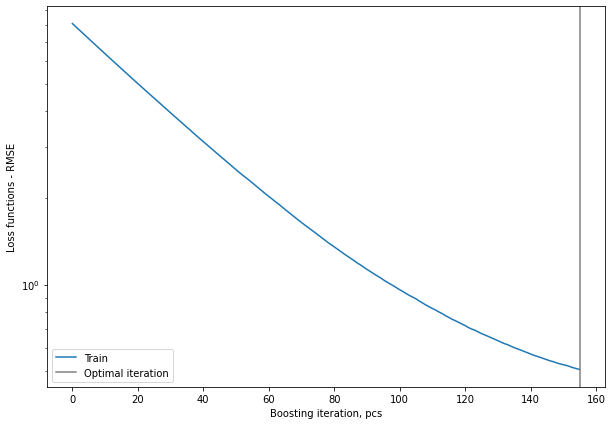

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -2.28
RMSE: 0.5
Relative RMSE(%):  0.059
MSE: 0.3
R square: 88.0%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.767
a1: 0.774
R^2: 0.921
Uncertainty
a0: 1.77+/-0.20
a1: 0.774+/-0.023


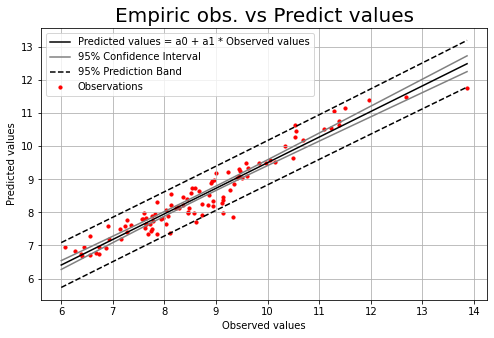

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

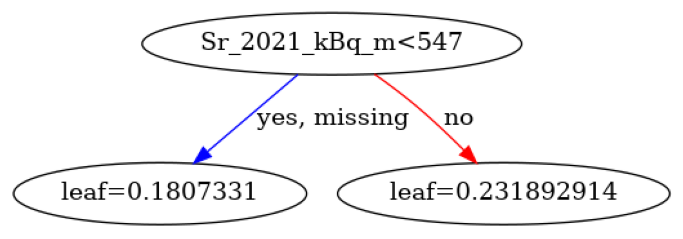

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

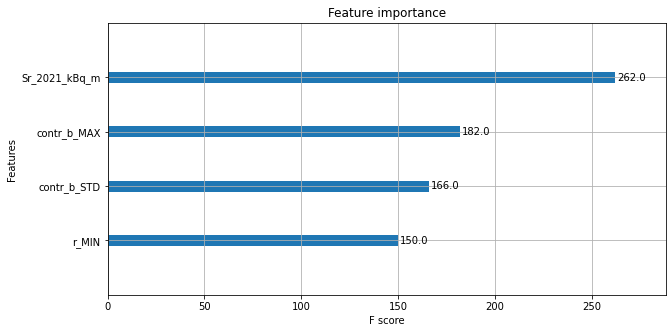

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

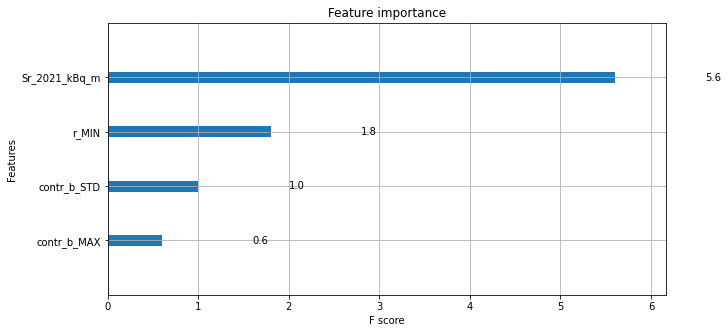

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

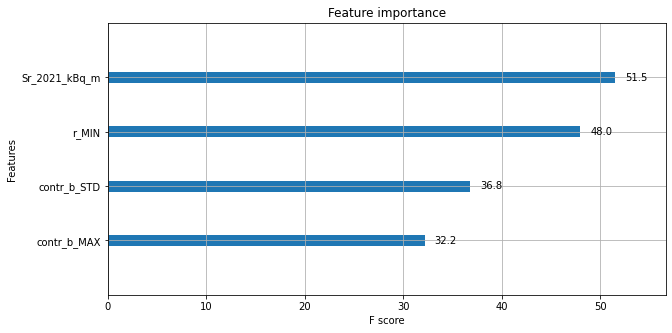

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


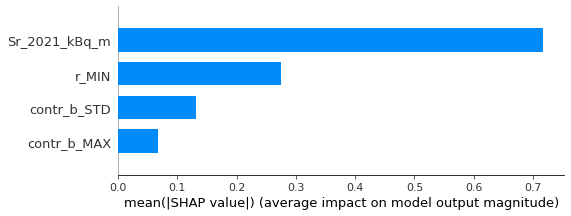

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

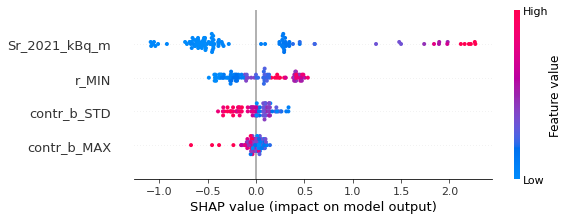

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

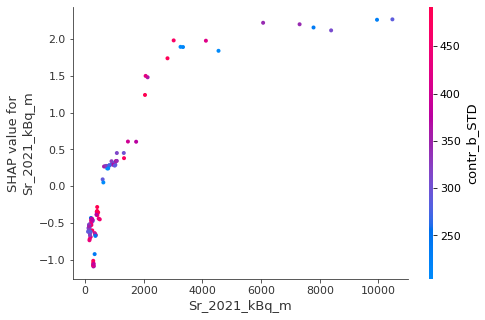

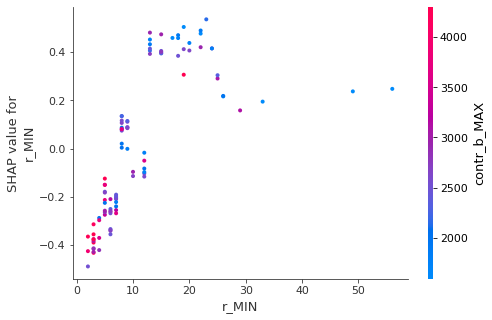

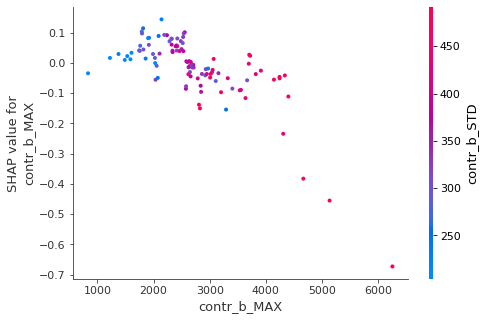

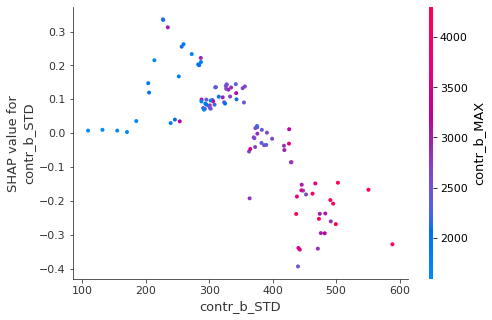

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_with_textures.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_with_textures.txt")